In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the data
X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y.csv')
y = Y['price_range']

class_to_remove = y.value_counts()[y.value_counts() < 10].index
mask = ~y.isin(class_to_remove)
X_filtered = X[mask]
y_filtered = y[mask]

X_train, X_temp, y_train, y_temp = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)




In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train_poly shape:", X_train_poly.shape)

print("X_test_poly shape:", X_test_poly.shape)


X_train_poly shape: (8165, 105)
X_test_poly shape: (1021, 105)


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
y_train_array = y_train.values.ravel()

model.fit(X_train_poly, y_train_array)

y_pred = model.predict(X_test_poly)

print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Test Set:  0.3584720861900098

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.58      0.63        33
           2       0.56      0.61      0.58        99
           3       0.45      0.56      0.50       124
           4       0.36      0.24      0.29       118
           5       0.34      0.39      0.36       137
           6       0.28      0.28      0.28       103
           7       0.25      0.35      0.29        94
           8       0.28      0.28      0.28        69
           9       0.31      0.21      0.25        52
          10       0.09      0.06      0.07        35
          11       0.13      0.15      0.14        39
          12       0.40      0.17      0.24        24
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        12
          15       0.25      0.09      0.13        11
          16       0.56      0.60      0.58        53

    accuracy  

In [22]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.5), input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.5)),
    layers.Dense(1, activation='sigmoid')
])

2025-04-28 00:35:21.016010: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0797 - loss: 4.0774 - val_accuracy: 0.1881 - val_loss: 3.0329 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1355 - loss: 3.4420 - val_accuracy: 0.2106 - val_loss: 2.7798 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 3.0897 - val_accuracy: 0.2292 - val_loss: 2.6117 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1942 - loss: 2.8943 - val_accuracy: 0.2468 - val_loss: 2.5142 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step accuracy: 0.2090 - loss: 2.7743 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2116, Train Precision = 0.2912, Train Recall = 0.2773, Train MSE = 8.1988, Train R² = 0.4435, Val Accuracy = 0.2537, Val Precision = 0.3262, Val Recall = 0.2537, Val MSE = 9.2517, Val R² = 0.3722
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

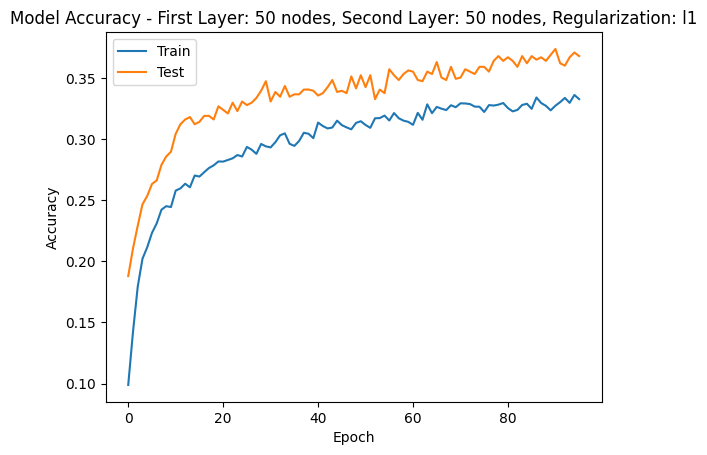

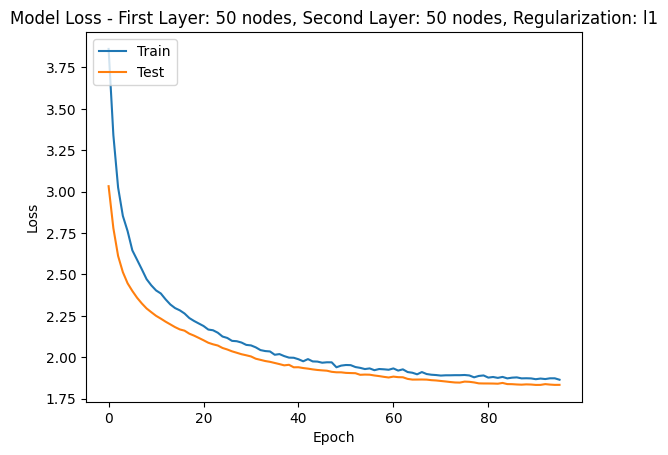

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0792 - loss: 3.5619 - val_accuracy: 0.2067 - val_loss: 2.6653 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1631 - loss: 2.9406 - val_accuracy: 0.2390 - val_loss: 2.4067 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1948 - loss: 2.6527 - val_accuracy: 0.2566 - val_loss: 2.2504 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2143 - loss: 2.4929 - val_accuracy: 0.2791 - val_loss: 2.1673 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step accuracy: 0.2178 - loss: 2.4070 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2278, Train Precision = 0.2849, Train Recall = 0.2959, Train MSE = 7.1331, Train R² = 0.5159, Val Accuracy = 0.2929, Val Precision = 0.3153, Val Recall = 0.2929, Val MSE = 7.8325, Val R² = 0.4685
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

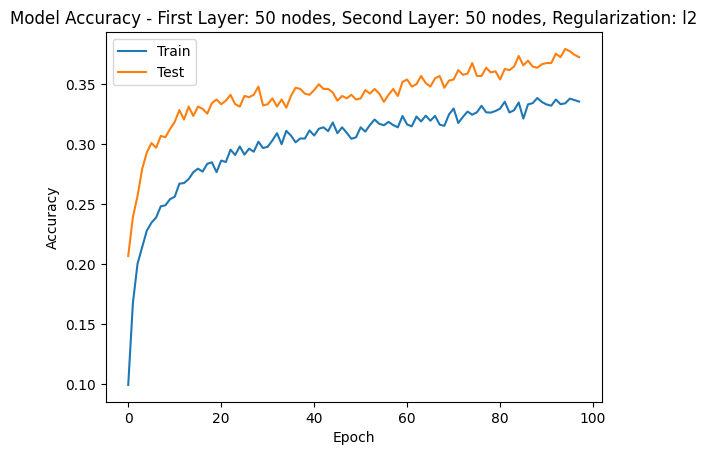

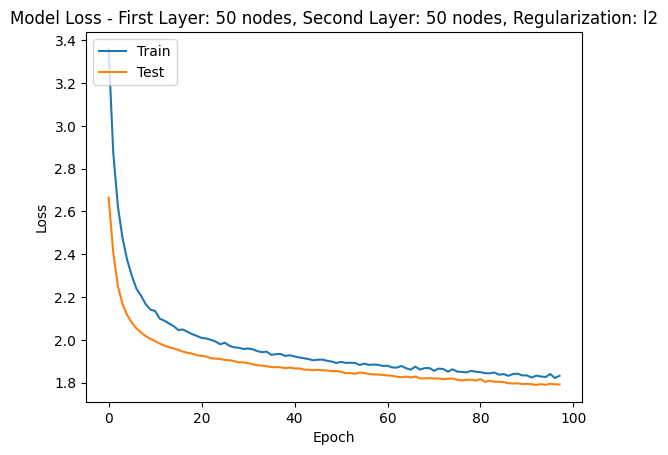

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0809 - loss: 5.5537 - val_accuracy: 0.1734 - val_loss: 4.5370 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1527 - loss: 4.8099 - val_accuracy: 0.2233 - val_loss: 4.1520 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1816 - loss: 4.3901 - val_accuracy: 0.2586 - val_loss: 3.8337 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 4.0630 - val_accuracy: 0.2772 - val_loss: 3.5941 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step accuracy: 0.2160 - loss: 3.8353 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2175, Train Precision = 0.2985, Train Recall = 0.2828, Train MSE = 7.3566, Train R² = 0.5007, Val Accuracy = 0.2742, Val Precision = 0.3071, Val Recall = 0.2742, Val MSE = 7.9412, Val R² = 0.4611
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

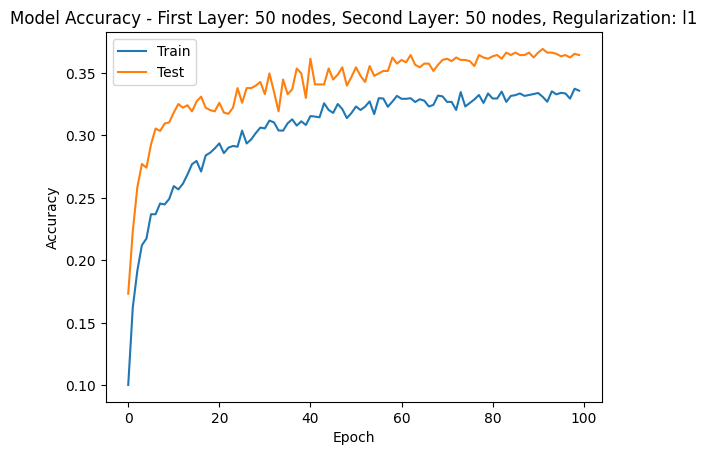

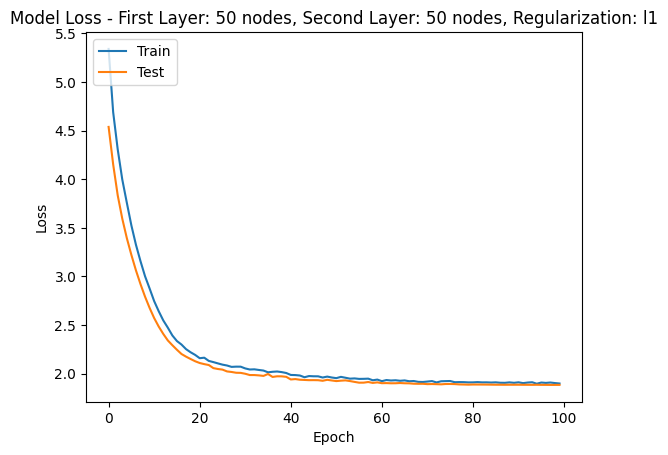

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0888 - loss: 3.8782 - val_accuracy: 0.1861 - val_loss: 2.9694 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1451 - loss: 3.2905 - val_accuracy: 0.2262 - val_loss: 2.7194 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1732 - loss: 3.0285 - val_accuracy: 0.2527 - val_loss: 2.5544 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1989 - loss: 2.8276 - val_accuracy: 0.2782 - val_loss: 2.4486 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2197 - loss: 2.6814 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2195, Train Precision = 0.3051, Train Recall = 0.2899, Train MSE = 7.9756, Train R² = 0.4587, Val Accuracy = 0.2752, Val Precision = 0.3447, Val Recall = 0.2752, Val MSE = 8.8110, Val R² = 0.4021
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

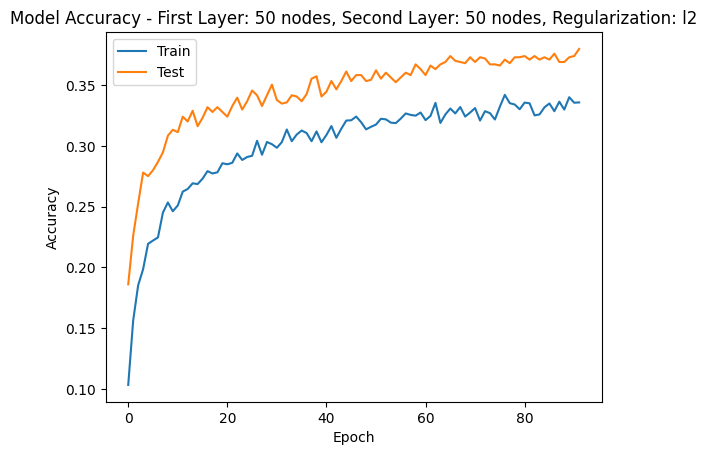

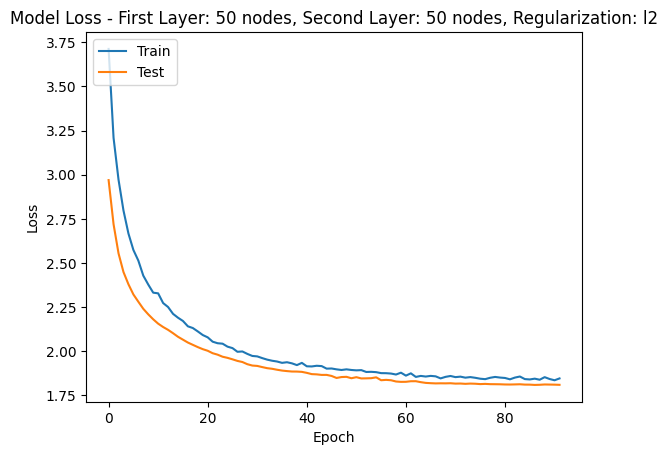

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0703 - loss: 6.9081 - val_accuracy: 0.1254 - val_loss: 5.5929 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1258 - loss: 5.8996 - val_accuracy: 0.2262 - val_loss: 5.0179 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1712 - loss: 5.2696 - val_accuracy: 0.2527 - val_loss: 4.5220 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2076 - loss: 4.7576 - val_accuracy: 0.2752 - val_loss: 4.1216 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2058 - loss: 4.3548 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2122, Train Precision = 0.3596, Train Recall = 0.2873, Train MSE = 7.2388, Train R² = 0.5087, Val Accuracy = 0.2938, Val Precision = 0.3795, Val Recall = 0.2938, Val MSE = 7.7169, Val R² = 0.4763
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

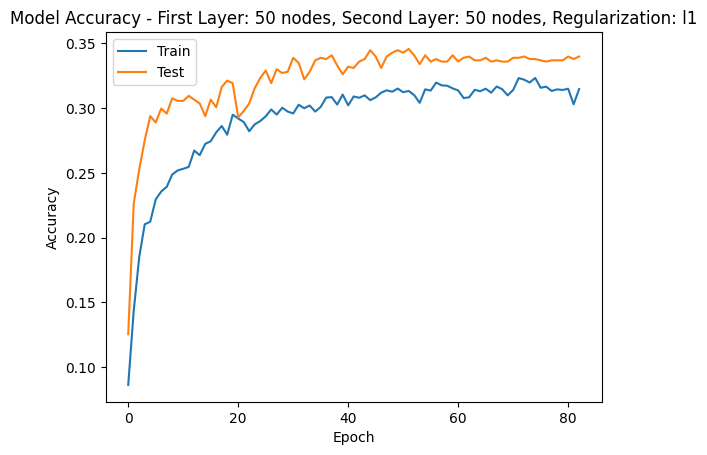

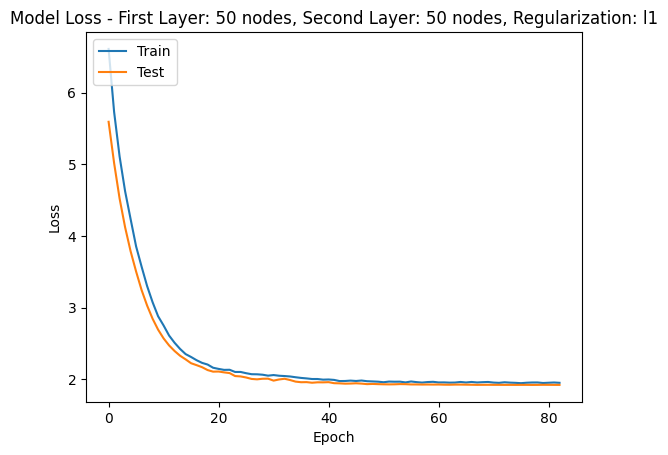

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0805 - loss: 4.1163 - val_accuracy: 0.1773 - val_loss: 3.1474 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1369 - loss: 3.5161 - val_accuracy: 0.2243 - val_loss: 2.9069 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1767 - loss: 3.1722 - val_accuracy: 0.2468 - val_loss: 2.7229 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1839 - loss: 2.9846 - val_accuracy: 0.2517 - val_loss: 2.5930 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2125 - loss: 2.8315 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2249, Train Precision = 0.2879, Train Recall = 0.2730, Train MSE = 8.3357, Train R² = 0.4342, Val Accuracy = 0.2752, Val Precision = 0.3574, Val Recall = 0.2752, Val MSE = 8.6053, Val R² = 0.4160
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

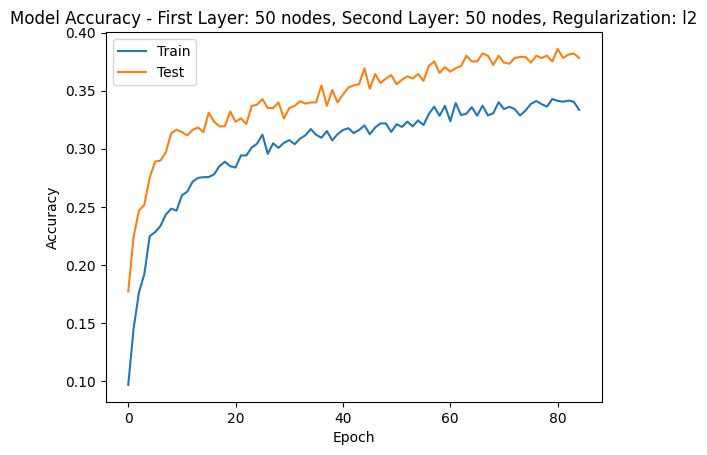

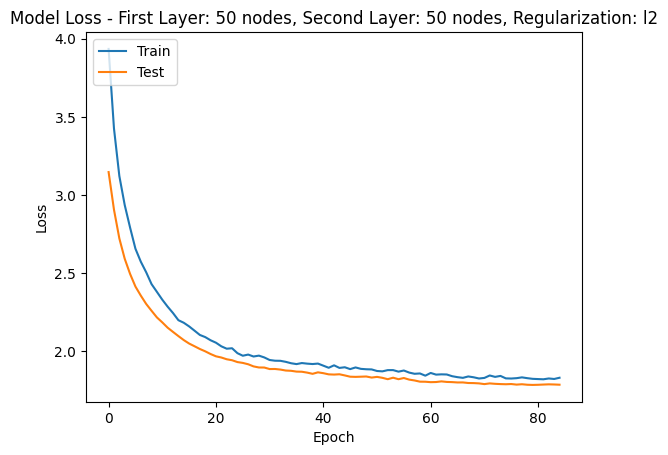

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0891 - loss: 7.4828 - val_accuracy: 0.1773 - val_loss: 6.1934 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 6.4084 - val_accuracy: 0.2125 - val_loss: 5.4741 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1816 - loss: 5.6363 - val_accuracy: 0.2468 - val_loss: 4.8499 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2052 - loss: 5.0295 - val_accuracy: 0.2625 - val_loss: 4.3371 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2036 - loss: 4.5202 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2142, Train Precision = 0.2909, Train Recall = 0.2900, Train MSE = 7.3814, Train R² = 0.4990, Val Accuracy = 0.2821, Val Precision = 0.3098, Val Recall = 0.2821, Val MSE = 8.1391, Val R² = 0.4477
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

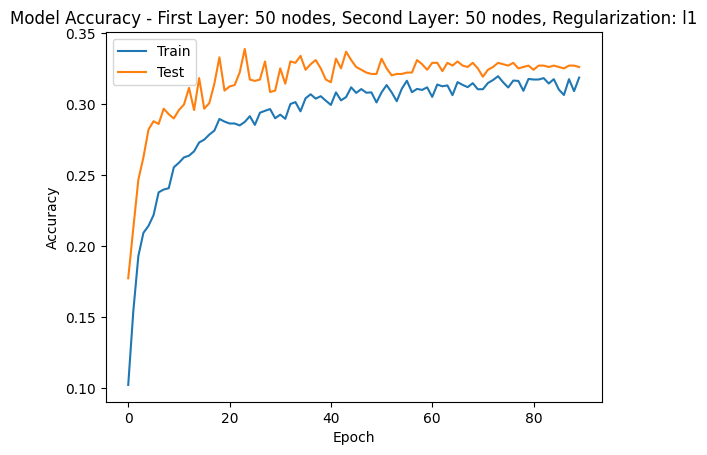

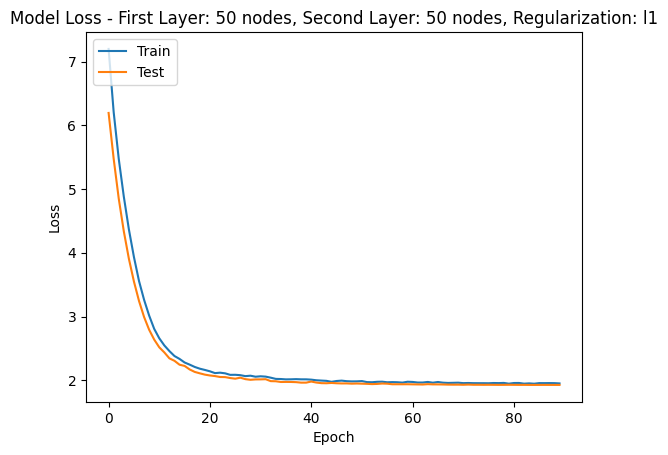

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0719 - loss: 4.3055 - val_accuracy: 0.1714 - val_loss: 3.2592 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1413 - loss: 3.5972 - val_accuracy: 0.2243 - val_loss: 2.9888 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1779 - loss: 3.2821 - val_accuracy: 0.2380 - val_loss: 2.7949 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1971 - loss: 3.0683 - val_accuracy: 0.2527 - val_loss: 2.6598 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step accuracy: 0.2017 - loss: 2.8835 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2092, Train Precision = 0.3295, Train Recall = 0.2844, Train MSE = 7.8514, Train R² = 0.4671, Val Accuracy = 0.2566, Val Precision = 0.2923, Val Recall = 0.2566, Val MSE = 8.7816, Val R² = 0.4041
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2252 - loss: 2.7608 - val_accuracy: 0.2762 - val_loss: 2.4699 - learning_rate: 5.0000e-04
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 2.6501 - val_accuracy: 0.2791 - val_loss: 2.4027 - learning_rate: 5.0000e-04
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2483 - loss: 2.5415 - val_accuracy: 0.2791 - val_loss: 2.3479 - learning_rate: 5.0000e-04
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2566 - loss: 2.5115 - val_accuracy: 0.2880 - val_loss: 2.3029 - learning_rate: 5.0000e-04
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step accuracy: 0.2514 - loss: 2.4392 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 10: Train Accuracy = 0.2539, Train Precision = 0.3699, Train Recall = 0.3155, Train MSE = 6.2420, Train R² = 0.5763, Val Accuracy = 0.2919, Val Precision = 0.3727, Val Recall = 0.2919, Val MSE = 7.1254, Val R² = 0.5165
128/128 ━━━━━━━━━━━━━━━━━━━━ 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2617 - loss: 2.3644 - val_accuracy: 0.2948 - val_loss: 2.2182 - learning_rate: 5.0000e-04
Epoch 12/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2606 - loss: 2.3038 - val_accuracy: 0.2929 - val_loss: 2.1819 - learning_rate: 5.0000e-04
Epoch 13/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2591 - loss: 2.2613 - val_accuracy: 0.3036 - val_loss: 2.1458 - learning_rate: 5.0000e-04
Epoch 14/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2684 - loss: 2.2178 - val_accuracy: 0.3115 - val_loss: 2.1145 - learning_rate: 5.0000e-04
Epoch 15/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step accuracy: 0.2576 - loss: 2.2226 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 15: Train Accuracy = 0.2658, Train Precision = 0.4046, Train Recall = 0.3232, Train MSE = 5.8145, Train R² = 0.6054, Val Accuracy = 0.3105, Val Precision = 0.3931, Val Recall = 0.3105, Val MSE = 6.5759, Val R² = 0.5538
128/128 ━━━━━━━━━━━━━━━━━━━

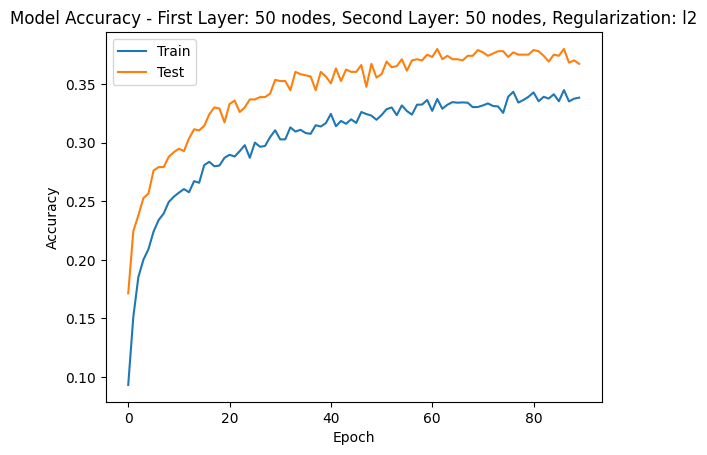

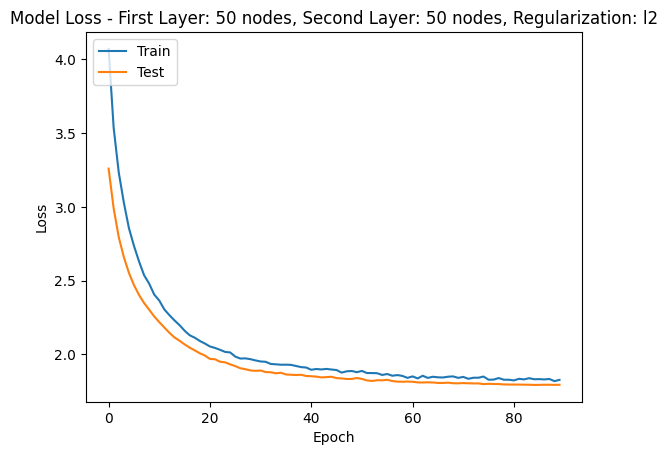

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0651 - loss: 22.0694 - val_accuracy: 0.0823 - val_loss: 16.1410 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1163 - loss: 15.0986 - val_accuracy: 0.2076 - val_loss: 10.7631 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1545 - loss: 9.9135 - val_accuracy: 0.2341 - val_loss: 6.9769 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1923 - loss: 6.4149 - val_accuracy: 0.2409 - val_loss: 4.7417 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step accuracy: 0.2202 - loss: 4.4480 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2228, Train Precision = 0.3687, Train Recall = 0.2088, Train MSE = 9.9389, Train R² = 0.3254, Val Accuracy = 0.2233, Val Precision = 0.4706, Val Recall = 0.2233, Val MSE = 10.3712, Val R² = 0.2962
128/128 ━━━━━━━━━━━━━━━━━━━

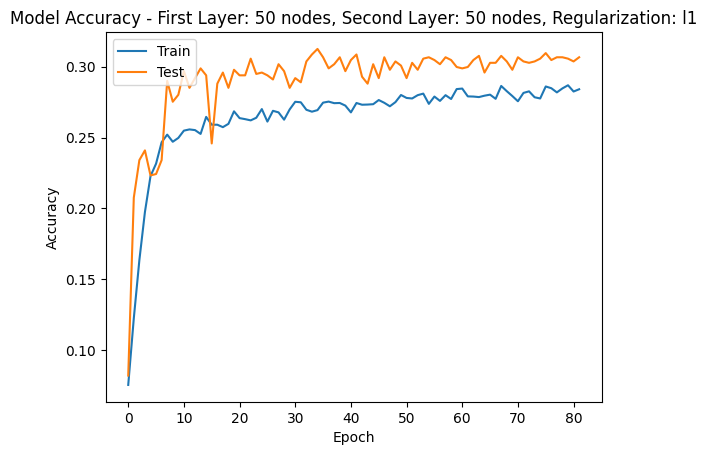

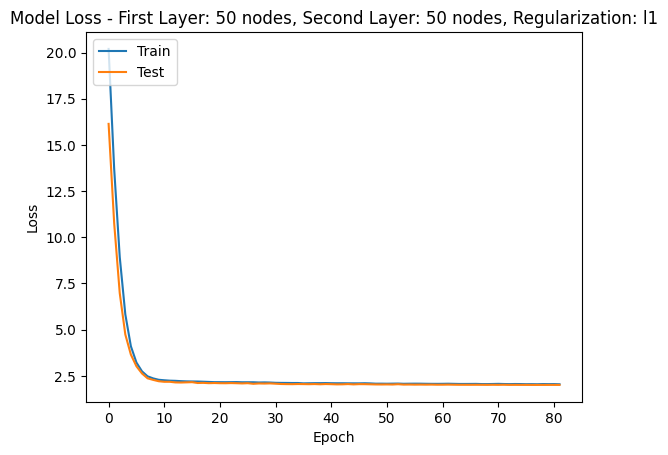

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0667 - loss: 6.8648 - val_accuracy: 0.1812 - val_loss: 5.2518 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1454 - loss: 5.3437 - val_accuracy: 0.2116 - val_loss: 4.3364 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1817 - loss: 4.4047 - val_accuracy: 0.2341 - val_loss: 3.6531 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2069 - loss: 3.7764 - val_accuracy: 0.2693 - val_loss: 3.1835 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step accuracy: 0.2318 - loss: 3.3053 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2318, Train Precision = 0.3526, Train Recall = 0.2920, Train MSE = 6.3586, Train R² = 0.5684, Val Accuracy = 0.2870, Val Precision = 0.3820, Val Recall = 0.2870, Val MSE = 7.1342, Val R² = 0.5159
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

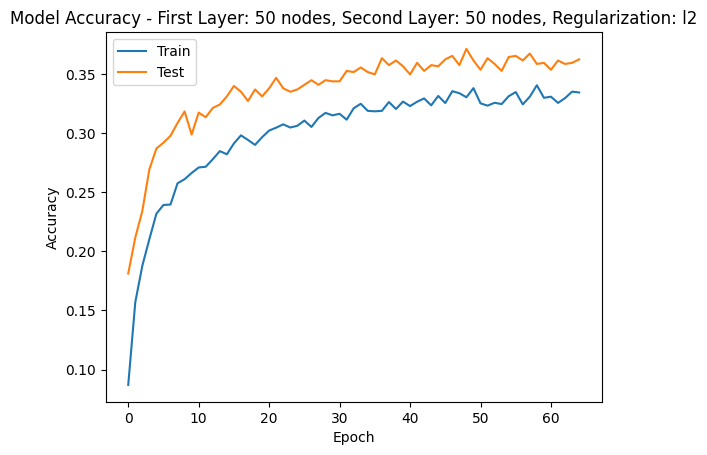

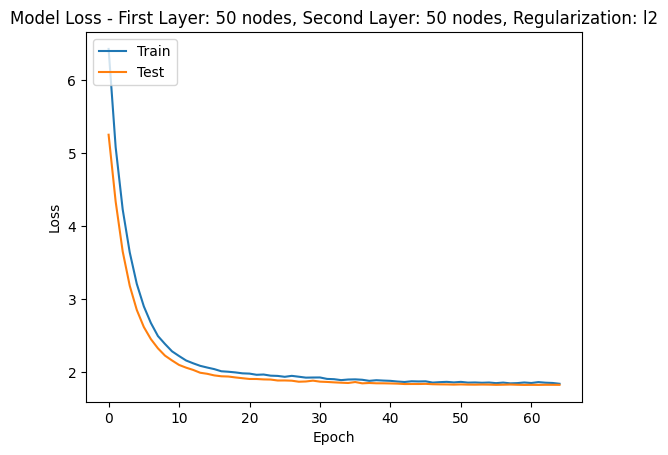

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0683 - loss: 40.0608 - val_accuracy: 0.1303 - val_loss: 27.2031 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1057 - loss: 24.4246 - val_accuracy: 0.1548 - val_loss: 15.1797 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1480 - loss: 13.2517 - val_accuracy: 0.1528 - val_loss: 7.5845 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1962 - loss: 6.4221 - val_accuracy: 0.1312 - val_loss: 4.0683 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step accuracy: 0.2305 - loss: 3.5032 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2295, Train Precision = 0.4970, Train Recall = 0.1629, Train MSE = 13.2246, Train R² = 0.1024, Val Accuracy = 0.1743, Val Precision = 0.5011, Val Recall = 0.1743, Val MSE = 13.4398, Val R² = 0.0880
128/128 ━━━━━━━━━━━━━━━━━

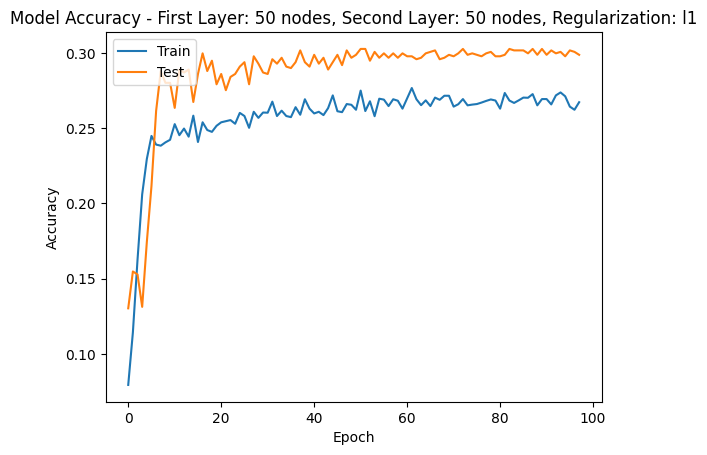

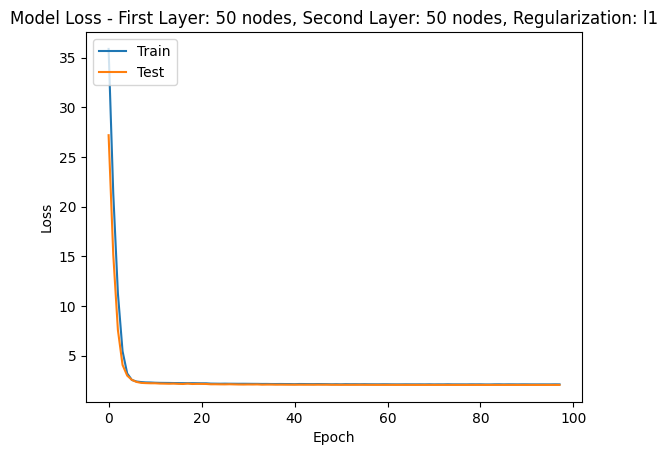

Testing model with first layer: 50 nodes, second layer: 50 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0718 - loss: 9.9713 - val_accuracy: 0.1616 - val_loss: 7.1653 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1297 - loss: 7.0511 - val_accuracy: 0.1792 - val_loss: 5.3196 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1770 - loss: 5.2215 - val_accuracy: 0.2076 - val_loss: 4.1121 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2128 - loss: 4.0733 - val_accuracy: 0.2360 - val_loss: 3.3328 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step accuracy: 0.2083 - loss: 3.3670 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2169, Train Precision = 0.3431, Train Recall = 0.2761, Train MSE = 7.0001, Train R² = 0.5249, Val Accuracy = 0.2860, Val Precision = 0.3989, Val Recall = 0.2860, Val MSE = 7.9951, Val R² = 0.4575
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

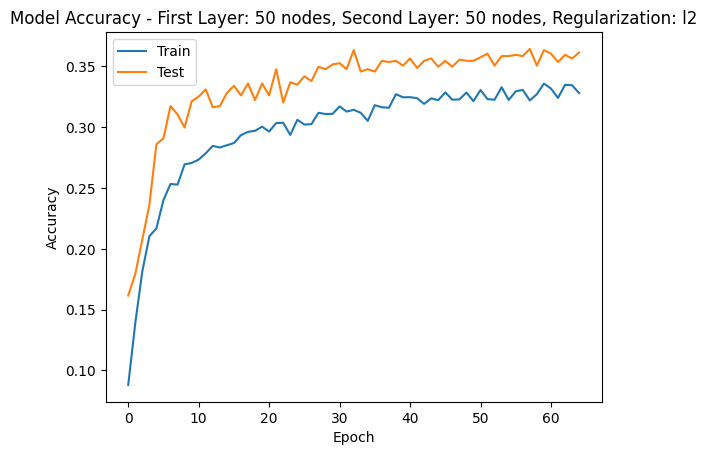

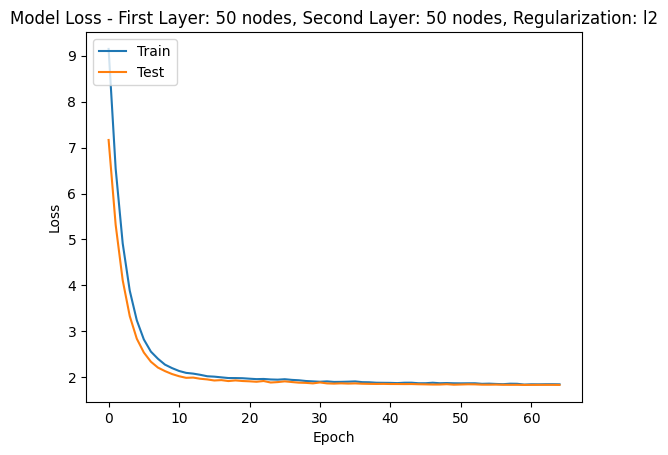

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0846 - loss: 4.1992 - val_accuracy: 0.2184 - val_loss: 3.1116 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1682 - loss: 3.4495 - val_accuracy: 0.2321 - val_loss: 2.8323 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2028 - loss: 3.1726 - val_accuracy: 0.2703 - val_loss: 2.6758 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2215 - loss: 2.9852 - val_accuracy: 0.2938 - val_loss: 2.5894 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2256 - loss: 2.8647 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 5: Train Accuracy = 0.2303, Train Precision = 0.3524, Train Recall = 0.3047, Train MSE = 6.9375, Train R² = 0.5291, Val Accuracy = 0.3134, Val Precision = 0.3606, Val Recall = 0.3134, Val MSE = 7.7542, Val R² = 0.4738
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

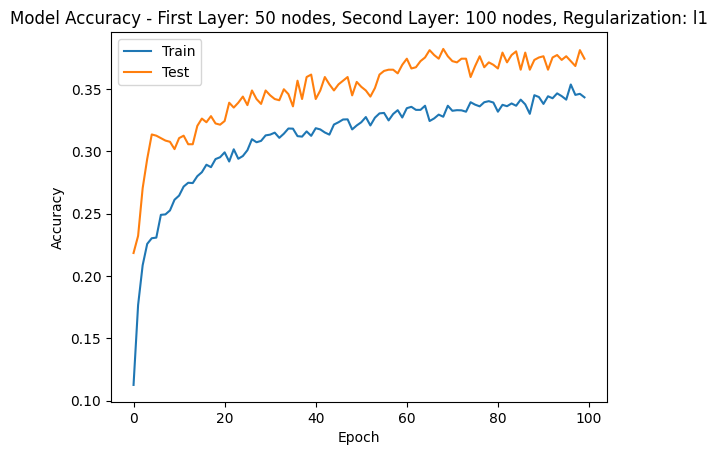

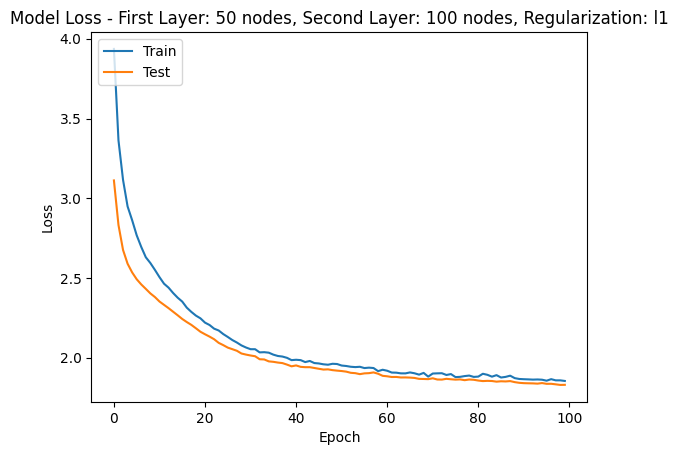

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0831 - loss: 3.7133 - val_accuracy: 0.1959 - val_loss: 2.5986 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1683 - loss: 2.9458 - val_accuracy: 0.2341 - val_loss: 2.3392 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1987 - loss: 2.6570 - val_accuracy: 0.2517 - val_loss: 2.1894 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2261 - loss: 2.5093 - val_accuracy: 0.2782 - val_loss: 2.1145 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step accuracy: 0.2229 - loss: 2.3954 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2247, Train Precision = 0.3261, Train Recall = 0.2980, Train MSE = 7.1614, Train R² = 0.5139, Val Accuracy = 0.2850, Val Precision = 0.3227, Val Recall = 0.2850, Val MSE = 8.0264, Val R² = 0.4553
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

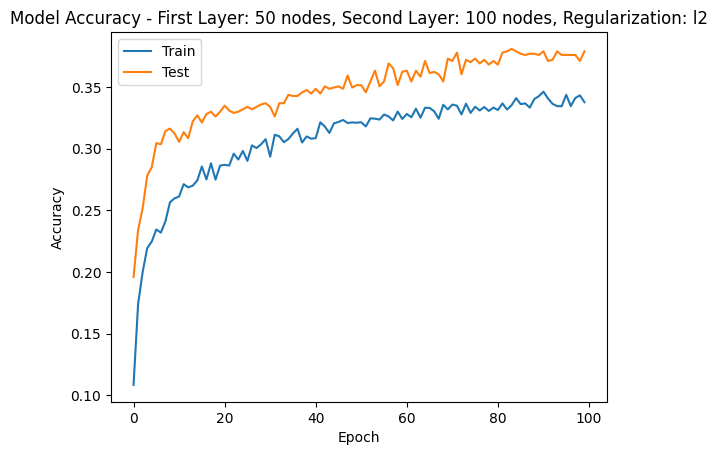

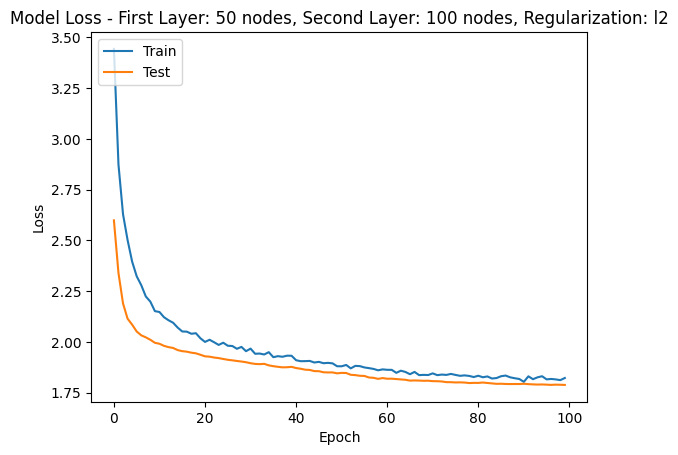

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0796 - loss: 6.6098 - val_accuracy: 0.1949 - val_loss: 5.3227 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1587 - loss: 5.6171 - val_accuracy: 0.2253 - val_loss: 4.7693 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2089 - loss: 5.0203 - val_accuracy: 0.2547 - val_loss: 4.3496 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2127 - loss: 4.5839 - val_accuracy: 0.2801 - val_loss: 4.0214 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step accuracy: 0.2232 - loss: 4.2676 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2296, Train Precision = 0.3288, Train Recall = 0.3069, Train MSE = 6.4145, Train R² = 0.5646, Val Accuracy = 0.3124, Val Precision = 0.3673, Val Recall = 0.3124, Val MSE = 7.2106, Val R² = 0.5107
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

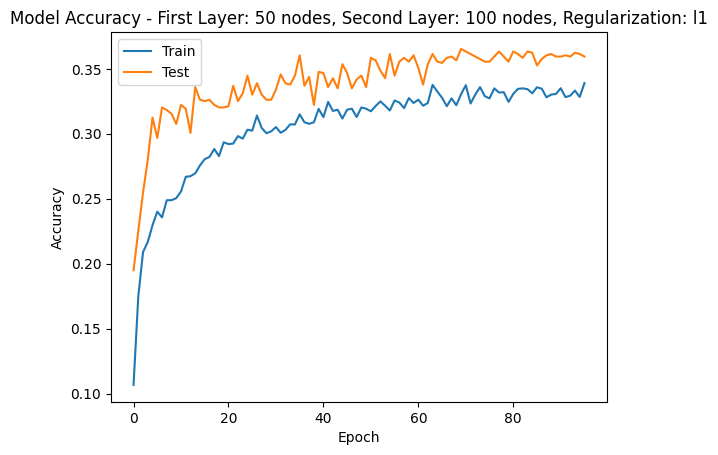

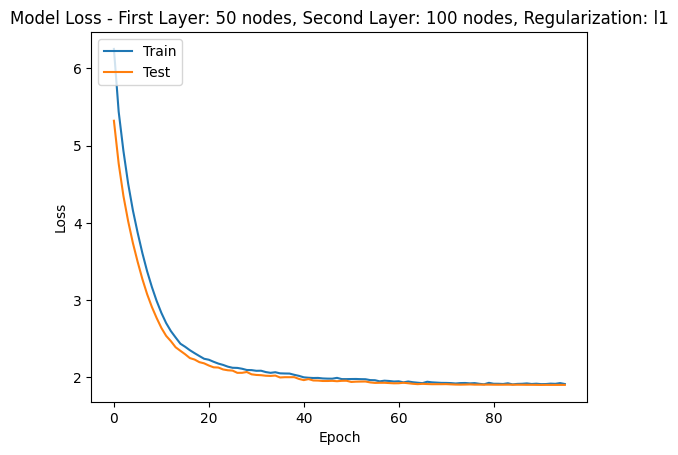

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0867 - loss: 3.9826 - val_accuracy: 0.2096 - val_loss: 2.9751 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1611 - loss: 3.3264 - val_accuracy: 0.2478 - val_loss: 2.6902 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1851 - loss: 3.0061 - val_accuracy: 0.2733 - val_loss: 2.5178 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2031 - loss: 2.8340 - val_accuracy: 0.2850 - val_loss: 2.4220 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2158 - loss: 2.7067 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2190, Train Precision = 0.3525, Train Recall = 0.3097, Train MSE = 6.7108, Train R² = 0.5445, Val Accuracy = 0.2870, Val Precision = 0.3413, Val Recall = 0.2870, Val MSE = 7.4897, Val R² = 0.4918
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

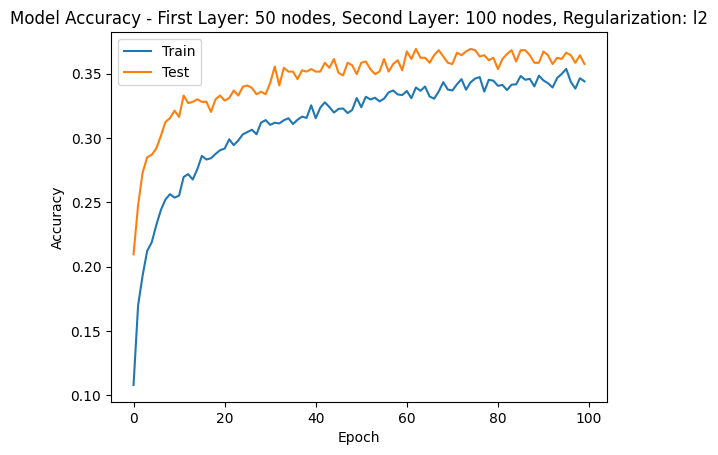

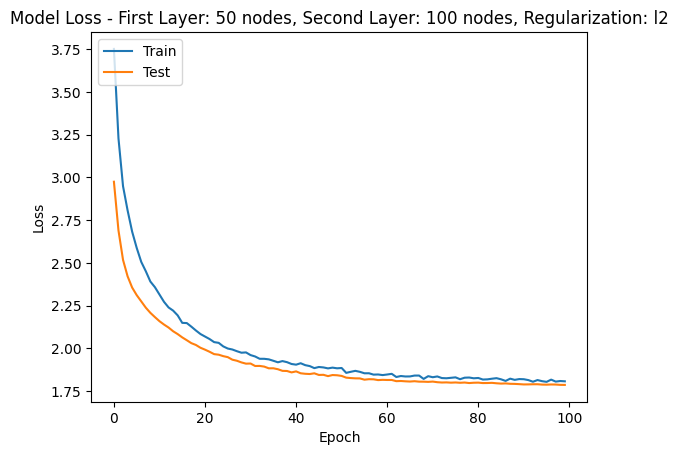

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0921 - loss: 8.1939 - val_accuracy: 0.2086 - val_loss: 6.6688 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1673 - loss: 6.8605 - val_accuracy: 0.2429 - val_loss: 5.7999 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1977 - loss: 5.9891 - val_accuracy: 0.2840 - val_loss: 5.0942 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2095 - loss: 5.2560 - val_accuracy: 0.2811 - val_loss: 4.5175 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2191 - loss: 4.7144 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2246, Train Precision = 0.3256, Train Recall = 0.2856, Train MSE = 7.1815, Train R² = 0.5126, Val Accuracy = 0.2772, Val Precision = 0.3447, Val Recall = 0.2772, Val MSE = 7.7258, Val R² = 0.4757
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

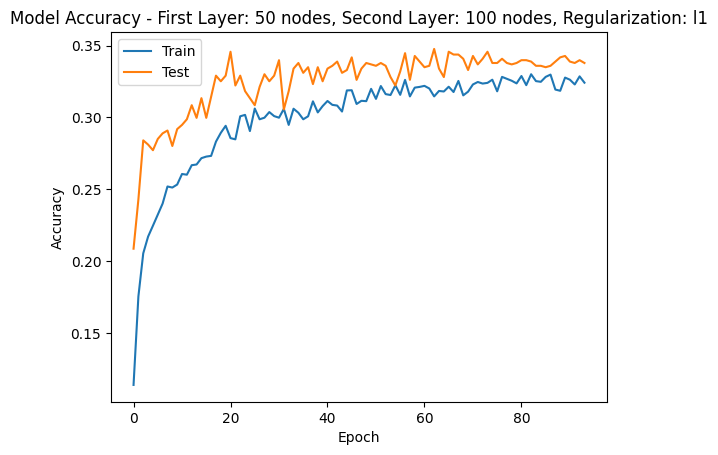

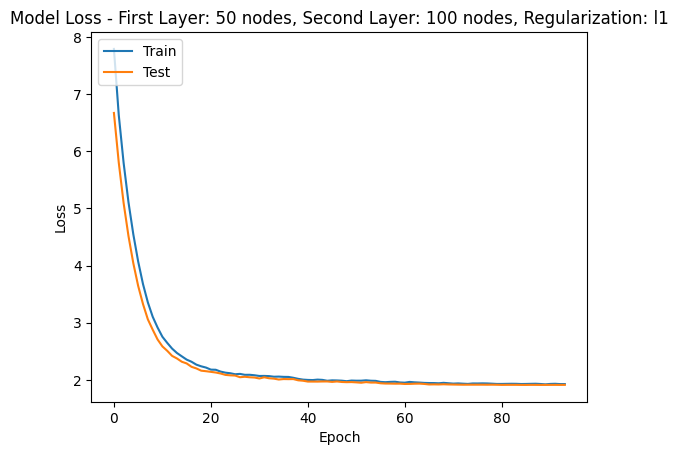

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0846 - loss: 4.2088 - val_accuracy: 0.1861 - val_loss: 3.2108 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1622 - loss: 3.5258 - val_accuracy: 0.2243 - val_loss: 2.9119 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1996 - loss: 3.1808 - val_accuracy: 0.2762 - val_loss: 2.7154 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2053 - loss: 3.0098 - val_accuracy: 0.2958 - val_loss: 2.5948 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step accuracy: 0.2296 - loss: 2.8620 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2303, Train Precision = 0.3153, Train Recall = 0.3089, Train MSE = 7.0027, Train R² = 0.5247, Val Accuracy = 0.2997, Val Precision = 0.3261, Val Recall = 0.2997, Val MSE = 8.1939, Val R² = 0.4440
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

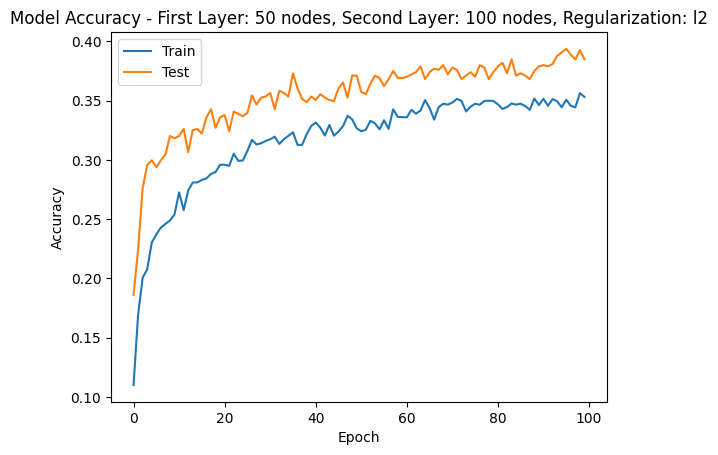

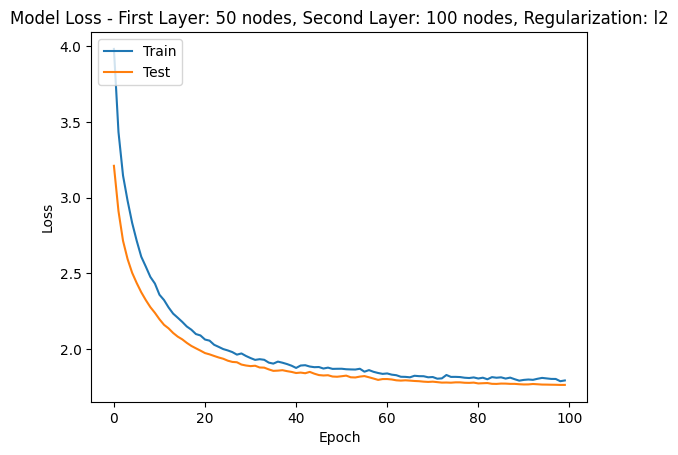

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0716 - loss: 9.3222 - val_accuracy: 0.1969 - val_loss: 7.6108 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1549 - loss: 7.6171 - val_accuracy: 0.2507 - val_loss: 6.4327 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1948 - loss: 6.4823 - val_accuracy: 0.2615 - val_loss: 5.4515 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 5.5337 - val_accuracy: 0.2791 - val_loss: 4.6589 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step accuracy: 0.2320 - loss: 4.7849 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2312, Train Precision = 0.3538, Train Recall = 0.3030, Train MSE = 6.8009, Train R² = 0.5384, Val Accuracy = 0.2870, Val Precision = 0.3736, Val Recall = 0.2870, Val MSE = 7.6503, Val R² = 0.4808
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

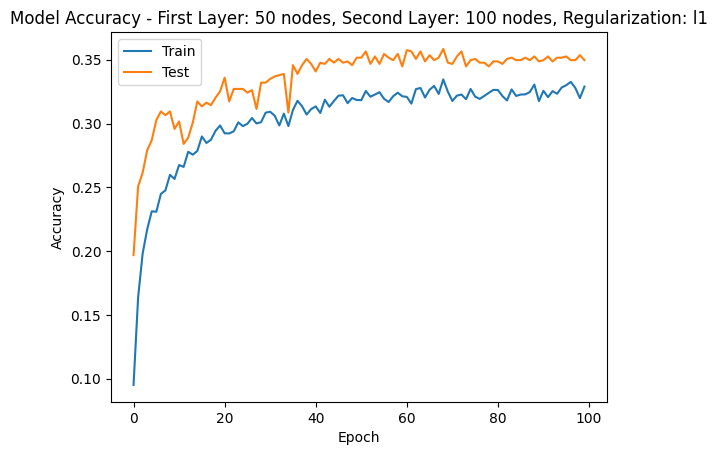

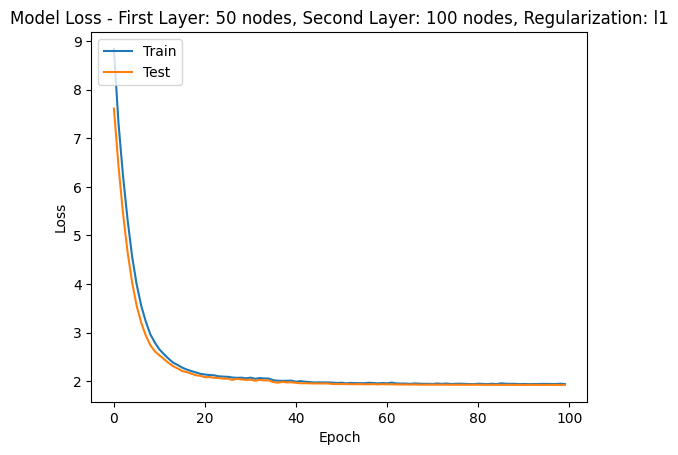

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0782 - loss: 4.4441 - val_accuracy: 0.2311 - val_loss: 3.3142 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1681 - loss: 3.6369 - val_accuracy: 0.2635 - val_loss: 3.0007 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2070 - loss: 3.3001 - val_accuracy: 0.2742 - val_loss: 2.7968 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2103 - loss: 3.1126 - val_accuracy: 0.2791 - val_loss: 2.6766 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step accuracy: 0.2229 - loss: 2.9352 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2269, Train Precision = 0.3502, Train Recall = 0.2981, Train MSE = 7.1429, Train R² = 0.5152, Val Accuracy = 0.2929, Val Precision = 0.3349, Val Recall = 0.2929, Val MSE = 8.0784, Val R² = 0.4518
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

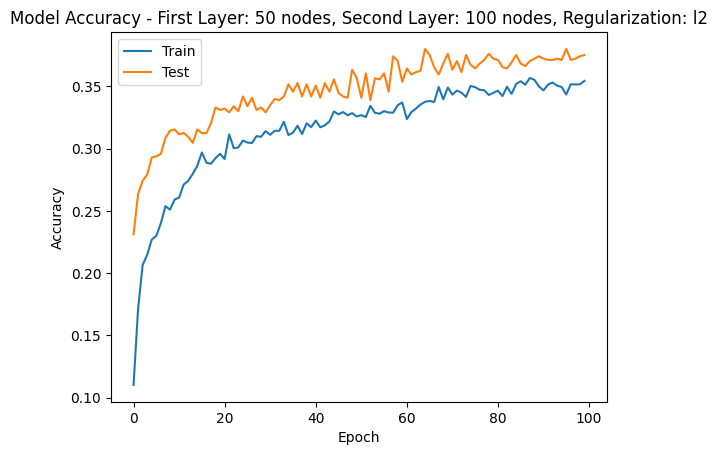

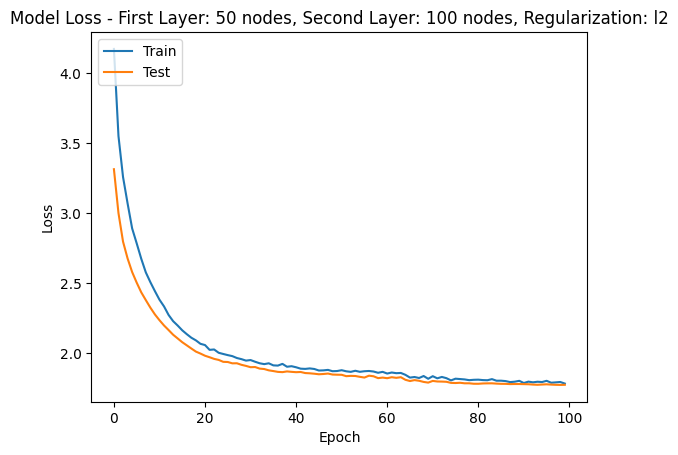

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0770 - loss: 30.1736 - val_accuracy: 0.1851 - val_loss: 20.1843 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1498 - loss: 18.1070 - val_accuracy: 0.2243 - val_loss: 11.5280 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1924 - loss: 10.2229 - val_accuracy: 0.2282 - val_loss: 6.6029 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2160 - loss: 5.9721 - val_accuracy: 0.2243 - val_loss: 4.4952 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step accuracy: 0.2309 - loss: 4.2118 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2372, Train Precision = 0.3379, Train Recall = 0.2075, Train MSE = 9.3043, Train R² = 0.3685, Val Accuracy = 0.2027, Val Precision = 0.3874, Val Recall = 0.2027, Val MSE = 9.6503, Val R² = 0.3451
128/128 ━━━━━━━━━━━━━━━━━━━

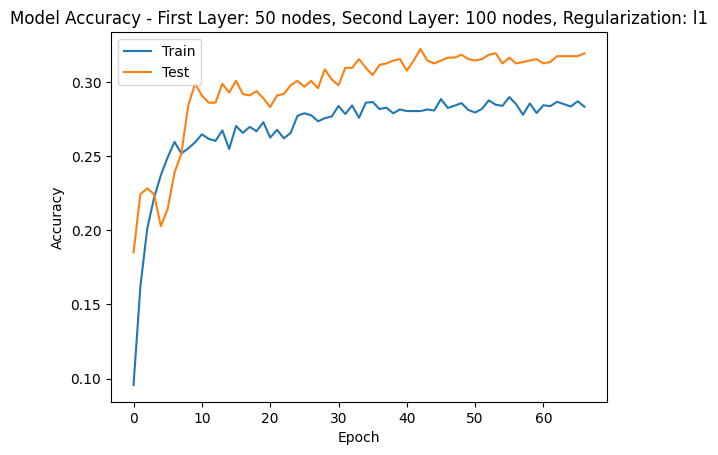

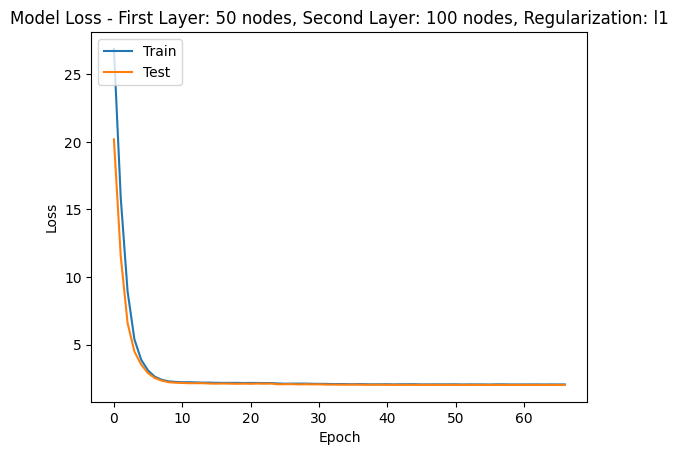

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0935 - loss: 7.6901 - val_accuracy: 0.2096 - val_loss: 5.6855 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1766 - loss: 5.7254 - val_accuracy: 0.2458 - val_loss: 4.5229 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2054 - loss: 4.6324 - val_accuracy: 0.2733 - val_loss: 3.7360 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2276 - loss: 3.9063 - val_accuracy: 0.2850 - val_loss: 3.2235 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step accuracy: 0.2366 - loss: 3.4270 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2423, Train Precision = 0.3445, Train Recall = 0.2941, Train MSE = 6.5015, Train R² = 0.5587, Val Accuracy = 0.2831, Val Precision = 0.3364, Val Recall = 0.2831, Val MSE = 7.3761, Val R² = 0.4995
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

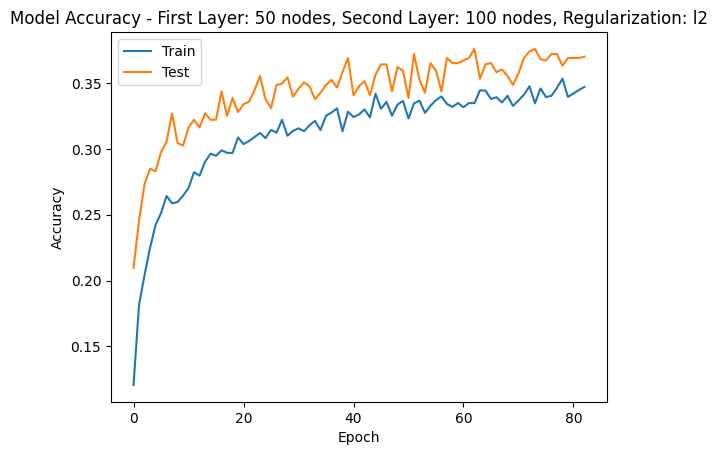

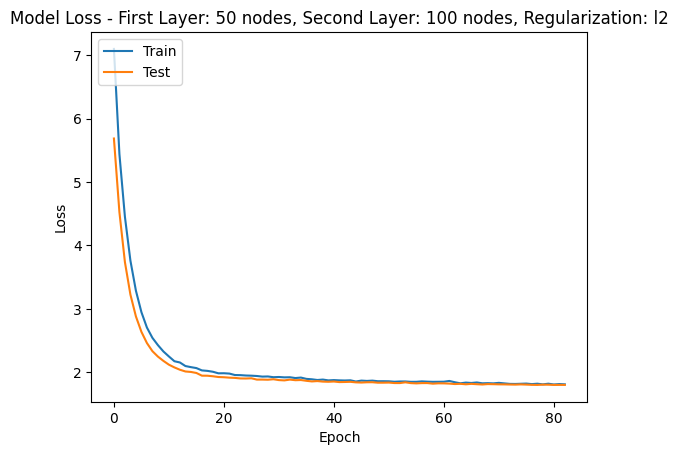

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0763 - loss: 55.7545 - val_accuracy: 0.1665 - val_loss: 34.1067 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1307 - loss: 29.2046 - val_accuracy: 0.1910 - val_loss: 15.5624 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1840 - loss: 12.7704 - val_accuracy: 0.1636 - val_loss: 6.5580 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2091 - loss: 5.5030 - val_accuracy: 0.1371 - val_loss: 4.0928 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step accuracy: 0.2374 - loss: 3.5461 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2427, Train Precision = 0.6144, Train Recall = 0.1482, Train MSE = 12.4604, Train R² = 0.1543, Val Accuracy = 0.1508, Val Precision = 0.8017, Val Recall = 0.1508, Val MSE = 12.5984, Val R² = 0.1451
128/128 ━━━━━━━━━━━━━━━━━

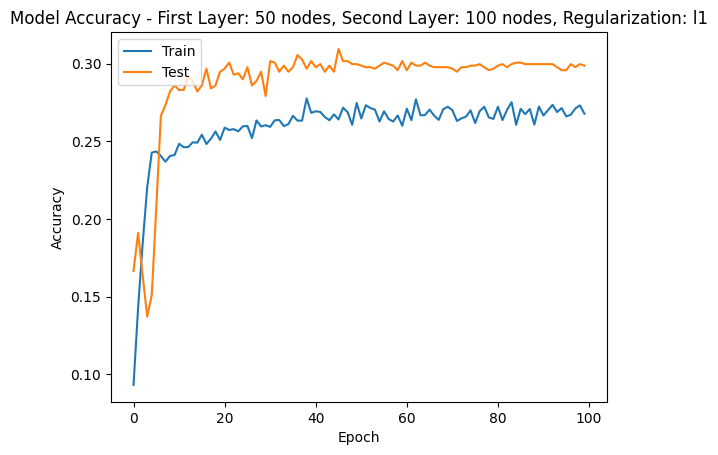

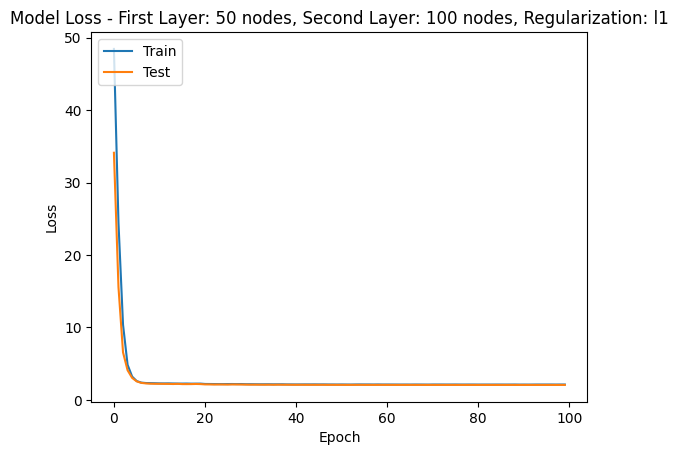

Testing model with first layer: 50 nodes, second layer: 100 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0783 - loss: 11.3323 - val_accuracy: 0.1978 - val_loss: 7.7533 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1634 - loss: 7.4311 - val_accuracy: 0.2380 - val_loss: 5.4666 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1985 - loss: 5.3863 - val_accuracy: 0.2703 - val_loss: 4.1090 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2219 - loss: 4.1307 - val_accuracy: 0.2840 - val_loss: 3.3180 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step accuracy: 0.2171 - loss: 3.4632 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2293, Train Precision = 0.3917, Train Recall = 0.3015, Train MSE = 6.6791, Train R² = 0.5467, Val Accuracy = 0.2958, Val Precision = 0.3752, Val Recall = 0.2958, Val MSE = 7.2155, Val R² = 0.5104
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

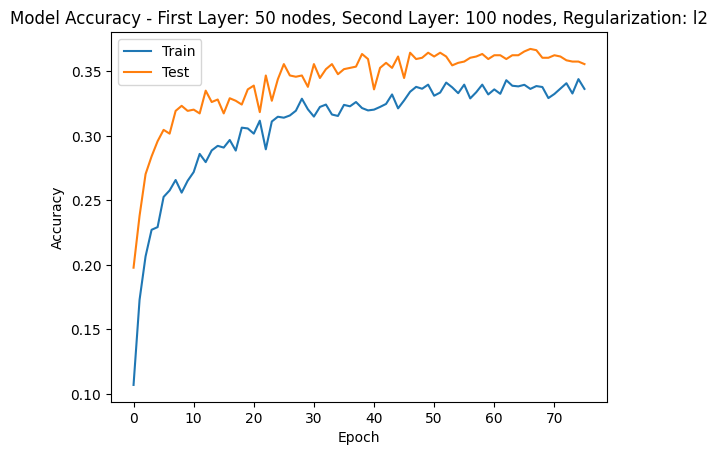

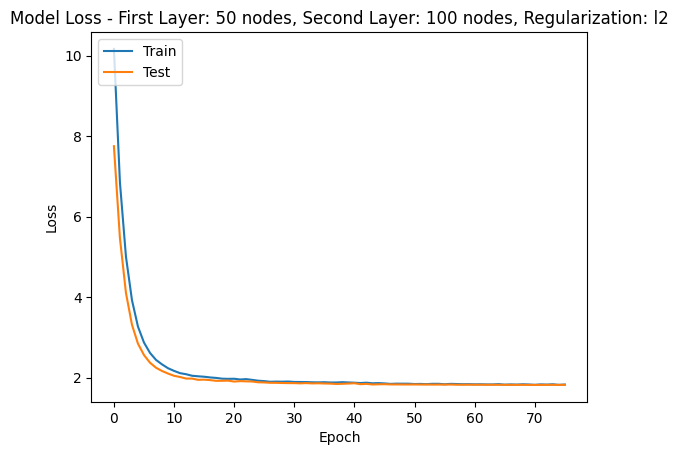

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0948 - loss: 4.4873 - val_accuracy: 0.1959 - val_loss: 3.5197 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 3.7284 - val_accuracy: 0.2498 - val_loss: 3.2379 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2101 - loss: 3.4131 - val_accuracy: 0.2762 - val_loss: 3.0414 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2294 - loss: 3.2462 - val_accuracy: 0.2997 - val_loss: 2.9125 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step accuracy: 0.2452 - loss: 3.1068 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2421, Train Precision = 0.3260, Train Recall = 0.3149, Train MSE = 6.8300, Train R² = 0.5364, Val Accuracy = 0.3115, Val Precision = 0.3861, Val Recall = 0.3115, Val MSE = 7.7346, Val R² = 0.4751
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 2.0038 - val_accuracy: 0.3673 - val_loss: 1.9708 - learning_rate: 5.0000e-04
Epoch 32/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 2.0273 - val_accuracy: 0.3712 - val_loss: 1.9614 - learning_rate: 5.0000e-04
Epoch 33/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 1.9898 - val_accuracy: 0.3546 - val_loss: 1.9588 - learning_rate: 5.0000e-04
Epoch 34/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3354 - loss: 1.9569 - val_accuracy: 0.3624 - val_loss: 1.9544 - learning_rate: 5.0000e-04
Epoch 35/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step accuracy: 0.3303 - loss: 1.9767 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 35: Train Accuracy = 0.3320, Train Precision = 0.4438, Train Recall = 0.3830, Train MSE = 4.6440, Train R² = 0.6848, Val Accuracy = 0.3839, Val Precision = 0.4475, Val Recall = 0.3839, Val MSE = 5.3536, Val R² = 0.6367
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3524 - loss: 1.9041 - val_accuracy: 0.3781 - val_loss: 1.8860 - learning_rate: 2.5000e-04
Epoch 47/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3578 - loss: 1.8966 - val_accuracy: 0.3879 - val_loss: 1.8842 - learning_rate: 2.5000e-04
Epoch 48/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3507 - loss: 1.9027 - val_accuracy: 0.3859 - val_loss: 1.8779 - learning_rate: 2.5000e-04
Epoch 49/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3480 - loss: 1.9012 - val_accuracy: 0.3937 - val_loss: 1.8738 - learning_rate: 2.5000e-04
Epoch 50/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step accuracy: 0.3440 - loss: 1.9013 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 50: Train Accuracy = 0.3459, Train Precision = 0.4610, Train Recall = 0.3994, Train MSE = 4.1607, Train R² = 0.7176, Val Accuracy = 0.3918, Val Precision = 0.4556, Val Recall = 0.3918, Val MSE = 5.3291, Val R² = 0.6384
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3550 - loss: 1.8815 - val_accuracy: 0.3976 - val_loss: 1.8658 - learning_rate: 2.5000e-04
Epoch 52/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 1.8813 - val_accuracy: 0.3771 - val_loss: 1.8629 - learning_rate: 2.5000e-04
Epoch 53/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3530 - loss: 1.9003 - val_accuracy: 0.3918 - val_loss: 1.8555 - learning_rate: 2.5000e-04
Epoch 54/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 1.8856 - val_accuracy: 0.3839 - val_loss: 1.8637 - learning_rate: 2.5000e-04
Epoch 55/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step accuracy: 0.3543 - loss: 1.8924 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 55: Train Accuracy = 0.3595, Train Precision = 0.4452, Train Recall = 0.4007, Train MSE = 4.1074, Train R² = 0.7212, Val Accuracy = 0.3800, Val Precision = 0.4296, Val Recall = 0.3800, Val MSE = 5.3879, Val R² = 0.6344
128/128 ━━━━━━━━━━━━━━━━━━━

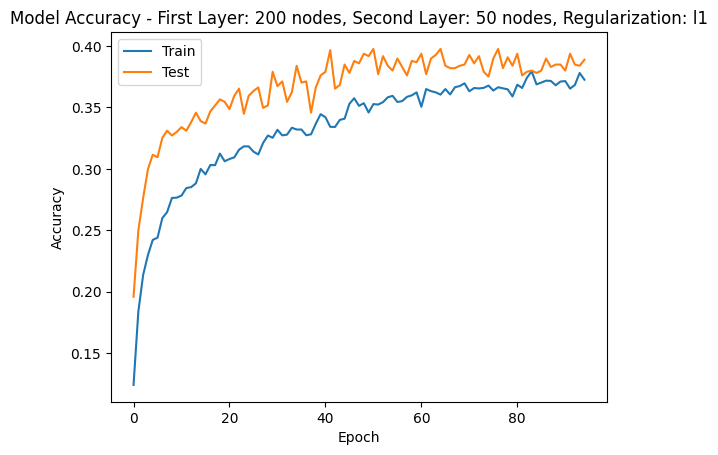

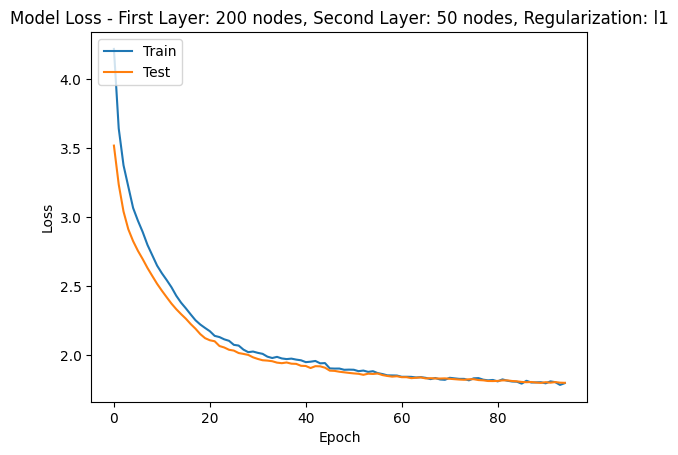

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0844 - loss: 3.5737 - val_accuracy: 0.1195 - val_loss: 2.7332 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1810 - loss: 2.8647 - val_accuracy: 0.2067 - val_loss: 2.4722 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2085 - loss: 2.6194 - val_accuracy: 0.2644 - val_loss: 2.2726 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2297 - loss: 2.4689 - val_accuracy: 0.2742 - val_loss: 2.1680 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step accuracy: 0.2467 - loss: 2.3887 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2496, Train Precision = 0.3363, Train Recall = 0.3154, Train MSE = 6.9574, Train R² = 0.5278, Val Accuracy = 0.2938, Val Precision = 0.3701, Val Recall = 0.2938, Val MSE = 7.7894, Val R² = 0.4714
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

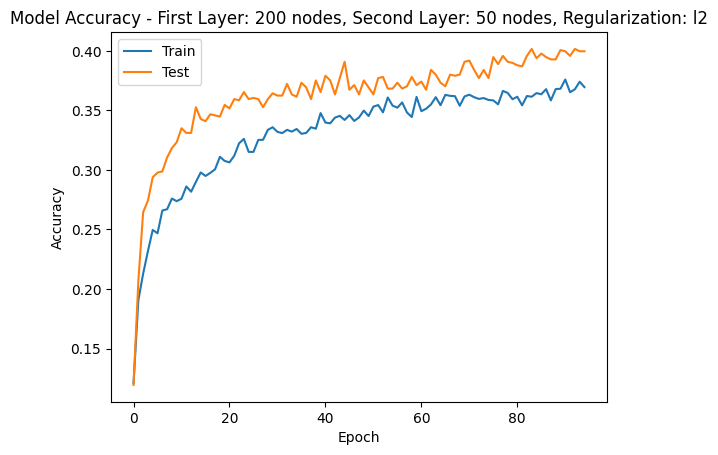

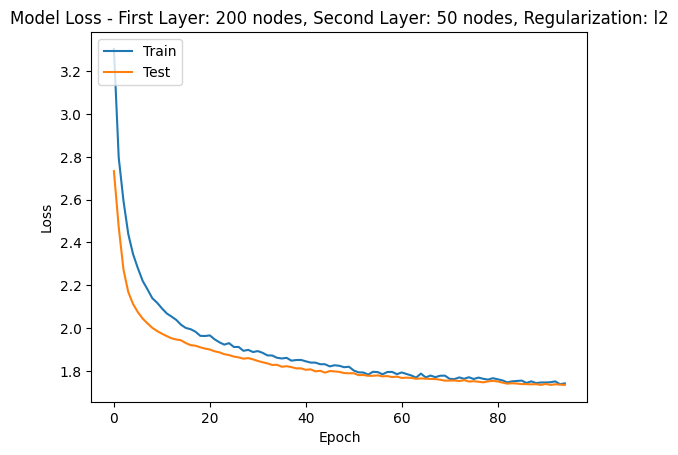

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0887 - loss: 8.1851 - val_accuracy: 0.2008 - val_loss: 6.8509 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1866 - loss: 6.7965 - val_accuracy: 0.2302 - val_loss: 5.9255 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2051 - loss: 5.8827 - val_accuracy: 0.2586 - val_loss: 5.0805 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2281 - loss: 5.0731 - val_accuracy: 0.2958 - val_loss: 4.3783 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step accuracy: 0.2602 - loss: 4.3995 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2600, Train Precision = 0.3585, Train Recall = 0.3008, Train MSE = 6.6634, Train R² = 0.5477, Val Accuracy = 0.3046, Val Precision = 0.3962, Val Recall = 0.3046, Val MSE = 7.4270, Val R² = 0.4960
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2576 - loss: 3.8387 - val_accuracy: 0.3164 - val_loss: 3.3858 - learning_rate: 5.0000e-04
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2619 - loss: 3.3964 - val_accuracy: 0.3164 - val_loss: 3.0538 - learning_rate: 5.0000e-04
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2778 - loss: 3.1168 - val_accuracy: 0.2997 - val_loss: 2.8349 - learning_rate: 5.0000e-04
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2748 - loss: 2.8603 - val_accuracy: 0.3222 - val_loss: 2.6339 - learning_rate: 5.0000e-04
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step accuracy: 0.2856 - loss: 2.6820 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 10: Train Accuracy = 0.2759, Train Precision = 0.3319, Train Recall = 0.3238, Train MSE = 5.6754, Train R² = 0.6148, Val Accuracy = 0.3017, Val Precision = 0.3659, Val Recall = 0.3017, Val MSE = 6.9892, Val R² = 0.5257
128/128 ━━━━━━━━━━━━━━━━━━━━ 1

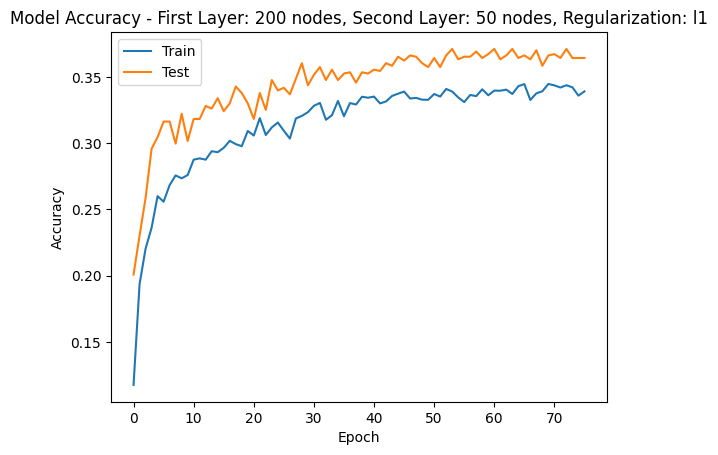

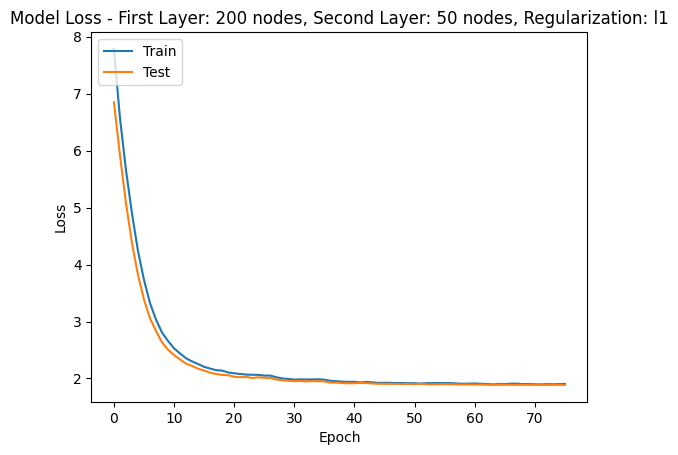

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1014 - loss: 3.9019 - val_accuracy: 0.2125 - val_loss: 3.0324 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1885 - loss: 3.1654 - val_accuracy: 0.2635 - val_loss: 2.7607 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2162 - loss: 2.9418 - val_accuracy: 0.2752 - val_loss: 2.5687 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 2.7529 - val_accuracy: 0.2948 - val_loss: 2.4539 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step accuracy: 0.2431 - loss: 2.6407 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2473, Train Precision = 0.3439, Train Recall = 0.3166, Train MSE = 7.0316, Train R² = 0.5227, Val Accuracy = 0.3085, Val Precision = 0.3579, Val Recall = 0.3085, Val MSE = 7.7179, Val R² = 0.4763
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

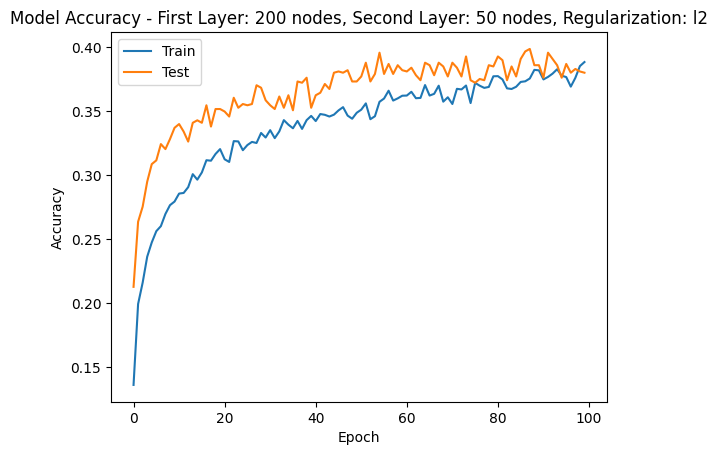

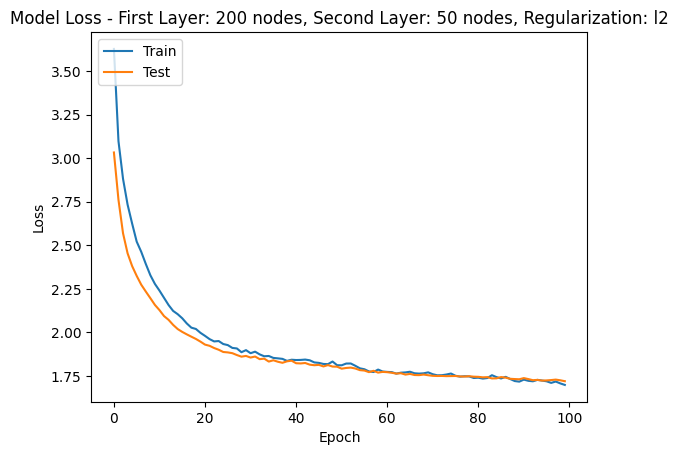

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0970 - loss: 10.9810 - val_accuracy: 0.2233 - val_loss: 8.8900 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1825 - loss: 8.7650 - val_accuracy: 0.2380 - val_loss: 7.2513 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2161 - loss: 7.1196 - val_accuracy: 0.2527 - val_loss: 5.8516 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2209 - loss: 5.7805 - val_accuracy: 0.2762 - val_loss: 4.7437 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step accuracy: 0.2507 - loss: 4.7037 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2540, Train Precision = 0.4089, Train Recall = 0.2795, Train MSE = 7.1166, Train R² = 0.5170, Val Accuracy = 0.2752, Val Precision = 0.4976, Val Recall = 0.2752, Val MSE = 7.7532, Val R² = 0.4739
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

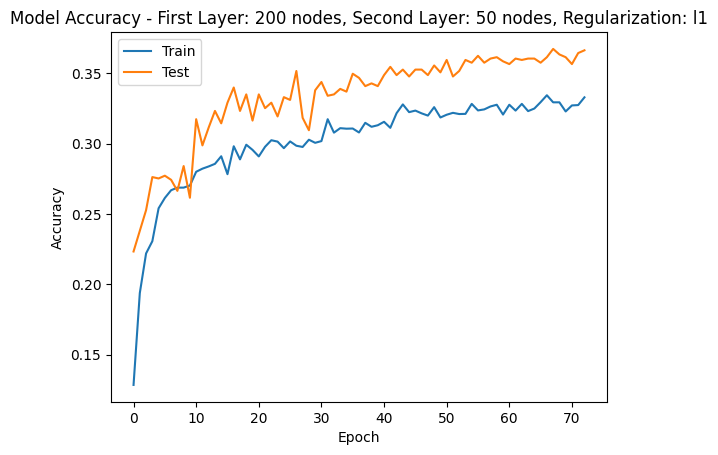

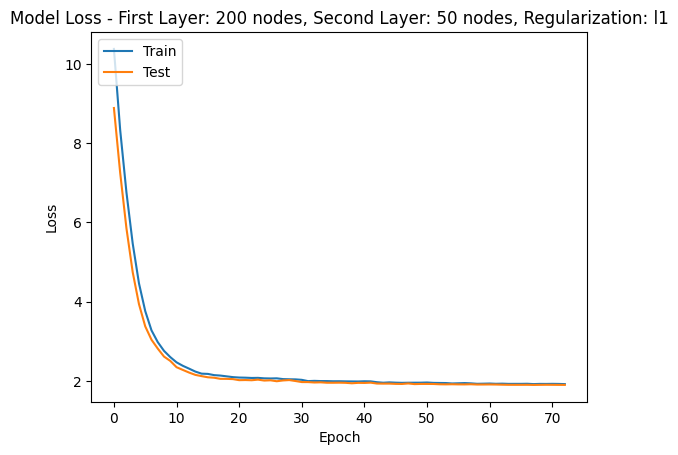

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0921 - loss: 4.2959 - val_accuracy: 0.1920 - val_loss: 3.3855 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1933 - loss: 3.4777 - val_accuracy: 0.2380 - val_loss: 3.0672 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2066 - loss: 3.1855 - val_accuracy: 0.2870 - val_loss: 2.7995 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2316 - loss: 2.9725 - val_accuracy: 0.2987 - val_loss: 2.6366 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step accuracy: 0.2467 - loss: 2.8161 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2459, Train Precision = 0.3627, Train Recall = 0.3203, Train MSE = 6.6244, Train R² = 0.5504, Val Accuracy = 0.2997, Val Precision = 0.3812, Val Recall = 0.2997, Val MSE = 7.5710, Val R² = 0.4862
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

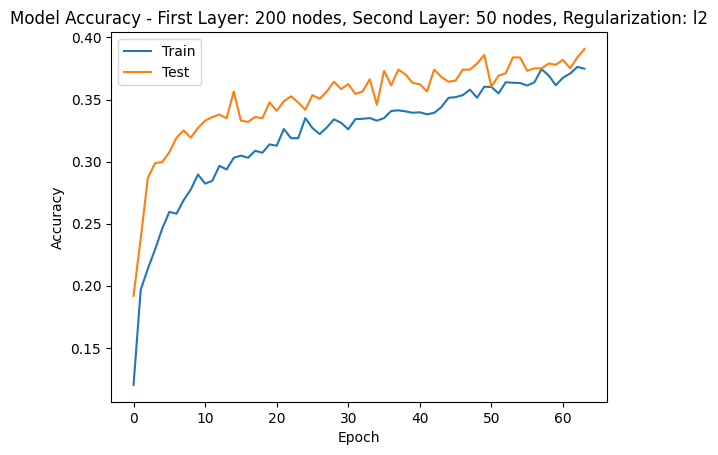

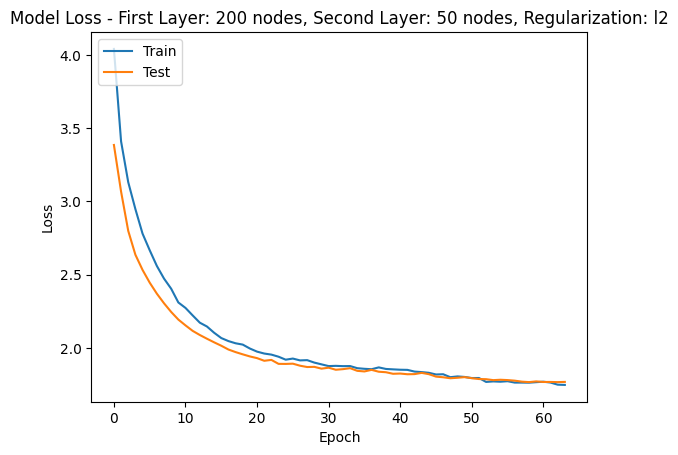

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0963 - loss: 12.7553 - val_accuracy: 0.2272 - val_loss: 10.1775 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1853 - loss: 9.7528 - val_accuracy: 0.2341 - val_loss: 7.8394 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 7.4546 - val_accuracy: 0.2311 - val_loss: 5.9619 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2365 - loss: 5.7033 - val_accuracy: 0.2821 - val_loss: 4.5880 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step accuracy: 0.2445 - loss: 4.4896 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2509, Train Precision = 0.3716, Train Recall = 0.2660, Train MSE = 6.5479, Train R² = 0.5556, Val Accuracy = 0.2586, Val Precision = 0.3579, Val Recall = 0.2586, Val MSE = 7.0784, Val R² = 0.5197
128/128 ━━━━━━━━━━━━━━━━━━━━ 1

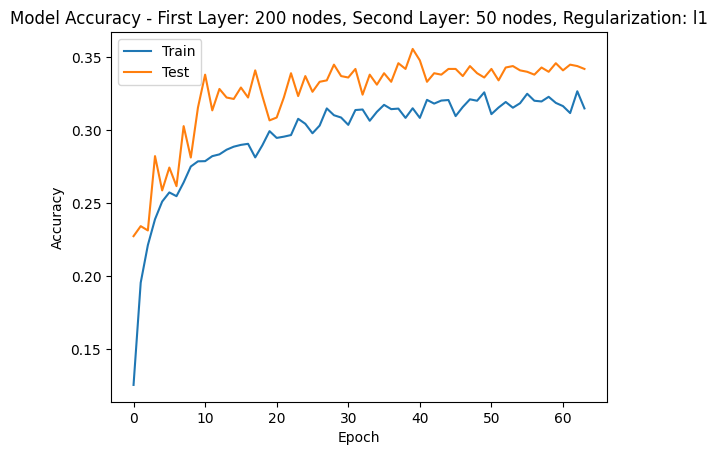

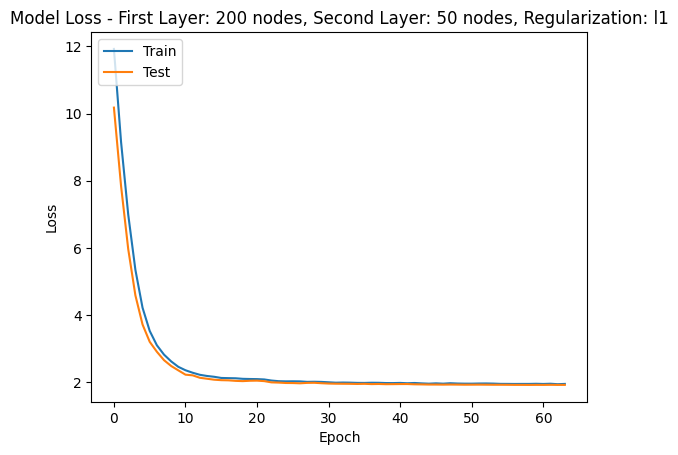

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1030 - loss: 4.4394 - val_accuracy: 0.2018 - val_loss: 3.4773 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1831 - loss: 3.5953 - val_accuracy: 0.2644 - val_loss: 3.1239 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2143 - loss: 3.2541 - val_accuracy: 0.2889 - val_loss: 2.8603 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2283 - loss: 3.0572 - val_accuracy: 0.2929 - val_loss: 2.6866 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step accuracy: 0.2428 - loss: 2.8656 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2480, Train Precision = 0.3348, Train Recall = 0.3165, Train MSE = 6.3559, Train R² = 0.5686, Val Accuracy = 0.3017, Val Precision = 0.3790, Val Recall = 0.3017, Val MSE = 7.1244, Val R² = 0.5165
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

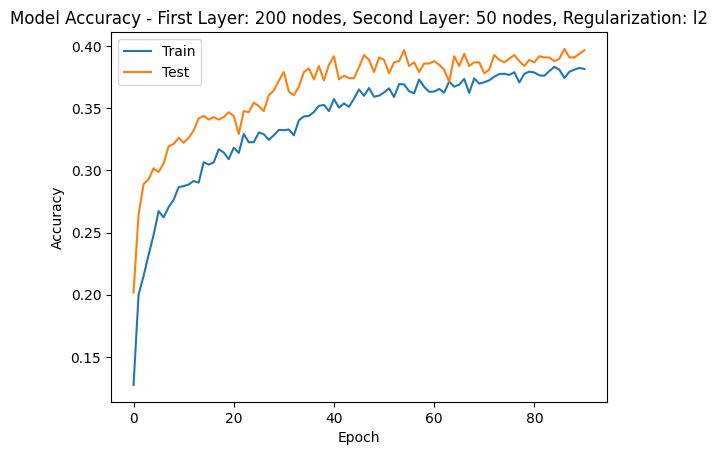

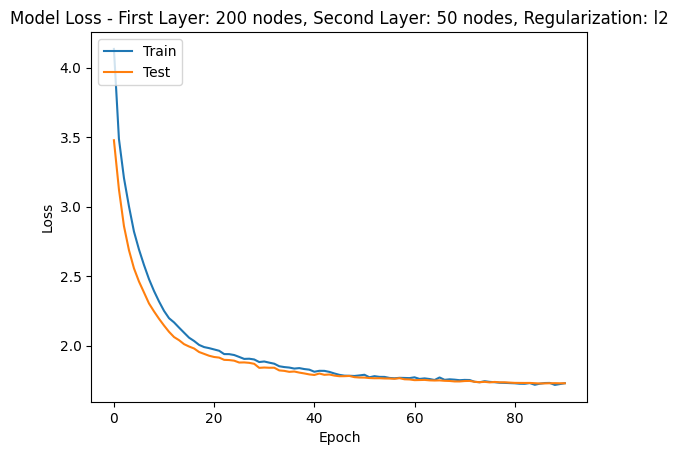

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0673 - loss: 45.4053 - val_accuracy: 0.1166 - val_loss: 25.4249 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1580 - loss: 21.0348 - val_accuracy: 0.0735 - val_loss: 10.3480 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2060 - loss: 8.3261 - val_accuracy: 0.1577 - val_loss: 4.8702 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2194 - loss: 4.0554 - val_accuracy: 0.1469 - val_loss: 3.2857 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step accuracy: 0.2608 - loss: 2.7542 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2511, Train Precision = 0.3692, Train Recall = 0.1869, Train MSE = 9.9548, Train R² = 0.3243, Val Accuracy = 0.1998, Val Precision = 0.4648, Val Recall = 0.1998, Val MSE = 10.4280, Val R² = 0.2924
128/128 ━━━━━━━━━━━━━━━━━━━

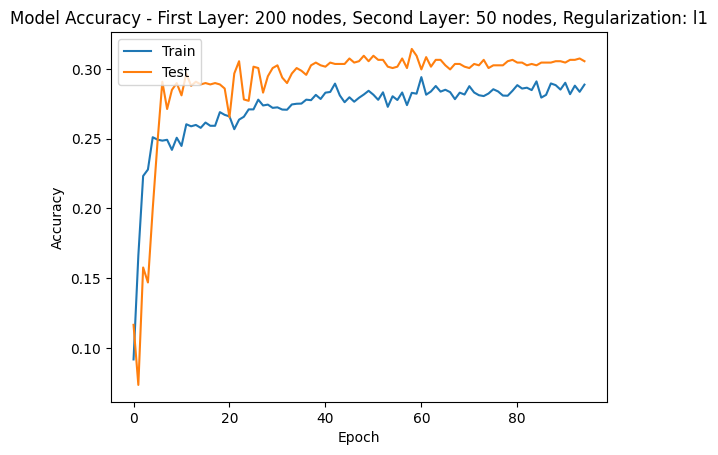

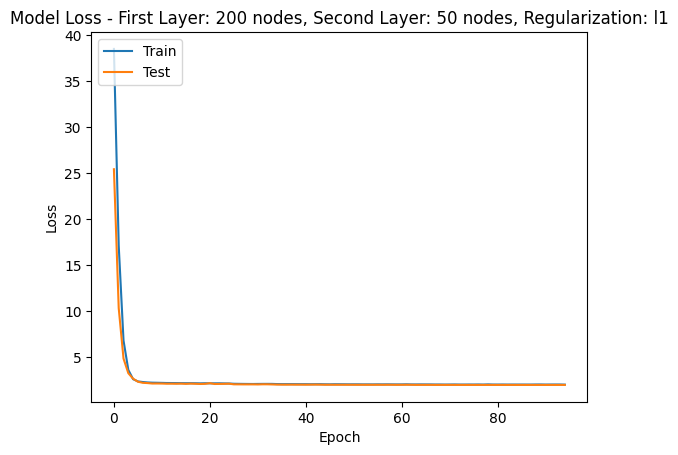

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0872 - loss: 8.2794 - val_accuracy: 0.1685 - val_loss: 6.1577 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1782 - loss: 5.9345 - val_accuracy: 0.2018 - val_loss: 4.7394 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2049 - loss: 4.5734 - val_accuracy: 0.2478 - val_loss: 3.7684 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 3.7091 - val_accuracy: 0.2889 - val_loss: 3.1323 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step accuracy: 0.2572 - loss: 3.1509 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2595, Train Precision = 0.4110, Train Recall = 0.3036, Train MSE = 6.6006, Train R² = 0.5520, Val Accuracy = 0.3134, Val Precision = 0.4371, Val Recall = 0.3134, Val MSE = 7.5935, Val R² = 0.4847
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

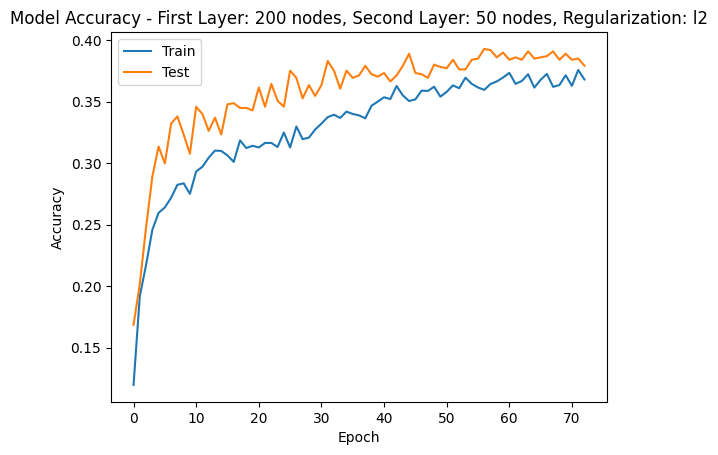

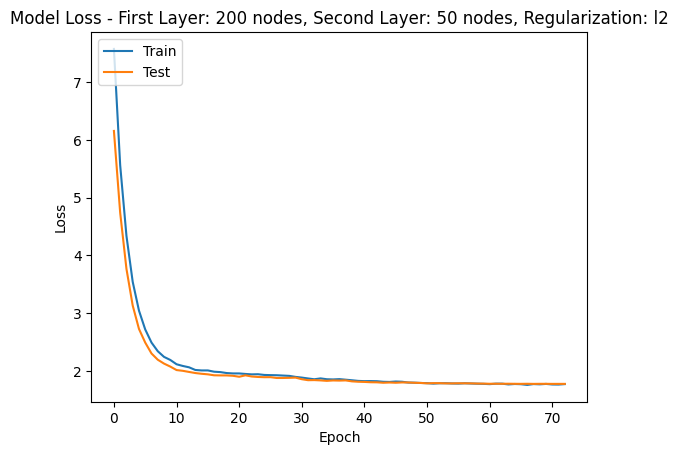

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0698 - loss: 85.3695 - val_accuracy: 0.0666 - val_loss: 41.6251 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1363 - loss: 32.2209 - val_accuracy: 0.1606 - val_loss: 11.0362 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2028 - loss: 7.9155 - val_accuracy: 0.1920 - val_loss: 3.6776 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2315 - loss: 2.9623 - val_accuracy: 0.1450 - val_loss: 2.8311 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step accuracy: 0.2438 - loss: 2.4897 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2380, Train Precision = 0.6305, Train Recall = 0.1864, Train MSE = 11.6453, Train R² = 0.2096, Val Accuracy = 0.1832, Val Precision = 0.6948, Val Recall = 0.1832, Val MSE = 11.9452, Val R² = 0.1894
128/128 ━━━━━━━━━━━━━━━━━━

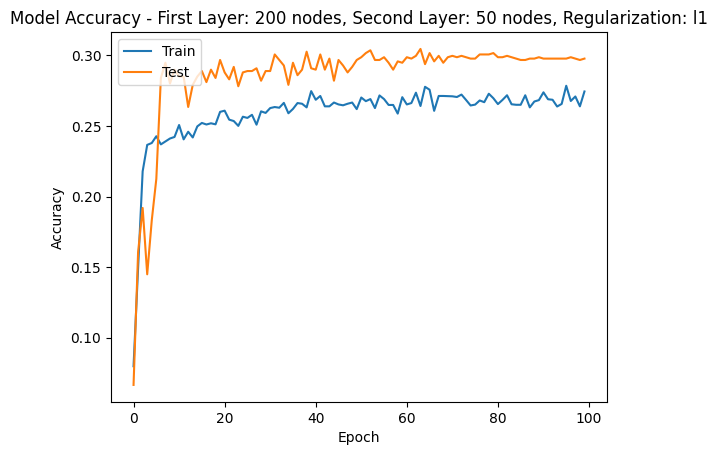

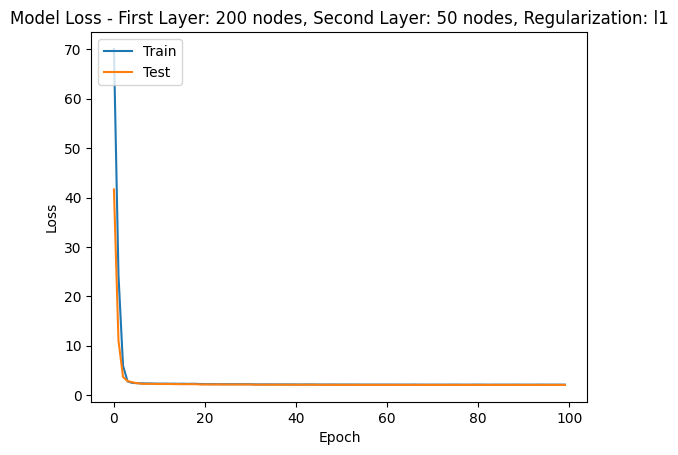

Testing model with first layer: 200 nodes, second layer: 50 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0920 - loss: 12.4671 - val_accuracy: 0.1548 - val_loss: 8.0971 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1864 - loss: 7.4648 - val_accuracy: 0.2106 - val_loss: 5.3170 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2241 - loss: 4.9446 - val_accuracy: 0.2439 - val_loss: 3.8276 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2382 - loss: 3.6772 - val_accuracy: 0.2772 - val_loss: 3.0179 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step accuracy: 0.2605 - loss: 2.9743 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2506, Train Precision = 0.3610, Train Recall = 0.2740, Train MSE = 6.4241, Train R² = 0.5640, Val Accuracy = 0.2723, Val Precision = 0.3946, Val Recall = 0.2723, Val MSE = 7.2272, Val R² = 0.5096
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

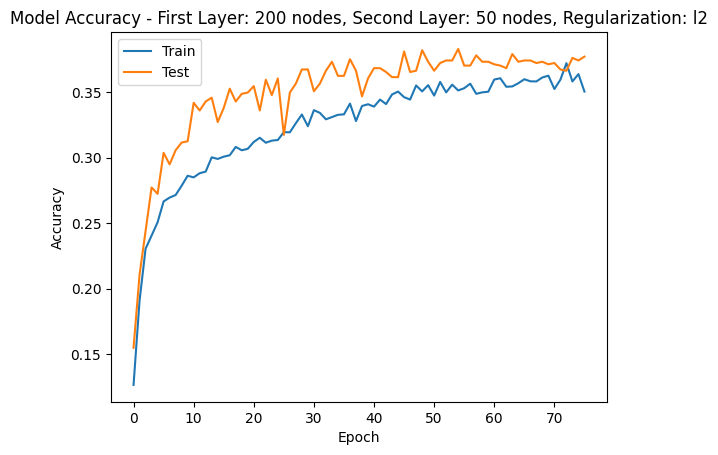

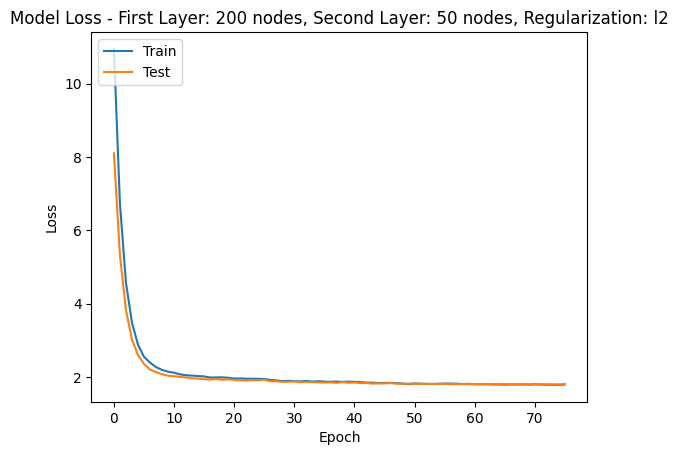

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0989 - loss: 5.1517 - val_accuracy: 0.2076 - val_loss: 4.0671 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2013 - loss: 4.2451 - val_accuracy: 0.2243 - val_loss: 3.7307 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 3.9093 - val_accuracy: 0.2772 - val_loss: 3.4822 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2390 - loss: 3.7104 - val_accuracy: 0.2997 - val_loss: 3.3276 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step accuracy: 0.2588 - loss: 3.5591 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2615, Train Precision = 0.3758, Train Recall = 0.3337, Train MSE = 6.0617, Train R² = 0.5886, Val Accuracy = 0.3095, Val Precision = 0.4097, Val Recall = 0.3095, Val MSE = 6.9040, Val R² = 0.5315
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

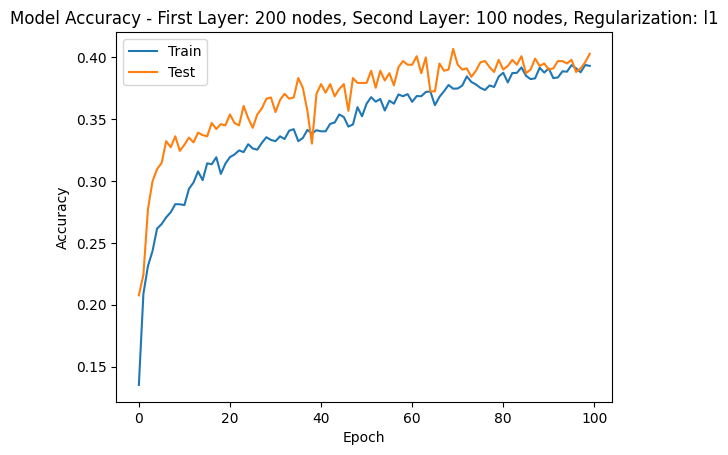

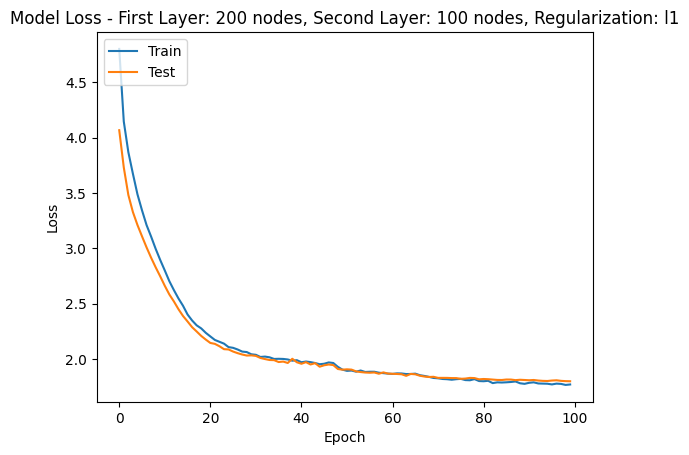

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1042 - loss: 3.6304 - val_accuracy: 0.1802 - val_loss: 2.6726 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1836 - loss: 2.8581 - val_accuracy: 0.2155 - val_loss: 2.3954 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2137 - loss: 2.5982 - val_accuracy: 0.2703 - val_loss: 2.2157 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 2.4584 - val_accuracy: 0.2791 - val_loss: 2.1366 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step accuracy: 0.2557 - loss: 2.3424 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2562, Train Precision = 0.3663, Train Recall = 0.3221, Train MSE = 6.3177, Train R² = 0.5712, Val Accuracy = 0.2977, Val Precision = 0.3709, Val Recall = 0.2977, Val MSE = 6.9892, Val R² = 0.5257
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

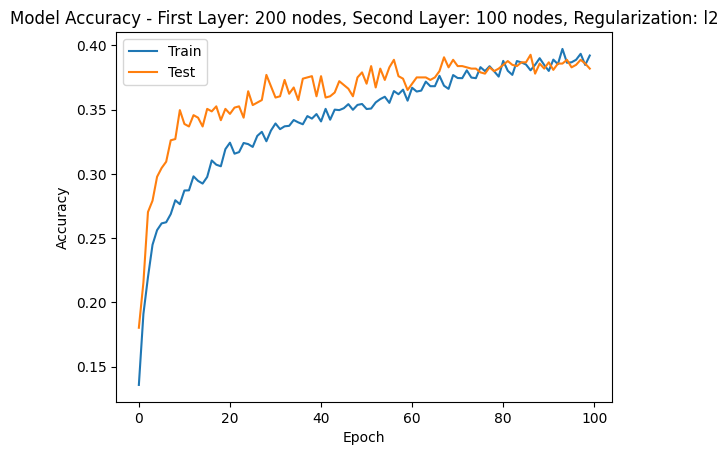

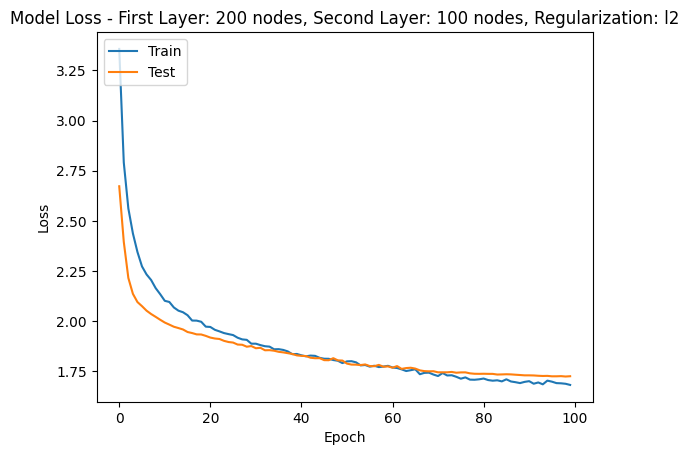

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1015 - loss: 11.2553 - val_accuracy: 0.2165 - val_loss: 9.2543 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1982 - loss: 9.1101 - val_accuracy: 0.2498 - val_loss: 7.6970 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2329 - loss: 7.5802 - val_accuracy: 0.2684 - val_loss: 6.3492 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2430 - loss: 6.2816 - val_accuracy: 0.3046 - val_loss: 5.2590 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2582 - loss: 5.2289 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2547, Train Precision = 0.3706, Train Recall = 0.3176, Train MSE = 6.5712, Train R² = 0.5540, Val Accuracy = 0.3017, Val Precision = 0.3680, Val Recall = 0.3017, Val MSE = 7.5103, Val R² = 0.4904
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3290 - loss: 1.9549 - val_accuracy: 0.3467 - val_loss: 1.9391 - learning_rate: 2.5000e-04
Epoch 47/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 1.9704 - val_accuracy: 0.3595 - val_loss: 1.9355 - learning_rate: 2.5000e-04
Epoch 48/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3333 - loss: 1.9398 - val_accuracy: 0.3546 - val_loss: 1.9391 - learning_rate: 2.5000e-04
Epoch 49/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3369 - loss: 1.9463 - val_accuracy: 0.3595 - val_loss: 1.9322 - learning_rate: 2.5000e-04
Epoch 50/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step accuracy: 0.3418 - loss: 1.9501 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 50: Train Accuracy = 0.3347, Train Precision = 0.4352, Train Recall = 0.3699, Train MSE = 5.0028, Train R² = 0.6604, Val Accuracy = 0.3702, Val Precision = 0.4322, Val Recall = 0.3702, Val MSE = 6.2439, Val R² = 0.5763
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3343 - loss: 1.9617 - val_accuracy: 0.3634 - val_loss: 1.9421 - learning_rate: 2.5000e-04
Epoch 52/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3309 - loss: 1.9530 - val_accuracy: 0.3692 - val_loss: 1.9282 - learning_rate: 2.5000e-04
Epoch 53/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3405 - loss: 1.9356 - val_accuracy: 0.3653 - val_loss: 1.9249 - learning_rate: 2.5000e-04
Epoch 54/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.9445 - val_accuracy: 0.3497 - val_loss: 1.9291 - learning_rate: 2.5000e-04
Epoch 55/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step accuracy: 0.3311 - loss: 1.9144 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 55: Train Accuracy = 0.3306, Train Precision = 0.4254, Train Recall = 0.3657, Train MSE = 5.1573, Train R² = 0.6500, Val Accuracy = 0.3614, Val Precision = 0.4212, Val Recall = 0.3614, Val MSE = 6.2938, Val R² = 0.5729
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3437 - loss: 1.8827 - val_accuracy: 0.3751 - val_loss: 1.8810 - learning_rate: 6.2500e-05
Epoch 87/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3535 - loss: 1.8738 - val_accuracy: 0.3663 - val_loss: 1.8776 - learning_rate: 6.2500e-05
Epoch 88/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 1.8677 - val_accuracy: 0.3683 - val_loss: 1.8742 - learning_rate: 3.1250e-05
Epoch 89/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3453 - loss: 1.8748 - val_accuracy: 0.3722 - val_loss: 1.8738 - learning_rate: 3.1250e-05
Epoch 90/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step accuracy: 0.3546 - loss: 1.8771 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 90: Train Accuracy = 0.3525, Train Precision = 0.4426, Train Recall = 0.3795, Train MSE = 4.8250, Train R² = 0.6725, Val Accuracy = 0.3683, Val Precision = 0.4304, Val Recall = 0.3683, Val MSE = 5.8247, Val R² = 0.6047
128/128 ━━━━━━━━━━━━━━━━━━━

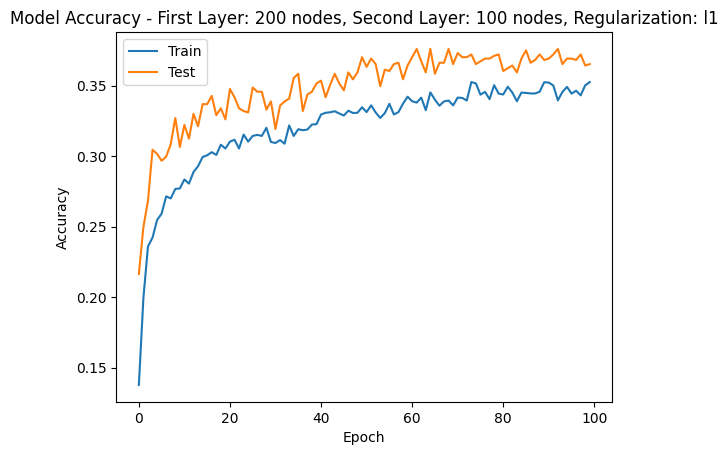

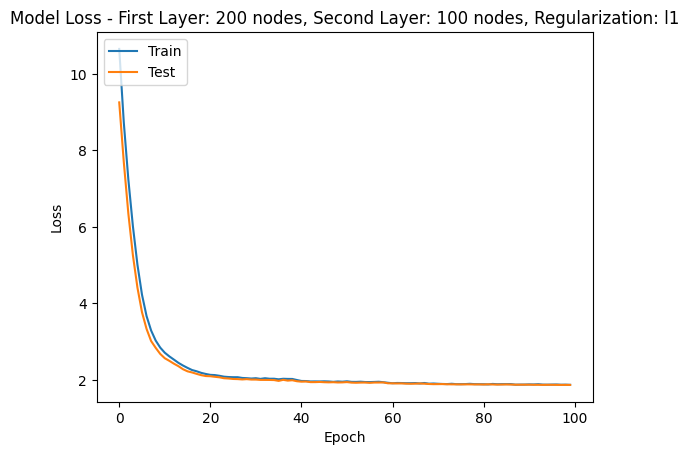

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0974 - loss: 4.2468 - val_accuracy: 0.2096 - val_loss: 3.3033 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1947 - loss: 3.4729 - val_accuracy: 0.2341 - val_loss: 2.9864 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2356 - loss: 3.1348 - val_accuracy: 0.2635 - val_loss: 2.7372 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2333 - loss: 2.9676 - val_accuracy: 0.2821 - val_loss: 2.5992 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2665 - loss: 2.8095 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2578, Train Precision = 0.3910, Train Recall = 0.3179, Train MSE = 6.4581, Train R² = 0.5617, Val Accuracy = 0.2870, Val Precision = 0.3402, Val Recall = 0.2870, Val MSE = 7.0617, Val R² = 0.5208
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3509 - loss: 1.8230 - val_accuracy: 0.3683 - val_loss: 1.8124 - learning_rate: 5.0000e-04
Epoch 42/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3574 - loss: 1.8139 - val_accuracy: 0.3781 - val_loss: 1.8112 - learning_rate: 5.0000e-04
Epoch 43/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3563 - loss: 1.8167 - val_accuracy: 0.3800 - val_loss: 1.8151 - learning_rate: 5.0000e-04
Epoch 44/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3624 - loss: 1.7971 - val_accuracy: 0.3595 - val_loss: 1.8145 - learning_rate: 5.0000e-04
Epoch 45/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step accuracy: 0.3423 - loss: 1.8071 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 45: Train Accuracy = 0.3502, Train Precision = 0.4392, Train Recall = 0.4066, Train MSE = 4.2082, Train R² = 0.7144, Val Accuracy = 0.3663, Val Precision = 0.4232, Val Recall = 0.3663, Val MSE = 5.2331, Val R² = 0.6449
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3815 - loss: 1.7639 - val_accuracy: 0.3800 - val_loss: 1.7753 - learning_rate: 2.5000e-04
Epoch 52/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.7527 - val_accuracy: 0.3741 - val_loss: 1.7743 - learning_rate: 2.5000e-04
Epoch 53/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3831 - loss: 1.7508 - val_accuracy: 0.3741 - val_loss: 1.7692 - learning_rate: 2.5000e-04
Epoch 54/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3780 - loss: 1.7561 - val_accuracy: 0.3947 - val_loss: 1.7665 - learning_rate: 2.5000e-04
Epoch 55/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step accuracy: 0.3877 - loss: 1.7401 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 55: Train Accuracy = 0.3832, Train Precision = 0.4191, Train Recall = 0.4258, Train MSE = 3.8814, Train R² = 0.7366, Val Accuracy = 0.3820, Val Precision = 0.4166, Val Recall = 0.3820, Val MSE = 4.8022, Val R² = 0.6741
128/128 ━━━━━━━━━━━━━━━━━━━

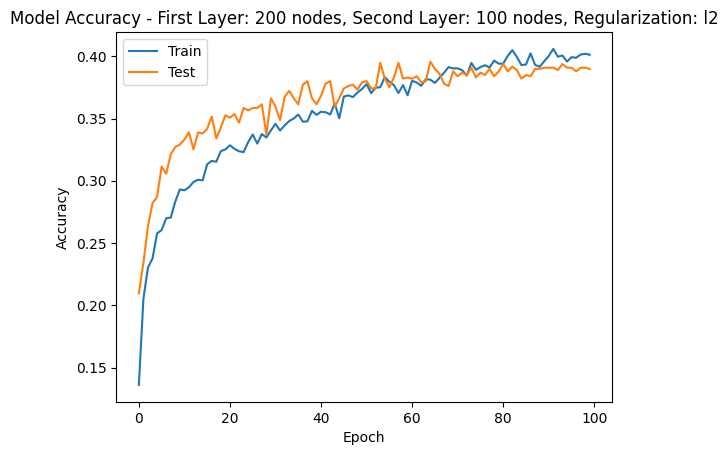

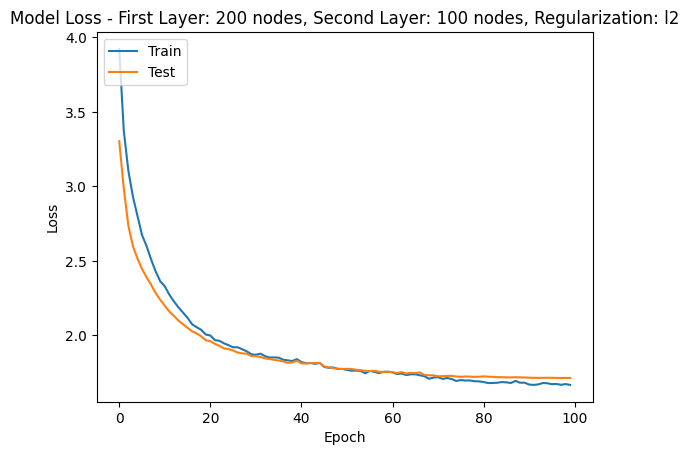

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1015 - loss: 15.6162 - val_accuracy: 0.2184 - val_loss: 12.1930 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2031 - loss: 11.4966 - val_accuracy: 0.2390 - val_loss: 9.0512 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 8.5077 - val_accuracy: 0.2586 - val_loss: 6.6477 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2422 - loss: 6.3210 - val_accuracy: 0.2723 - val_loss: 5.0143 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step accuracy: 0.2537 - loss: 4.8533 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2594, Train Precision = 0.3613, Train Recall = 0.2925, Train MSE = 6.6396, Train R² = 0.5494, Val Accuracy = 0.2772, Val Precision = 0.3447, Val Recall = 0.2772, Val MSE = 7.3516, Val R² = 0.5011
128/128 ━━━━━━━━━━━━━━━━━━━━ 

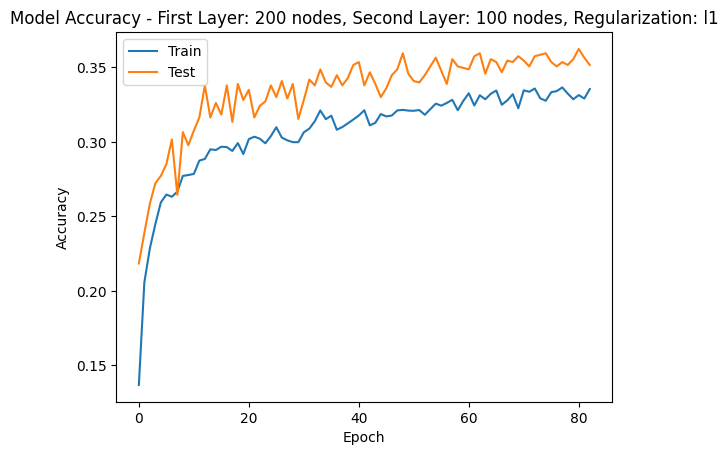

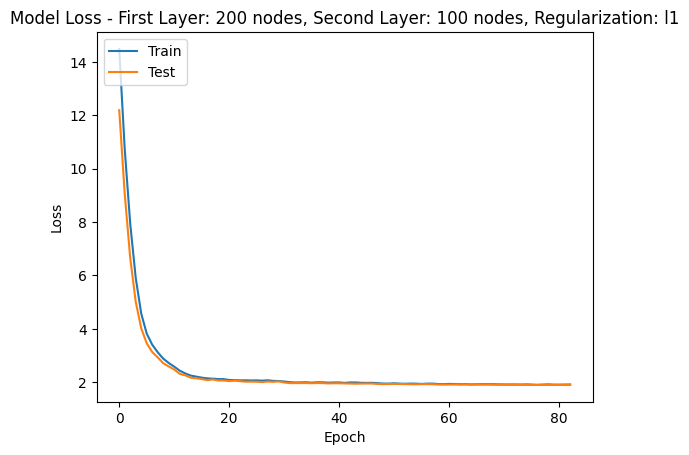

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1131 - loss: 4.6595 - val_accuracy: 0.2360 - val_loss: 3.6531 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1969 - loss: 3.8536 - val_accuracy: 0.2693 - val_loss: 3.2939 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2234 - loss: 3.4758 - val_accuracy: 0.2909 - val_loss: 3.0197 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: 3.2515 - val_accuracy: 0.3085 - val_loss: 2.8354 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2568 - loss: 3.0235   
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2525, Train Precision = 0.3554, Train Recall = 0.3304, Train MSE = 6.5527, Train R² = 0.5552, Val Accuracy = 0.3242, Val Precision = 0.3927, Val Recall = 0.3242, Val MSE = 7.2860, Val R² = 0.5056
128/128 ━━━━━━━━━━━━━━━━━━━━ 1

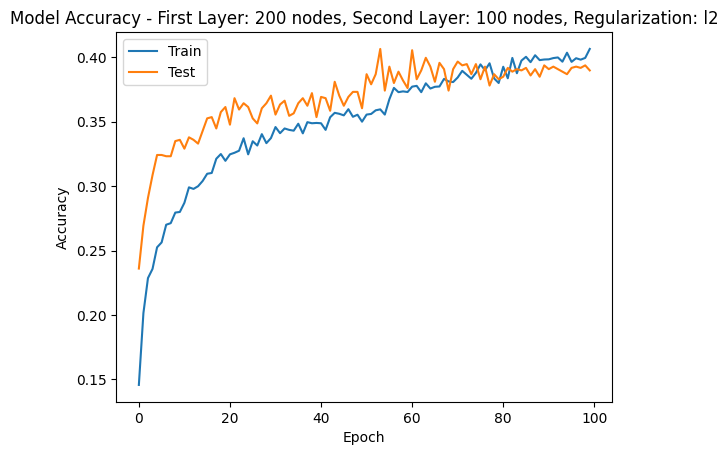

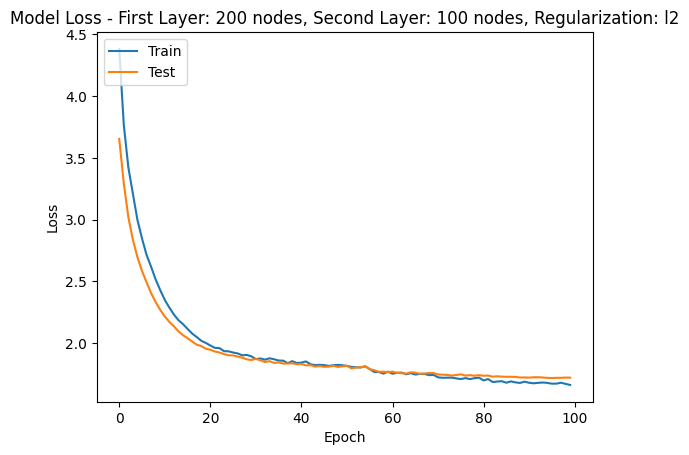

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0996 - loss: 18.6398 - val_accuracy: 0.1734 - val_loss: 14.1071 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1800 - loss: 13.2661 - val_accuracy: 0.2037 - val_loss: 9.9776 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 9.3163 - val_accuracy: 0.2439 - val_loss: 6.9304 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2434 - loss: 6.5716 - val_accuracy: 0.2625 - val_loss: 5.0427 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step accuracy: 0.2483 - loss: 4.9058 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2492, Train Precision = 0.3514, Train Recall = 0.2770, Train MSE = 7.1007, Train R² = 0.5181, Val Accuracy = 0.2723, Val Precision = 0.3768, Val Recall = 0.2723, Val MSE = 7.7267, Val R² = 0.4757
128/128 ━━━━━━━━━━━━━━━━━━━━ 

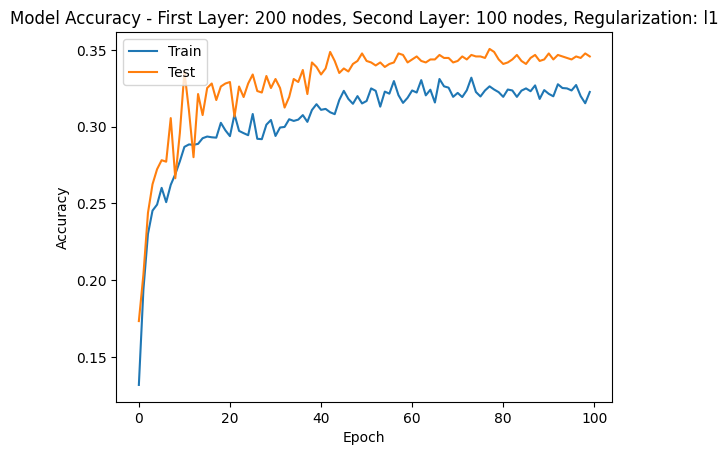

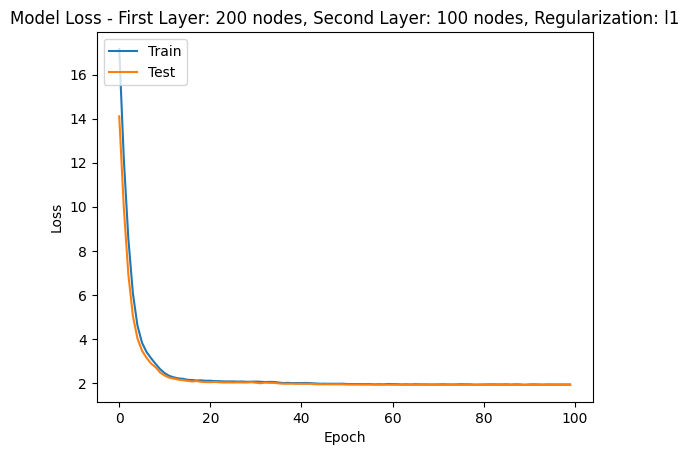

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1044 - loss: 5.0088 - val_accuracy: 0.2321 - val_loss: 3.9063 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1985 - loss: 4.0442 - val_accuracy: 0.2703 - val_loss: 3.4917 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 3.6713 - val_accuracy: 0.2899 - val_loss: 3.1763 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2489 - loss: 3.3756 - val_accuracy: 0.2987 - val_loss: 2.9576 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step accuracy: 0.2508 - loss: 3.1649 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2487, Train Precision = 0.3765, Train Recall = 0.3230, Train MSE = 6.3222, Train R² = 0.5709, Val Accuracy = 0.2938, Val Precision = 0.3747, Val Recall = 0.2938, Val MSE = 7.1978, Val R² = 0.5116
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

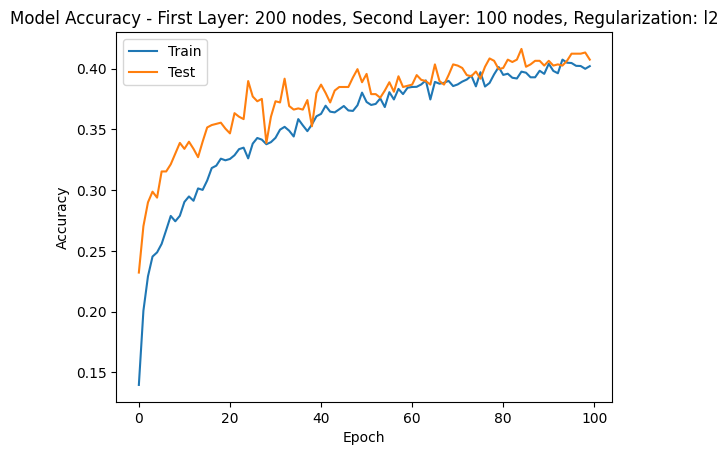

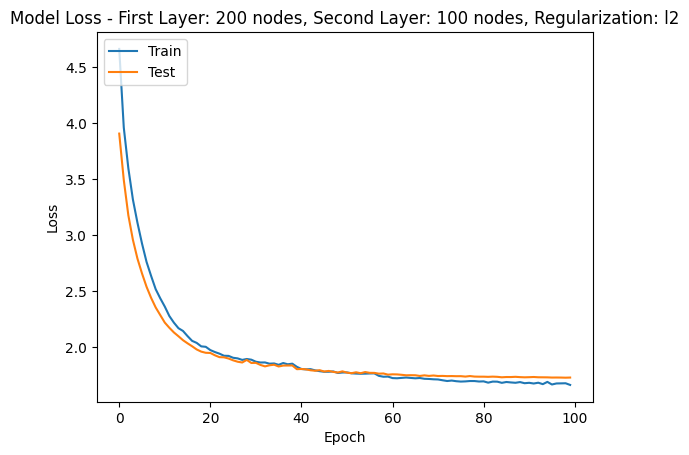

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0894 - loss: 71.6281 - val_accuracy: 0.1273 - val_loss: 35.1880 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1739 - loss: 27.6350 - val_accuracy: 0.1871 - val_loss: 11.1414 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2138 - loss: 8.8406 - val_accuracy: 0.1273 - val_loss: 5.3831 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2352 - loss: 4.5222 - val_accuracy: 0.1783 - val_loss: 3.4156 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step accuracy: 0.2569 - loss: 2.8800 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2584, Train Precision = 0.3832, Train Recall = 0.1784, Train MSE = 10.0130, Train R² = 0.3204, Val Accuracy = 0.1832, Val Precision = 0.3847, Val Recall = 0.1832, Val MSE = 10.4270, Val R² = 0.2924
128/128 ━━━━━━━━━━━━━━━━━━

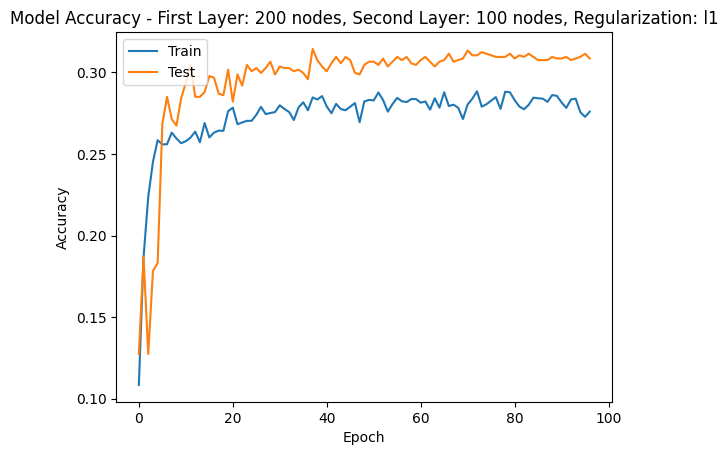

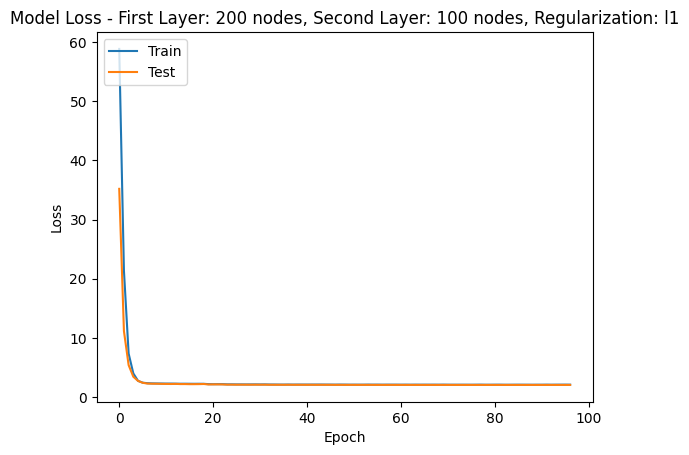

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1021 - loss: 10.6811 - val_accuracy: 0.2086 - val_loss: 7.5573 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1981 - loss: 7.2093 - val_accuracy: 0.2302 - val_loss: 5.5152 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 5.3204 - val_accuracy: 0.2547 - val_loss: 4.2082 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2394 - loss: 4.1518 - val_accuracy: 0.2909 - val_loss: 3.3839 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step accuracy: 0.2656 - loss: 3.4223 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2637, Train Precision = 0.3923, Train Recall = 0.3079, Train MSE = 6.5804, Train R² = 0.5534, Val Accuracy = 0.2909, Val Precision = 0.4155, Val Recall = 0.2909, Val MSE = 7.5338, Val R² = 0.4888
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

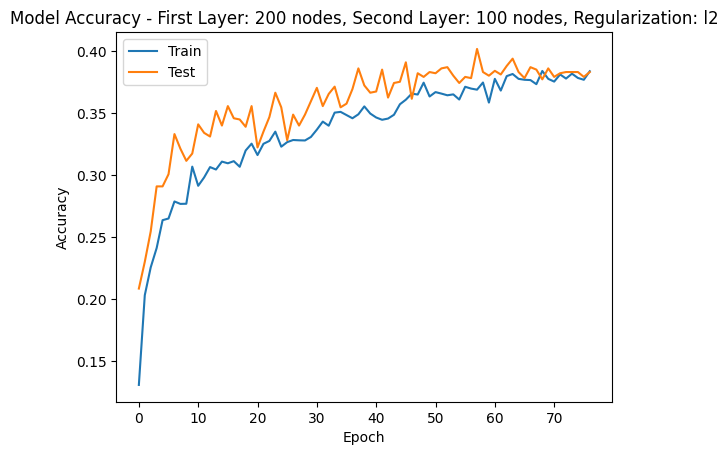

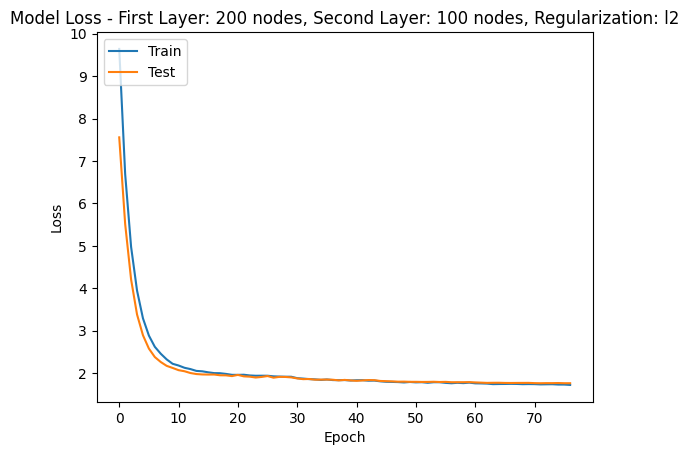

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0779 - loss: 135.7430 - val_accuracy: 0.1704 - val_loss: 58.3207 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1395 - loss: 42.7001 - val_accuracy: 0.1342 - val_loss: 10.6495 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2212 - loss: 7.5254 - val_accuracy: 0.1342 - val_loss: 3.6354 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2472 - loss: 2.9635 - val_accuracy: 0.1342 - val_loss: 2.8431 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step accuracy: 0.2444 - loss: 2.5049 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2418, Train Precision = 0.5163, Train Recall = 0.1869, Train MSE = 11.1001, Train R² = 0.2466, Val Accuracy = 0.1871, Val Precision = 0.5126, Val Recall = 0.1871, Val MSE = 11.4476, Val R² = 0.2232
128/128 ━━━━━━━━━━━━━━━━━

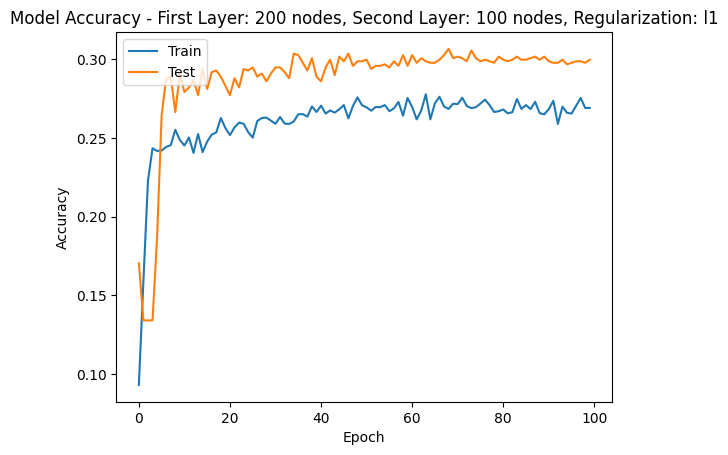

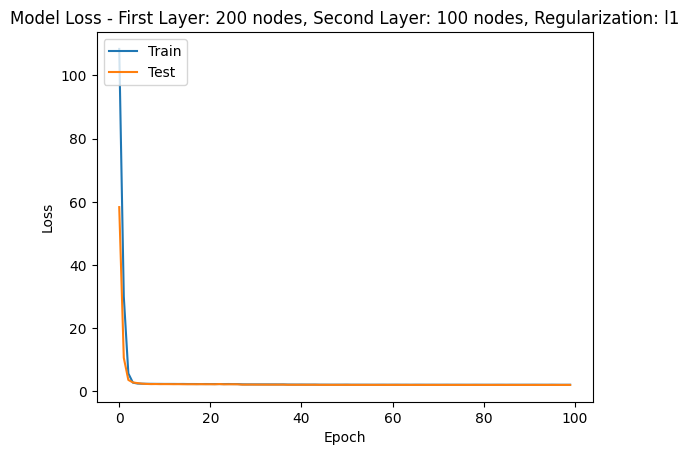

Testing model with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1057 - loss: 16.6300 - val_accuracy: 0.1626 - val_loss: 10.0000 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2081 - loss: 8.8603 - val_accuracy: 0.1841 - val_loss: 5.9862 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2255 - loss: 5.4494 - val_accuracy: 0.2400 - val_loss: 4.0742 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 3.8410 - val_accuracy: 0.2782 - val_loss: 3.1410 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step accuracy: 0.2690 - loss: 3.0900 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2633, Train Precision = 0.3449, Train Recall = 0.2981, Train MSE = 6.5304, Train R² = 0.5568, Val Accuracy = 0.2889, Val Precision = 0.3393, Val Recall = 0.2889, Val MSE = 7.0901, Val R² = 0.5189
128/128 ━━━━━━━━━━━━━━━━━━━━ 1

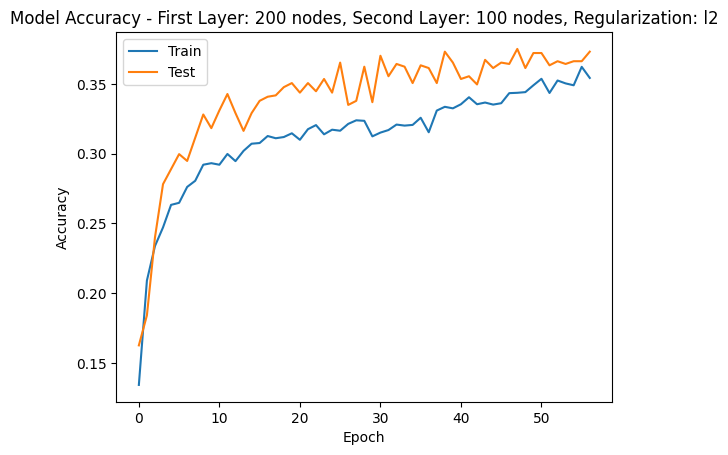

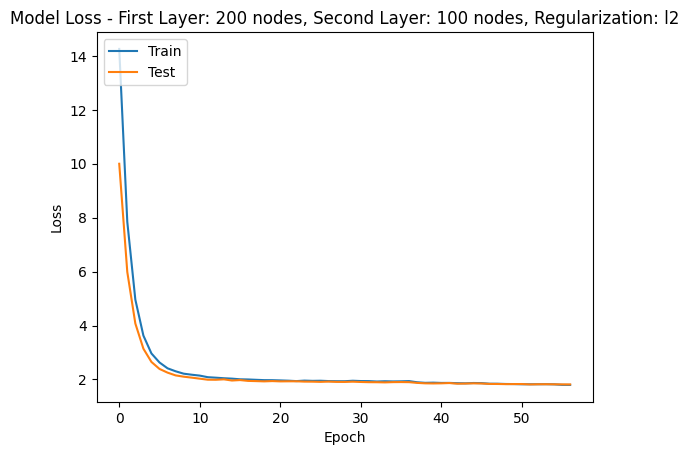

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1166 - loss: 4.8736 - val_accuracy: 0.1577 - val_loss: 4.2889 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2080 - loss: 4.0976 - val_accuracy: 0.1920 - val_loss: 3.9247 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2261 - loss: 3.8422 - val_accuracy: 0.2556 - val_loss: 3.5461 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2471 - loss: 3.5894 - val_accuracy: 0.2997 - val_loss: 3.2809 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step accuracy: 0.2610 - loss: 3.3767 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2577, Train Precision = 0.4071, Train Recall = 0.3221, Train MSE = 6.2985, Train R² = 0.5725, Val Accuracy = 0.3291, Val Precision = 0.4073, Val Recall = 0.3291, Val MSE = 7.1753, Val R² = 0.5131
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3155 - loss: 2.2568 - val_accuracy: 0.3164 - val_loss: 2.1999 - learning_rate: 5.0000e-04
Epoch 17/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3154 - loss: 2.2174 - val_accuracy: 0.3526 - val_loss: 2.1641 - learning_rate: 5.0000e-04
Epoch 18/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3261 - loss: 2.1779 - val_accuracy: 0.3497 - val_loss: 2.1291 - learning_rate: 5.0000e-04
Epoch 19/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3166 - loss: 2.1703 - val_accuracy: 0.3526 - val_loss: 2.1173 - learning_rate: 5.0000e-04
Epoch 20/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step accuracy: 0.3218 - loss: 2.1253 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 20: Train Accuracy = 0.3190, Train Precision = 0.4059, Train Recall = 0.3537, Train MSE = 4.4610, Train R² = 0.6972, Val Accuracy = 0.3144, Val Precision = 0.4007, Val Recall = 0.3144, Val MSE = 5.4515, Val R² = 0.6301
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3255 - loss: 1.9792 - val_accuracy: 0.3732 - val_loss: 1.9404 - learning_rate: 5.0000e-04
Epoch 37/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3428 - loss: 1.9572 - val_accuracy: 0.3722 - val_loss: 1.9217 - learning_rate: 5.0000e-04
Epoch 38/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3393 - loss: 1.9516 - val_accuracy: 0.3683 - val_loss: 1.9229 - learning_rate: 5.0000e-04
Epoch 39/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3387 - loss: 1.9595 - val_accuracy: 0.3653 - val_loss: 1.9372 - learning_rate: 5.0000e-04
Epoch 40/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step accuracy: 0.3371 - loss: 1.9416 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 40: Train Accuracy = 0.3367, Train Precision = 0.4532, Train Recall = 0.3849, Train MSE = 4.5522, Train R² = 0.6910, Val Accuracy = 0.3653, Val Precision = 0.4364, Val Recall = 0.3653, Val MSE = 5.4917, Val R² = 0.6273
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3743 - loss: 1.8080 - val_accuracy: 0.4006 - val_loss: 1.8174 - learning_rate: 1.2500e-04
Epoch 67/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3821 - loss: 1.8014 - val_accuracy: 0.3937 - val_loss: 1.8132 - learning_rate: 1.2500e-04
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3770 - loss: 1.8000 - val_accuracy: 0.3898 - val_loss: 1.8094 - learning_rate: 1.2500e-04
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3727 - loss: 1.8095 - val_accuracy: 0.3967 - val_loss: 1.8192 - learning_rate: 1.2500e-04
Epoch 70/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.3815 - loss: 1.7955 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 70: Train Accuracy = 0.3735, Train Precision = 0.4713, Train Recall = 0.4116, Train MSE = 3.8487, Train R² = 0.7388, Val Accuracy = 0.3830, Val Precision = 0.4498, Val Recall = 0.3830, Val MSE = 5.1832, Val R² = 0.6483
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3690 - loss: 1.8064 - val_accuracy: 0.3839 - val_loss: 1.8110 - learning_rate: 1.2500e-04
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3818 - loss: 1.7951 - val_accuracy: 0.4045 - val_loss: 1.8055 - learning_rate: 1.2500e-04
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3834 - loss: 1.8048 - val_accuracy: 0.3859 - val_loss: 1.8135 - learning_rate: 1.2500e-04
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3796 - loss: 1.8089 - val_accuracy: 0.3908 - val_loss: 1.8077 - learning_rate: 1.2500e-04
Epoch 75/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step accuracy: 0.3703 - loss: 1.7941 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 75: Train Accuracy = 0.3695, Train Precision = 0.4783, Train Recall = 0.4169, Train MSE = 3.8010, Train R² = 0.7420, Val Accuracy = 0.3957, Val Precision = 0.4602, Val Recall = 0.3957, Val MSE = 4.8727, Val R² = 0.6693
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 1.7648 - val_accuracy: 0.3908 - val_loss: 1.7901 - learning_rate: 6.2500e-05
Epoch 87/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3865 - loss: 1.7646 - val_accuracy: 0.3947 - val_loss: 1.7863 - learning_rate: 3.1250e-05
Epoch 88/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3735 - loss: 1.7710 - val_accuracy: 0.3918 - val_loss: 1.7867 - learning_rate: 3.1250e-05
Epoch 89/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3860 - loss: 1.7462 - val_accuracy: 0.3967 - val_loss: 1.7833 - learning_rate: 3.1250e-05
Epoch 90/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step accuracy: 0.3860 - loss: 1.7570 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 90: Train Accuracy = 0.3847, Train Precision = 0.4891, Train Recall = 0.4309, Train MSE = 3.7590, Train R² = 0.7449, Val Accuracy = 0.3928, Val Precision = 0.4561, Val Recall = 0.3928, Val MSE = 4.8286, Val R² = 0.6723
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.7681 - val_accuracy: 0.3937 - val_loss: 1.7845 - learning_rate: 3.1250e-05
Epoch 92/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3788 - loss: 1.7458 - val_accuracy: 0.3986 - val_loss: 1.7835 - learning_rate: 3.1250e-05
Epoch 93/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3835 - loss: 1.7555 - val_accuracy: 0.3986 - val_loss: 1.7842 - learning_rate: 3.1250e-05
Epoch 94/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3832 - loss: 1.7614 - val_accuracy: 0.3986 - val_loss: 1.7810 - learning_rate: 1.5625e-05
Epoch 95/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step accuracy: 0.3785 - loss: 1.7471 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 95: Train Accuracy = 0.3825, Train Precision = 0.4687, Train Recall = 0.4337, Train MSE = 3.7633, Train R² = 0.7446, Val Accuracy = 0.3957, Val Precision = 0.4596, Val Recall = 0.3957, Val MSE = 4.8678, Val R² = 0.6697
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3896 - loss: 1.7644 - val_accuracy: 0.3976 - val_loss: 1.7799 - learning_rate: 1.5625e-05
Epoch 97/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3921 - loss: 1.7436 - val_accuracy: 0.3976 - val_loss: 1.7801 - learning_rate: 1.5625e-05
Epoch 98/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3804 - loss: 1.7708 - val_accuracy: 0.4006 - val_loss: 1.7806 - learning_rate: 1.5625e-05
Epoch 99/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3932 - loss: 1.7586 - val_accuracy: 0.3967 - val_loss: 1.7805 - learning_rate: 7.8125e-06
Epoch 100/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step accuracy: 0.3830 - loss: 1.7576 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 100: Train Accuracy = 0.3890, Train Precision = 0.4687, Train Recall = 0.4331, Train MSE = 3.6691, Train R² = 0.7510, Val Accuracy = 0.3976, Val Precision = 0.4639, Val Recall = 0.3976, Val MSE = 4.8756, Val R² = 0.6691
128/128 ━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


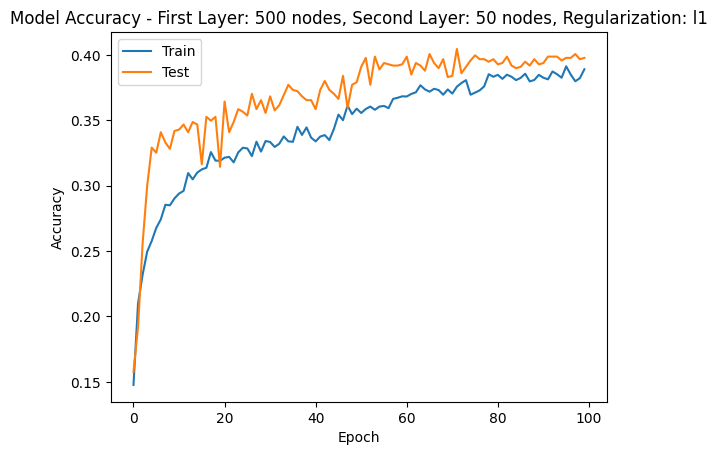

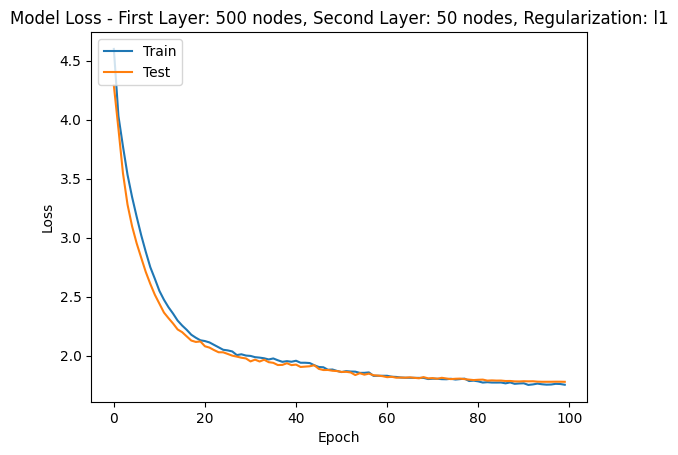

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1313 - loss: 3.3132 - val_accuracy: 0.2106 - val_loss: 2.6631 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2092 - loss: 2.6489 - val_accuracy: 0.2292 - val_loss: 2.4062 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2365 - loss: 2.4478 - val_accuracy: 0.2684 - val_loss: 2.2043 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2484 - loss: 2.3165 - val_accuracy: 0.3124 - val_loss: 2.0959 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step accuracy: 0.2590 - loss: 2.2555 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2625, Train Precision = 0.3519, Train Recall = 0.3320, Train MSE = 5.8934, Train R² = 0.6000, Val Accuracy = 0.3173, Val Precision = 0.3928, Val Recall = 0.3173, Val MSE = 6.6327, Val R² = 0.5499
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

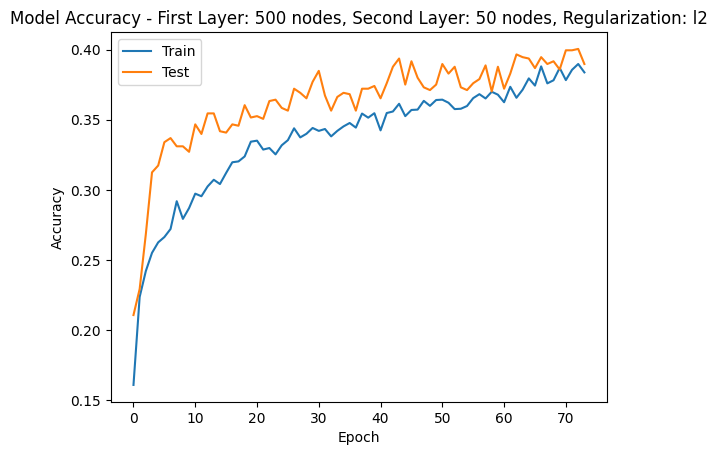

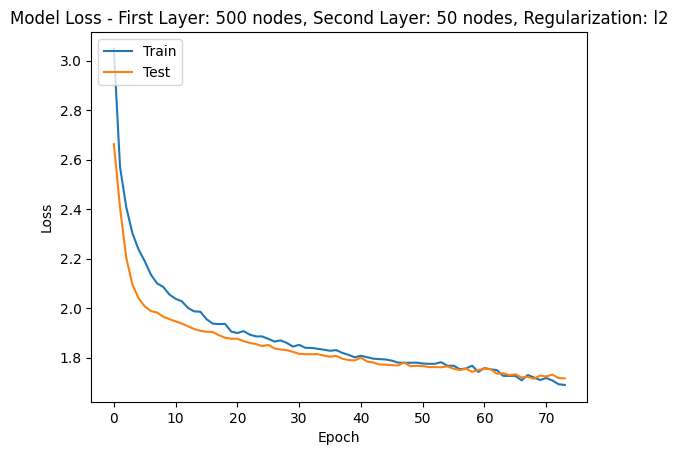

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1140 - loss: 11.1443 - val_accuracy: 0.1841 - val_loss: 9.0348 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2016 - loss: 8.6322 - val_accuracy: 0.2253 - val_loss: 7.0649 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2358 - loss: 6.6387 - val_accuracy: 0.2801 - val_loss: 5.4090 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2467 - loss: 5.1433 - val_accuracy: 0.2899 - val_loss: 4.2369 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step accuracy: 0.2645 - loss: 4.0833 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2593, Train Precision = 0.3915, Train Recall = 0.2851, Train MSE = 6.6603, Train R² = 0.5479, Val Accuracy = 0.2831, Val Precision = 0.3958, Val Recall = 0.2831, Val MSE = 7.3222, Val R² = 0.5031
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

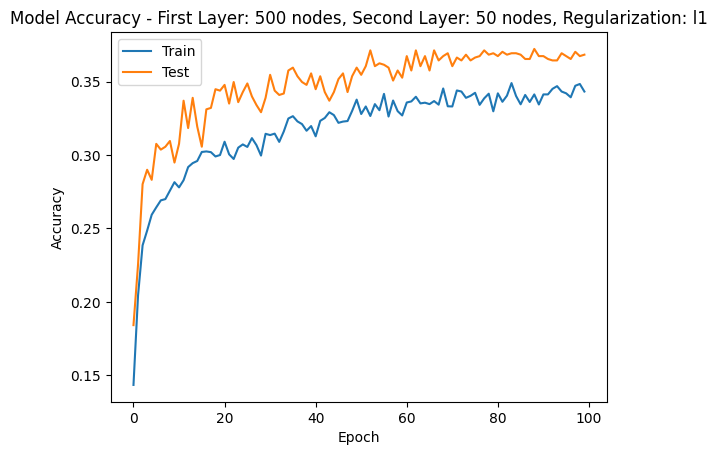

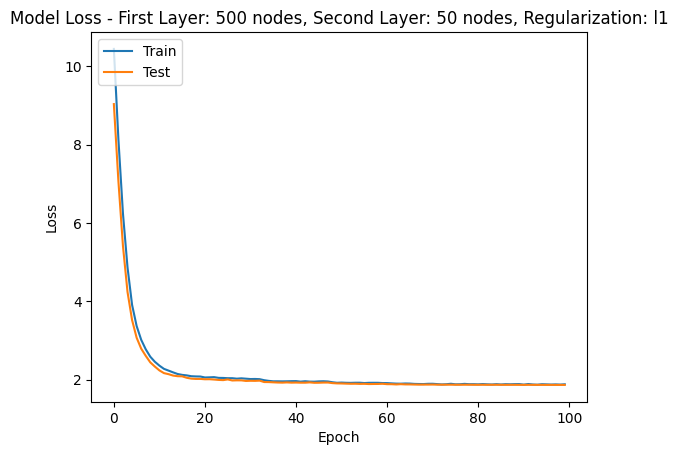

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1188 - loss: 3.8076 - val_accuracy: 0.2302 - val_loss: 3.1581 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2091 - loss: 3.1520 - val_accuracy: 0.2625 - val_loss: 2.8676 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2161 - loss: 2.9254 - val_accuracy: 0.2987 - val_loss: 2.6239 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 2.7258 - val_accuracy: 0.3026 - val_loss: 2.4665 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step accuracy: 0.2544 - loss: 2.6104 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2656, Train Precision = 0.3743, Train Recall = 0.3299, Train MSE = 6.3575, Train R² = 0.5685, Val Accuracy = 0.3242, Val Precision = 0.4036, Val Recall = 0.3242, Val MSE = 6.8746, Val R² = 0.5335
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

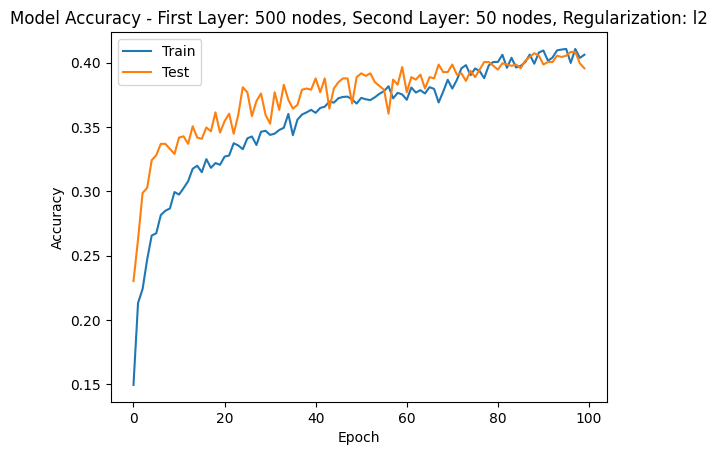

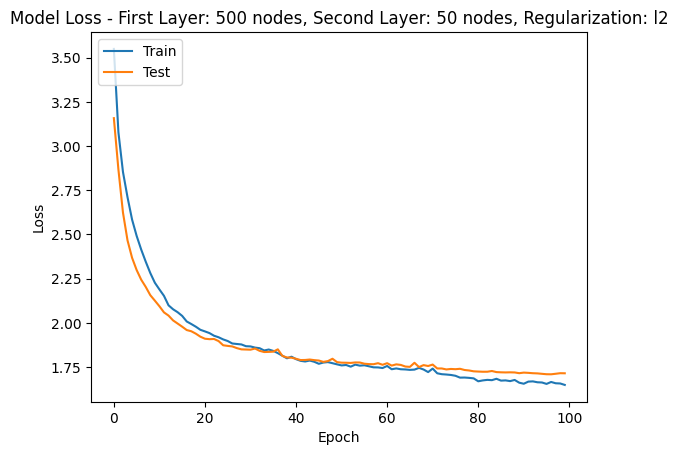

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1189 - loss: 15.5392 - val_accuracy: 0.1557 - val_loss: 11.6965 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2035 - loss: 10.7121 - val_accuracy: 0.1910 - val_loss: 7.9402 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2240 - loss: 7.2255 - val_accuracy: 0.2018 - val_loss: 5.4057 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2606 - loss: 4.9593 - val_accuracy: 0.2321 - val_loss: 4.0325 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2578 - loss: 3.8216 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2532, Train Precision = 0.3029, Train Recall = 0.2485, Train MSE = 6.9882, Train R² = 0.5257, Val Accuracy = 0.2556, Val Precision = 0.3950, Val Recall = 0.2556, Val MSE = 7.5818, Val R² = 0.4855
128/128 ━━━━━━━━━━━━━━━━━━━━ 

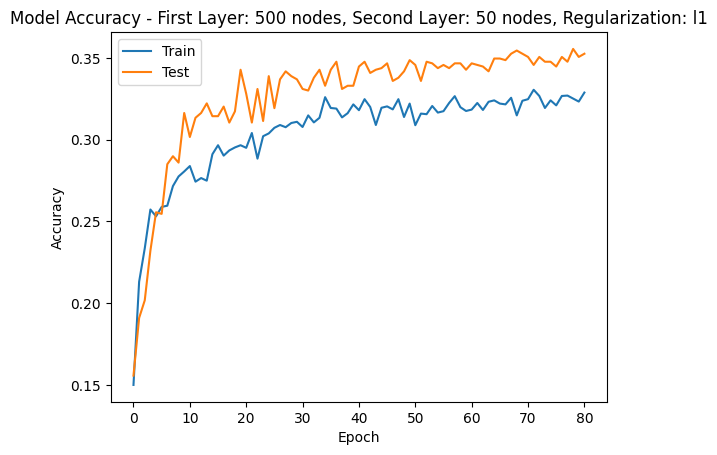

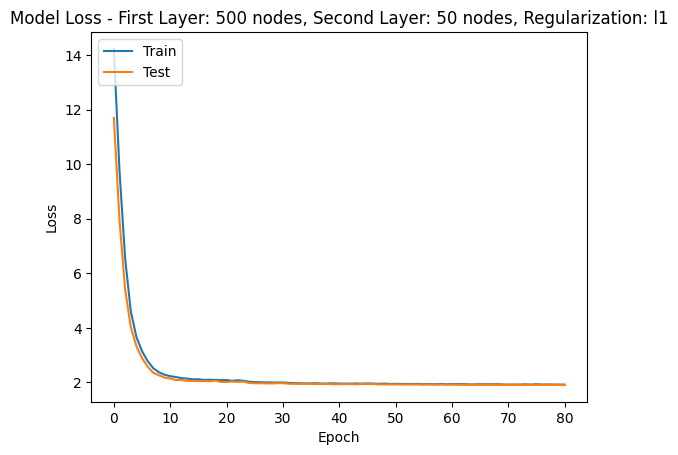

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1186 - loss: 4.1533 - val_accuracy: 0.2155 - val_loss: 3.4269 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2135 - loss: 3.4161 - val_accuracy: 0.2419 - val_loss: 3.1251 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2369 - loss: 3.1398 - val_accuracy: 0.2664 - val_loss: 2.8335 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2537 - loss: 2.9084 - val_accuracy: 0.2968 - val_loss: 2.6299 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step accuracy: 0.2642 - loss: 2.7579 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2588, Train Precision = 0.3679, Train Recall = 0.3205, Train MSE = 6.1014, Train R² = 0.5859, Val Accuracy = 0.2987, Val Precision = 0.3813, Val Recall = 0.2987, Val MSE = 6.9647, Val R² = 0.5274
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

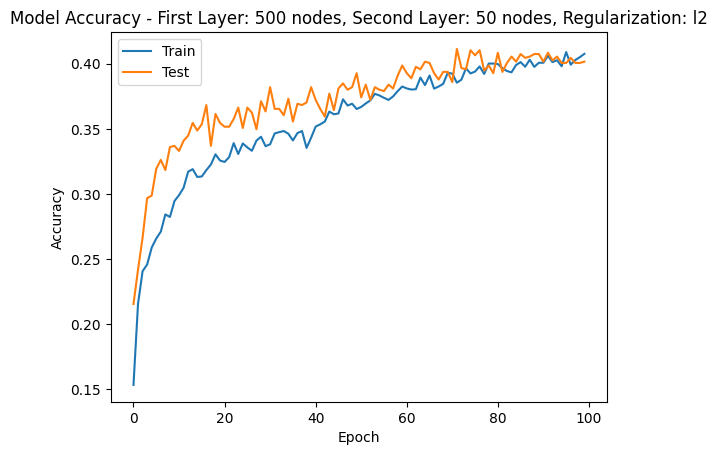

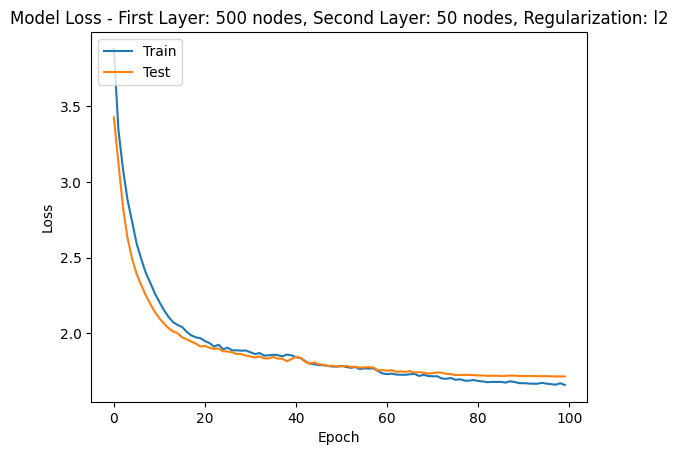

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1194 - loss: 18.2661 - val_accuracy: 0.1577 - val_loss: 12.9641 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2105 - loss: 11.5577 - val_accuracy: 0.1596 - val_loss: 8.0936 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2466 - loss: 7.1022 - val_accuracy: 0.1587 - val_loss: 5.2357 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2530 - loss: 4.7185 - val_accuracy: 0.1812 - val_loss: 3.9407 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step accuracy: 0.2698 - loss: 3.6149 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2671, Train Precision = 0.3603, Train Recall = 0.2194, Train MSE = 8.1769, Train R² = 0.4450, Val Accuracy = 0.2174, Val Precision = 0.3191, Val Recall = 0.2174, Val MSE = 8.6484, Val R² = 0.4131
128/128 ━━━━━━━━━━━━━━━━━━━━ 

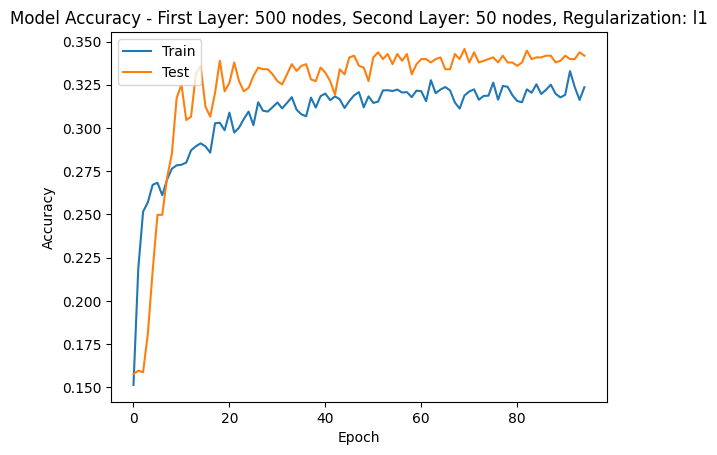

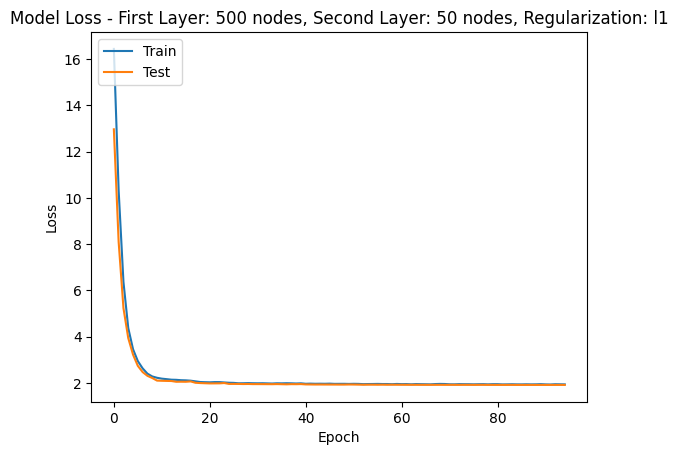

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1228 - loss: 4.3961 - val_accuracy: 0.1724 - val_loss: 3.7014 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2017 - loss: 3.6195 - val_accuracy: 0.2458 - val_loss: 3.3203 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2374 - loss: 3.2401 - val_accuracy: 0.2791 - val_loss: 2.9778 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2523 - loss: 3.0300 - val_accuracy: 0.2919 - val_loss: 2.7323 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step accuracy: 0.2737 - loss: 2.8265 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2656, Train Precision = 0.3601, Train Recall = 0.3263, Train MSE = 5.8568, Train R² = 0.6025, Val Accuracy = 0.3017, Val Precision = 0.3642, Val Recall = 0.3017, Val MSE = 6.8208, Val R² = 0.5371
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

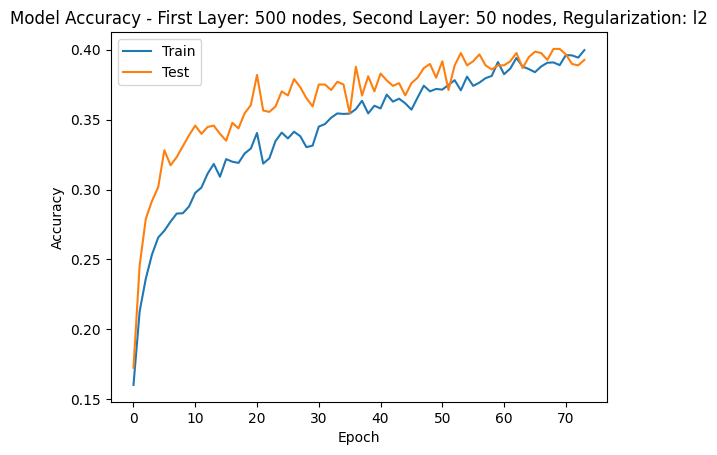

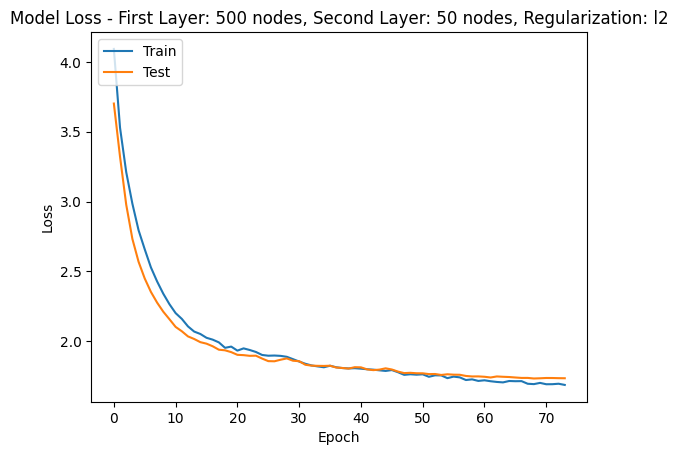

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0840 - loss: 68.8793 - val_accuracy: 0.0764 - val_loss: 26.3601 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1901 - loss: 18.9238 - val_accuracy: 0.1214 - val_loss: 6.3818 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 4.9446 - val_accuracy: 0.1939 - val_loss: 3.2764 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2451 - loss: 2.6970 - val_accuracy: 0.1596 - val_loss: 2.7767 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step accuracy: 0.2473 - loss: 2.4222 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2421, Train Precision = 0.4659, Train Recall = 0.2129, Train MSE = 8.4769, Train R² = 0.4246, Val Accuracy = 0.2311, Val Precision = 0.4910, Val Recall = 0.2311, Val MSE = 9.0039, Val R² = 0.3890
128/128 ━━━━━━━━━━━━━━━━━━━━ 

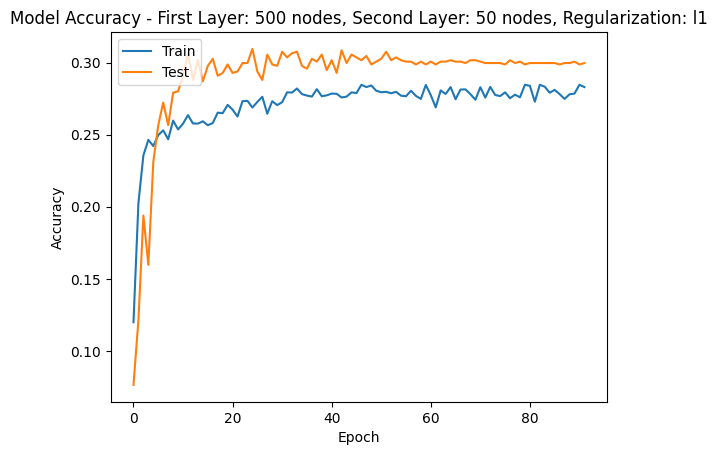

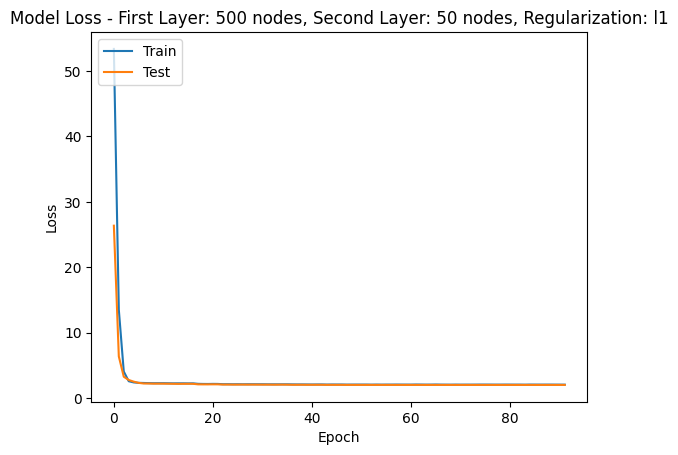

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1128 - loss: 8.5154 - val_accuracy: 0.1685 - val_loss: 6.2788 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2031 - loss: 5.7550 - val_accuracy: 0.2086 - val_loss: 4.6563 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2324 - loss: 4.2649 - val_accuracy: 0.2419 - val_loss: 3.5966 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2467 - loss: 3.4063 - val_accuracy: 0.2733 - val_loss: 2.9433 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step accuracy: 0.2743 - loss: 2.8808 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2719, Train Precision = 0.3856, Train Recall = 0.3026, Train MSE = 5.6448, Train R² = 0.6169, Val Accuracy = 0.2909, Val Precision = 0.3659, Val Recall = 0.2909, Val MSE = 6.3320, Val R² = 0.5703
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

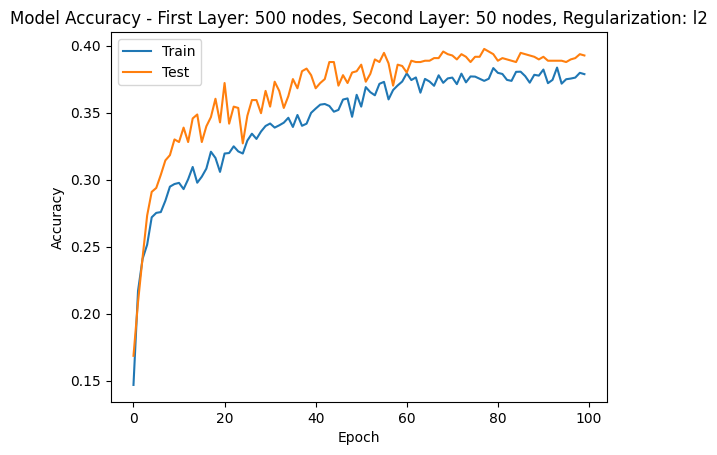

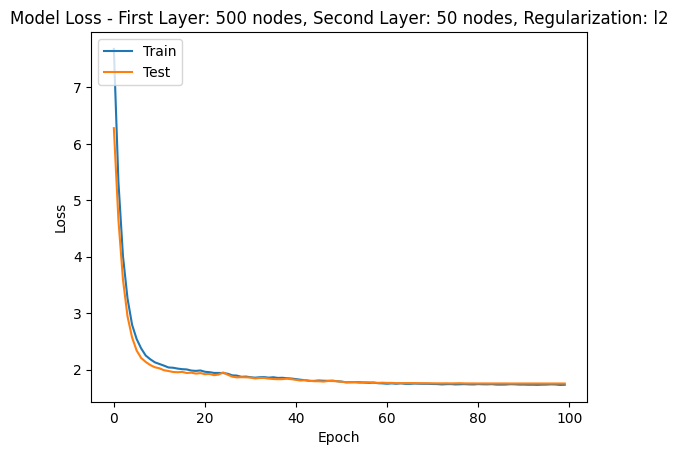

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0900 - loss: 127.9539 - val_accuracy: 0.1371 - val_loss: 36.3004 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1868 - loss: 22.6814 - val_accuracy: 0.1342 - val_loss: 4.2810 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2367 - loss: 3.2282 - val_accuracy: 0.1342 - val_loss: 2.9868 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2336 - loss: 2.5771 - val_accuracy: 0.1361 - val_loss: 2.8242 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step accuracy: 0.2382 - loss: 2.5319 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2426, Train Precision = 0.4617, Train Recall = 0.1988, Train MSE = 10.0251, Train R² = 0.3196, Val Accuracy = 0.1959, Val Precision = 0.4252, Val Recall = 0.1959, Val MSE = 10.3712, Val R² = 0.2962
128/128 ━━━━━━━━━━━━━━━━━━

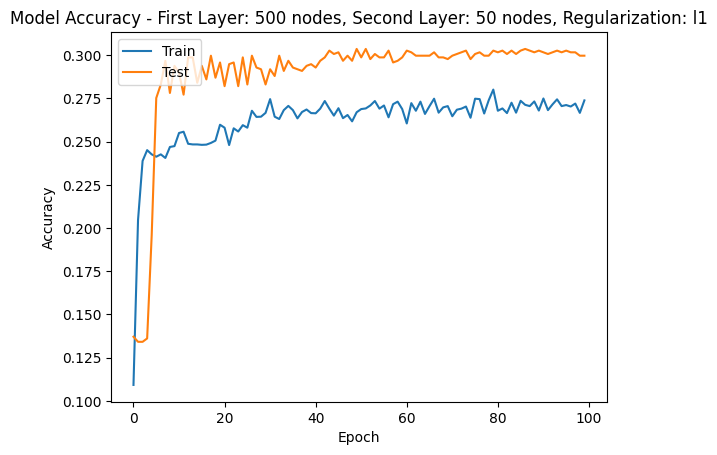

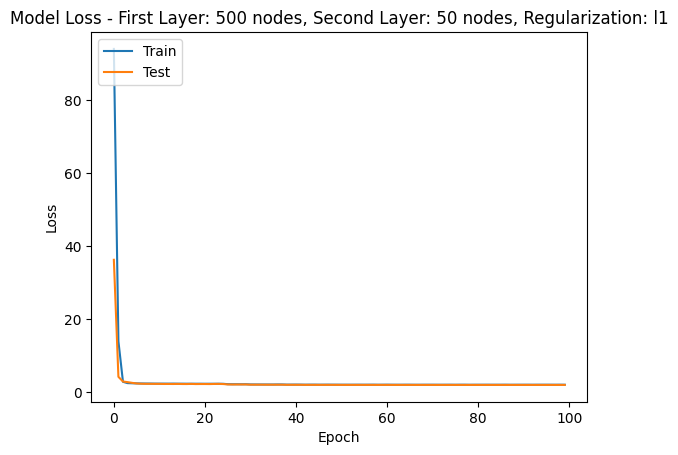

Testing model with first layer: 500 nodes, second layer: 50 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1099 - loss: 13.0789 - val_accuracy: 0.2086 - val_loss: 7.8123 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2017 - loss: 6.8368 - val_accuracy: 0.1978 - val_loss: 4.7842 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 4.2663 - val_accuracy: 0.2067 - val_loss: 3.4635 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 3.1780 - val_accuracy: 0.2693 - val_loss: 2.7740 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2638 - loss: 2.6761 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2614, Train Precision = 0.3322, Train Recall = 0.2588, Train MSE = 6.5995, Train R² = 0.5521, Val Accuracy = 0.2409, Val Precision = 0.4150, Val Recall = 0.2409, Val MSE = 7.1361, Val R² = 0.5157
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

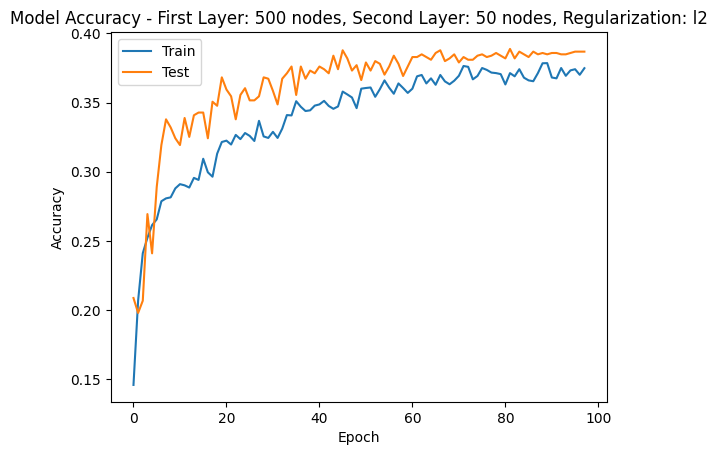

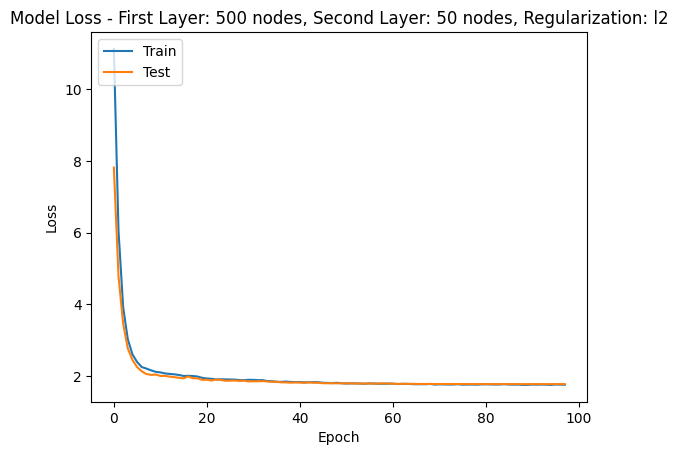

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1462 - loss: 6.0253 - val_accuracy: 0.2292 - val_loss: 5.1389 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2211 - loss: 5.1185 - val_accuracy: 0.2537 - val_loss: 4.6933 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 4.6866 - val_accuracy: 0.2635 - val_loss: 4.2955 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 4.3371 - val_accuracy: 0.2860 - val_loss: 3.9507 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2785 - loss: 4.0110 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2759, Train Precision = 0.3684, Train Recall = 0.3330, Train MSE = 5.7909, Train R² = 0.6070, Val Accuracy = 0.2997, Val Precision = 0.3540, Val Recall = 0.2997, Val MSE = 6.6092, Val R² = 0.5515
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

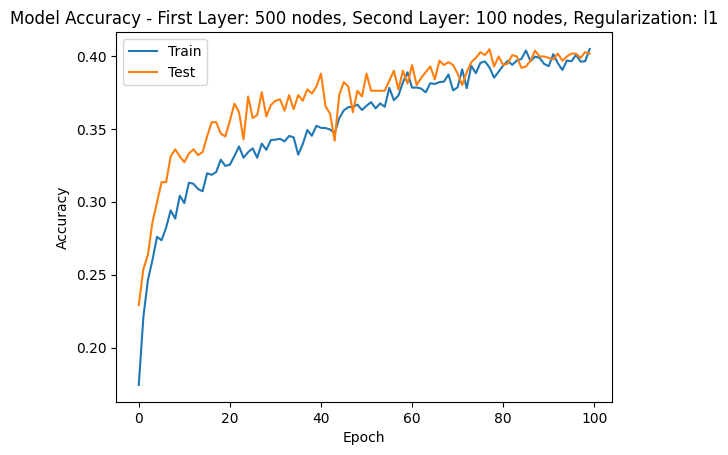

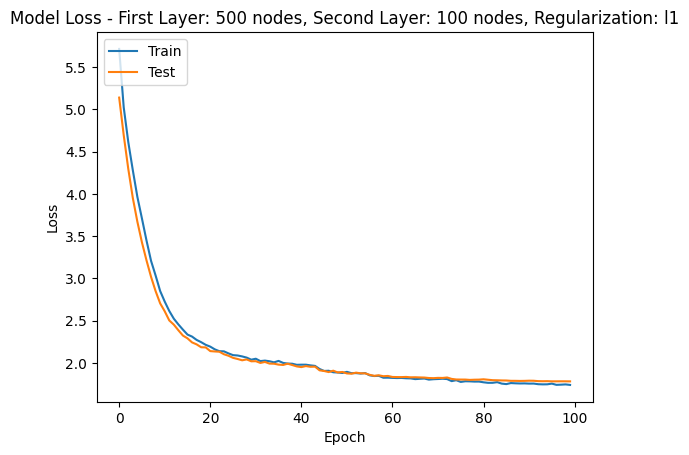

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.001...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1267 - loss: 3.4845 - val_accuracy: 0.1851 - val_loss: 2.7681 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2200 - loss: 2.7289 - val_accuracy: 0.2419 - val_loss: 2.4655 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2365 - loss: 2.5311 - val_accuracy: 0.2909 - val_loss: 2.2461 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2586 - loss: 2.3987 - val_accuracy: 0.3124 - val_loss: 2.1478 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2618 - loss: 2.3059 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2677, Train Precision = 0.3710, Train Recall = 0.3449, Train MSE = 5.9606, Train R² = 0.5954, Val Accuracy = 0.3310, Val Precision = 0.3716, Val Recall = 0.3310, Val MSE = 6.9040, Val R² = 0.5315
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3334 - loss: 1.9728 - val_accuracy: 0.3546 - val_loss: 1.9392 - learning_rate: 5.0000e-04
Epoch 17/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3200 - loss: 1.9854 - val_accuracy: 0.3448 - val_loss: 1.9356 - learning_rate: 5.0000e-04
Epoch 18/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3356 - loss: 1.9502 - val_accuracy: 0.3604 - val_loss: 1.9225 - learning_rate: 5.0000e-04
Epoch 19/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3349 - loss: 1.9291 - val_accuracy: 0.3546 - val_loss: 1.9219 - learning_rate: 5.0000e-04
Epoch 20/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step accuracy: 0.3368 - loss: 1.9351 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 20: Train Accuracy = 0.3331, Train Precision = 0.3815, Train Recall = 0.3889, Train MSE = 4.4506, Train R² = 0.6979, Val Accuracy = 0.3477, Val Precision = 0.3981, Val Recall = 0.3477, Val MSE = 5.6063, Val R² = 0.6196
128/128 ━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3233 - loss: 1.9464 - val_accuracy: 0.3595 - val_loss: 1.8998 - learning_rate: 5.0000e-04
Epoch 22/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3374 - loss: 1.8916 - val_accuracy: 0.3673 - val_loss: 1.8931 - learning_rate: 5.0000e-04
Epoch 23/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3529 - loss: 1.9058 - val_accuracy: 0.3438 - val_loss: 1.8945 - learning_rate: 5.0000e-04
Epoch 24/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3297 - loss: 1.9110 - val_accuracy: 0.3555 - val_loss: 1.8830 - learning_rate: 5.0000e-04
Epoch 25/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step accuracy: 0.3499 - loss: 1.8925 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 25: Train Accuracy = 0.3445, Train Precision = 0.4168, Train Recall = 0.3908, Train MSE = 4.5304, Train R² = 0.6925, Val Accuracy = 0.3692, Val Precision = 0.4007, Val Recall = 0.3692, Val MSE = 5.5671, Val R² = 0.6222
128/128 ━━━━━━━━━━━━━━━━━━━

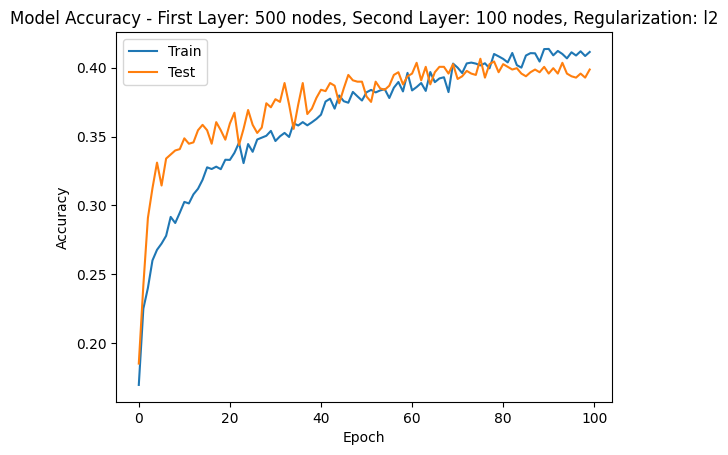

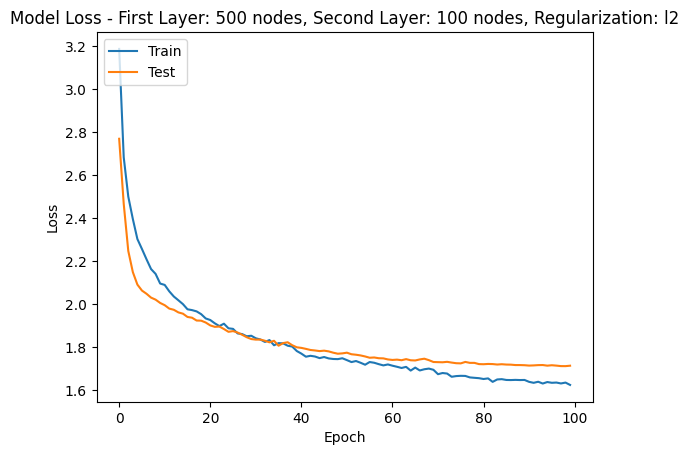

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1136 - loss: 16.6442 - val_accuracy: 0.1596 - val_loss: 12.8687 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2101 - loss: 11.8592 - val_accuracy: 0.1851 - val_loss: 9.1769 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2415 - loss: 8.3448 - val_accuracy: 0.2214 - val_loss: 6.4007 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2580 - loss: 5.9147 - val_accuracy: 0.2674 - val_loss: 4.7377 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2664 - loss: 4.5015 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2716, Train Precision = 0.3386, Train Recall = 0.2911, Train MSE = 6.3874, Train R² = 0.5665, Val Accuracy = 0.2811, Val Precision = 0.4013, Val Recall = 0.2811, Val MSE = 7.2723, Val R² = 0.5065
128/128 ━━━━━━━━━━━━━━━━━━━━ 

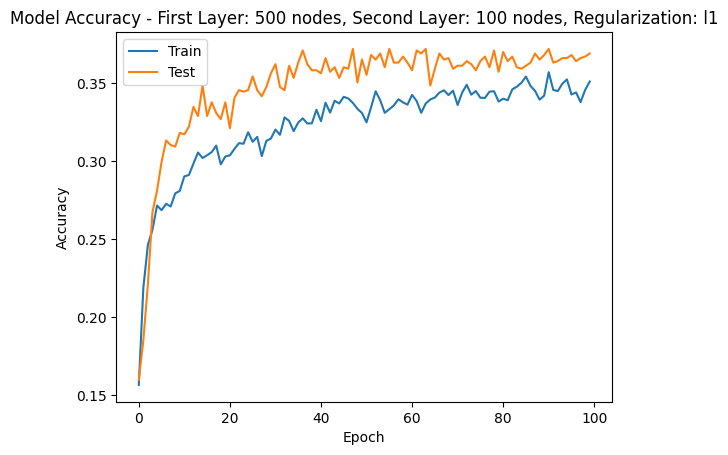

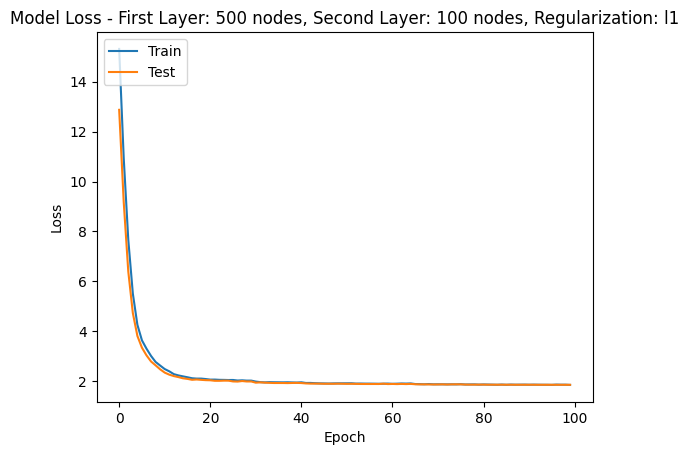

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.005...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1259 - loss: 4.3005 - val_accuracy: 0.2262 - val_loss: 3.4432 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2083 - loss: 3.4738 - val_accuracy: 0.2527 - val_loss: 3.1288 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2394 - loss: 3.2007 - val_accuracy: 0.2762 - val_loss: 2.8657 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2421 - loss: 3.0115 - val_accuracy: 0.2987 - val_loss: 2.6802 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2557 - loss: 2.8813 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2557, Train Precision = 0.3813, Train Recall = 0.3358, Train MSE = 5.8895, Train R² = 0.6003, Val Accuracy = 0.3173, Val Precision = 0.3601, Val Recall = 0.3173, Val MSE = 6.5730, Val R² = 0.5540
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

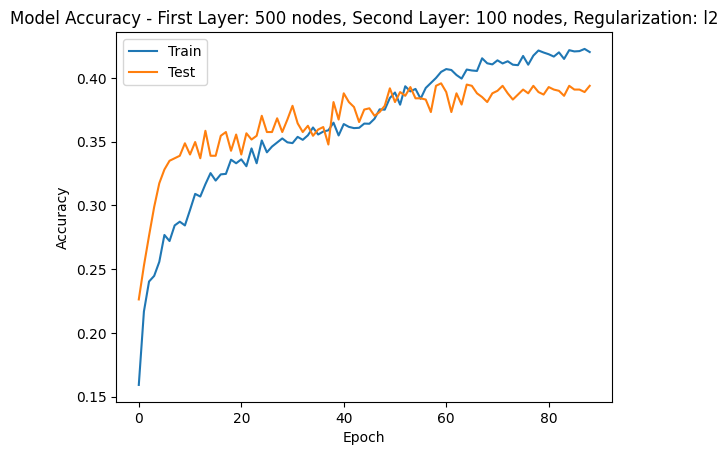

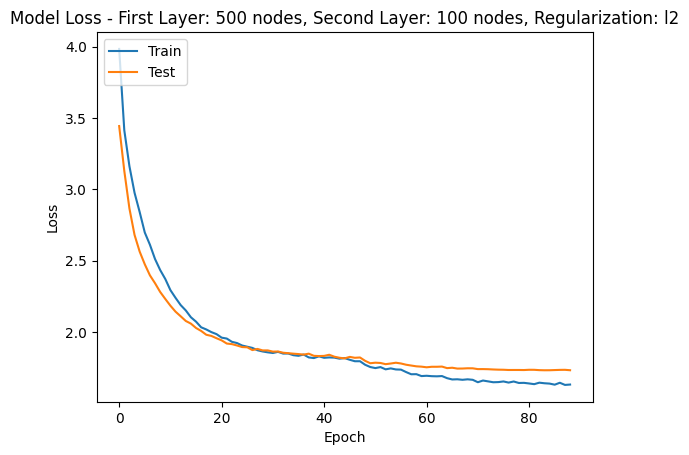

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1232 - loss: 23.7913 - val_accuracy: 0.2037 - val_loss: 16.4036 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2161 - loss: 14.5155 - val_accuracy: 0.2458 - val_loss: 9.6510 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2395 - loss: 8.4722 - val_accuracy: 0.2439 - val_loss: 5.9914 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2526 - loss: 5.4420 - val_accuracy: 0.2302 - val_loss: 4.4734 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2450 - loss: 4.3059 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2555, Train Precision = 0.3485, Train Recall = 0.2576, Train MSE = 7.1546, Train R² = 0.5144, Val Accuracy = 0.2625, Val Precision = 0.3866, Val Recall = 0.2625, Val MSE = 7.6082, Val R² = 0.4837
128/128 ━━━━━━━━━━━━━━━━━━━━ 

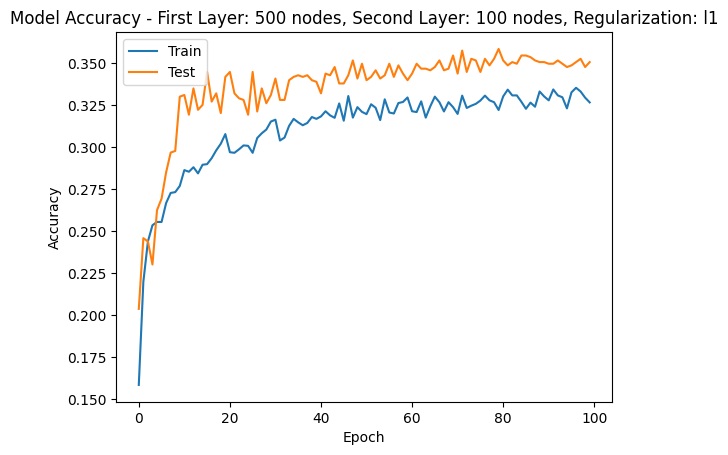

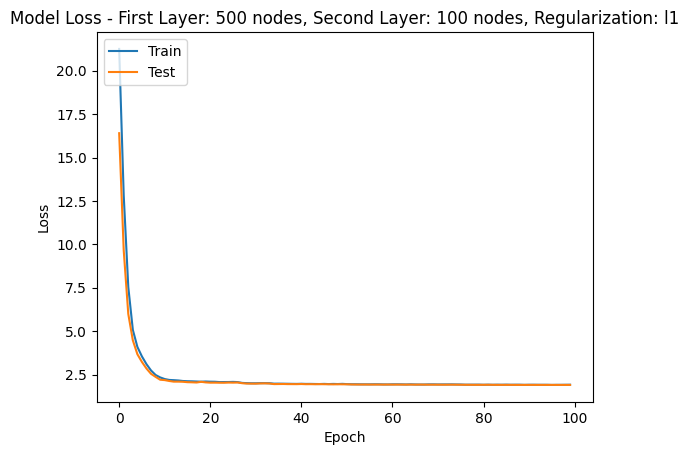

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.008...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1229 - loss: 4.8291 - val_accuracy: 0.1459 - val_loss: 4.0786 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2043 - loss: 3.9704 - val_accuracy: 0.2106 - val_loss: 3.6283 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2474 - loss: 3.5413 - val_accuracy: 0.2889 - val_loss: 3.2147 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2534 - loss: 3.2663 - val_accuracy: 0.2987 - val_loss: 2.9230 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2743 - loss: 3.0328 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2693, Train Precision = 0.3547, Train Recall = 0.3455, Train MSE = 5.7143, Train R² = 0.6122, Val Accuracy = 0.3252, Val Precision = 0.3207, Val Recall = 0.3252, Val MSE = 6.3634, Val R² = 0.5682
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

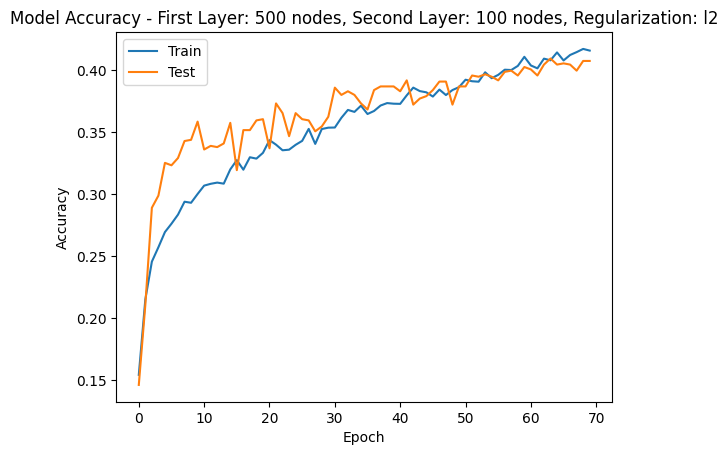

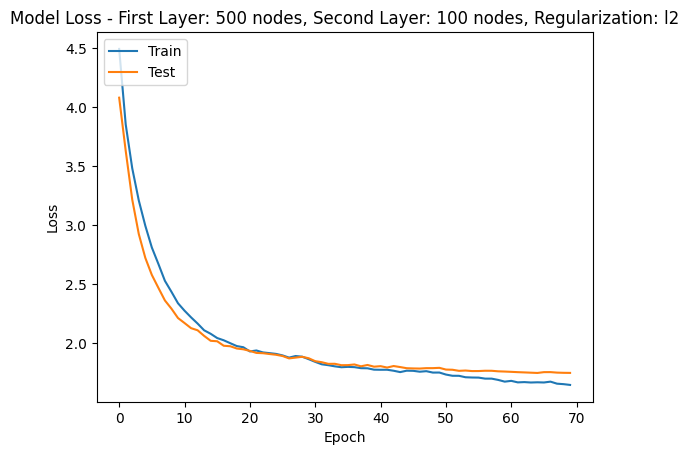

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1362 - loss: 28.2659 - val_accuracy: 0.2165 - val_loss: 18.0371 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2220 - loss: 15.4869 - val_accuracy: 0.1675 - val_loss: 9.5382 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2362 - loss: 8.1494 - val_accuracy: 0.1694 - val_loss: 5.7150 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2621 - loss: 5.1469 - val_accuracy: 0.2076 - val_loss: 4.3387 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2622 - loss: 4.1101 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2600, Train Precision = 0.3227, Train Recall = 0.2469, Train MSE = 6.9273, Train R² = 0.5298, Val Accuracy = 0.2449, Val Precision = 0.3946, Val Recall = 0.2449, Val MSE = 7.2517, Val R² = 0.5079
128/128 ━━━━━━━━━━━━━━━━━━━━ 

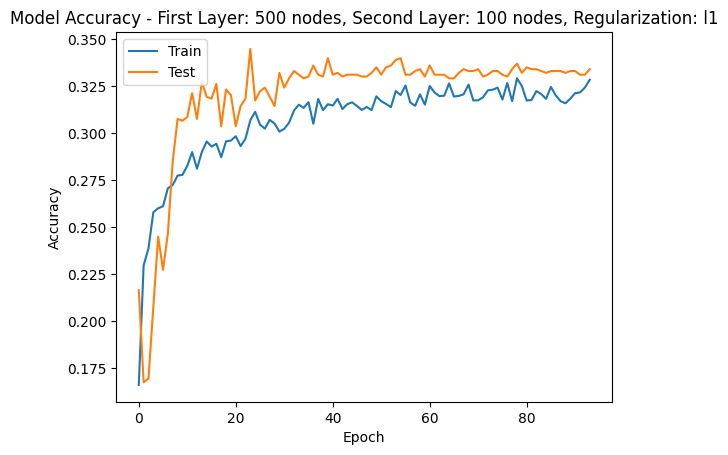

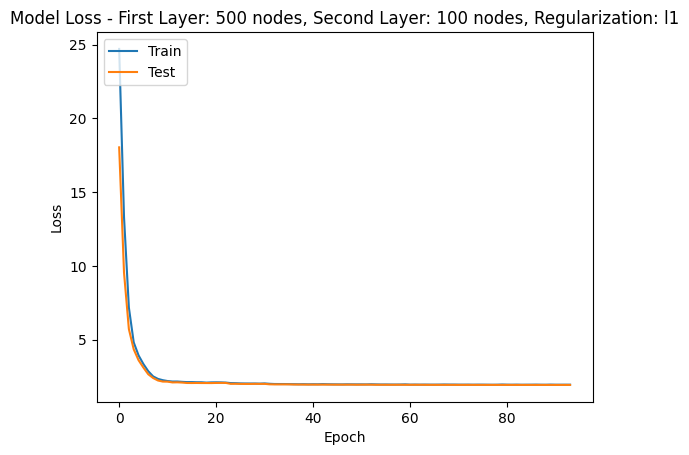

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.01...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1303 - loss: 5.1475 - val_accuracy: 0.2165 - val_loss: 4.2111 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2066 - loss: 4.1665 - val_accuracy: 0.2478 - val_loss: 3.7093 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2450 - loss: 3.7067 - val_accuracy: 0.2742 - val_loss: 3.2929 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2513 - loss: 3.3824 - val_accuracy: 0.2987 - val_loss: 2.9999 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2656 - loss: 3.1166 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: Train Accuracy = 0.2675, Train Precision = 0.3441, Train Recall = 0.3432, Train MSE = 5.6509, Train R² = 0.6165, Val Accuracy = 0.3310, Val Precision = 0.4048, Val Recall = 0.3310, Val MSE = 6.6102, Val R² = 0.5514
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 

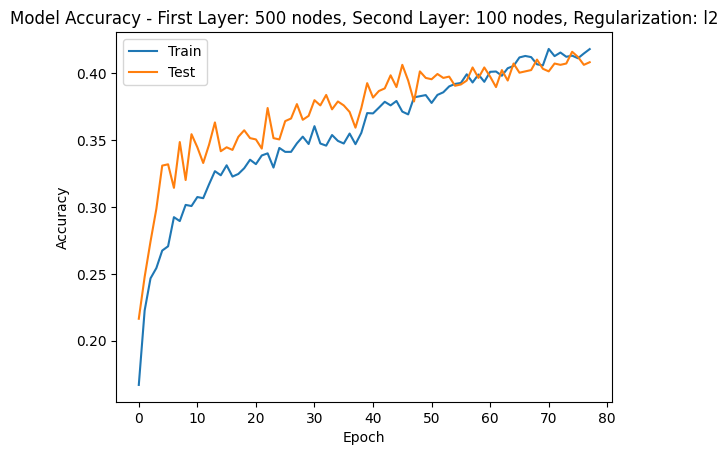

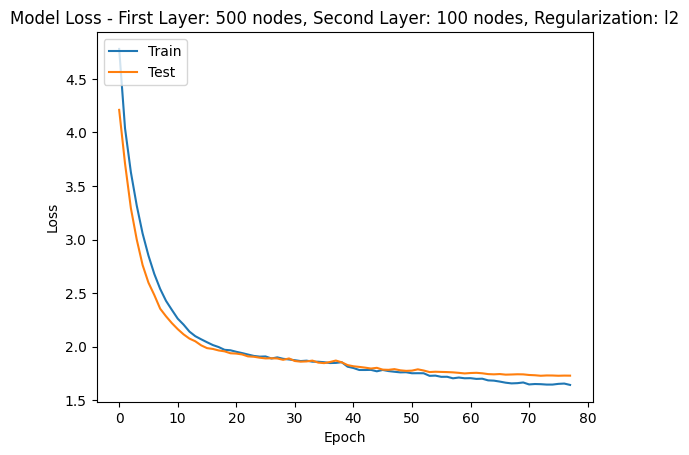

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0987 - loss: 111.4414 - val_accuracy: 0.1655 - val_loss: 34.7116 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 23.4199 - val_accuracy: 0.1352 - val_loss: 7.4916 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2407 - loss: 5.8360 - val_accuracy: 0.1342 - val_loss: 3.3641 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2590 - loss: 2.7341 - val_accuracy: 0.1410 - val_loss: 2.8240 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2501 - loss: 2.4604 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2465, Train Precision = 0.4042, Train Recall = 0.1900, Train MSE = 10.6592, Train R² = 0.2765, Val Accuracy = 0.1939, Val Precision = 0.5056, Val Recall = 0.1939, Val MSE = 11.1959, Val R² = 0.2403
128/128 ━━━━━━━━━━━━━━━━━━

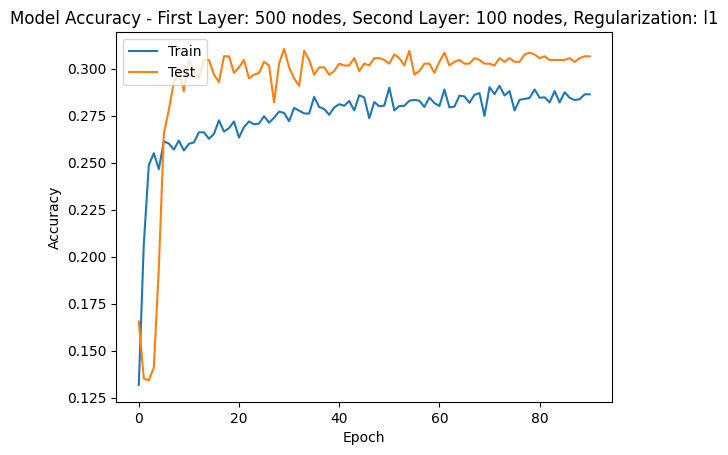

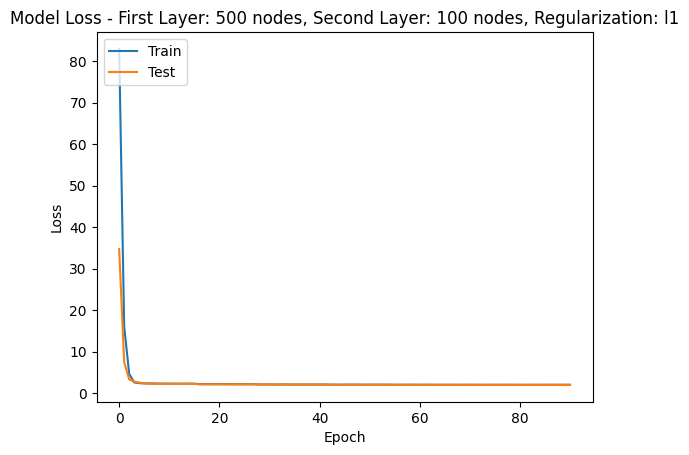

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.05...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1345 - loss: 11.6228 - val_accuracy: 0.1822 - val_loss: 7.9166 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2267 - loss: 7.1221 - val_accuracy: 0.2076 - val_loss: 5.3043 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2338 - loss: 4.8573 - val_accuracy: 0.2243 - val_loss: 3.8634 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2740 - loss: 3.6168 - val_accuracy: 0.2605 - val_loss: 3.0922 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2684 - loss: 3.0416 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2666, Train Precision = 0.3897, Train Recall = 0.3105, Train MSE = 5.7400, Train R² = 0.6104, Val Accuracy = 0.2977, Val Precision = 0.3682, Val Recall = 0.2977, Val MSE = 6.6347, Val R² = 0.5498
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

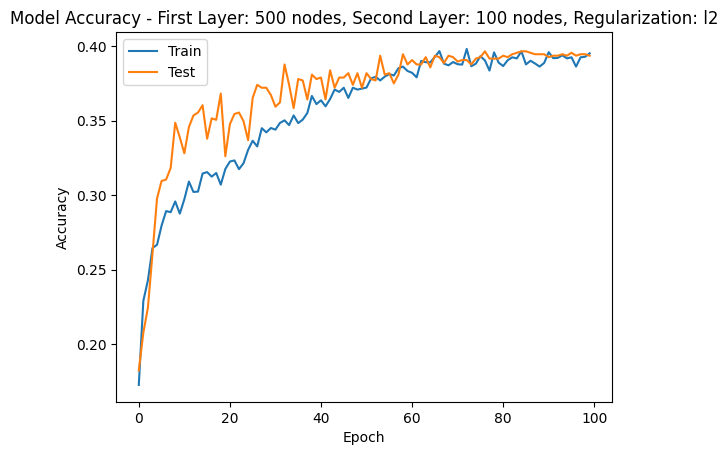

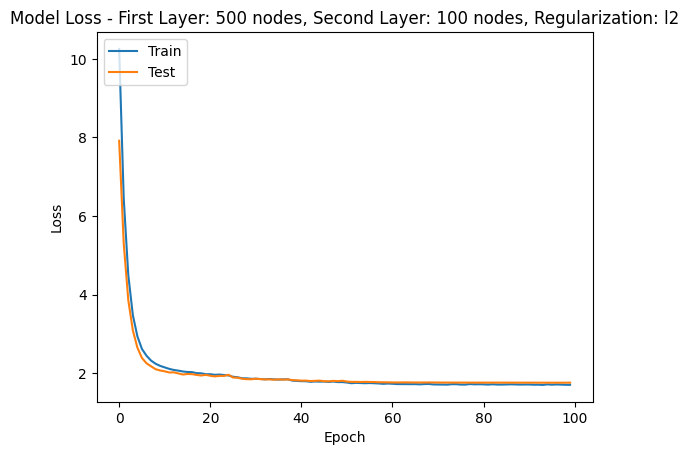

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l1 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0840 - loss: 215.6647 - val_accuracy: 0.1665 - val_loss: 51.9047 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2069 - loss: 30.3280 - val_accuracy: 0.1528 - val_loss: 4.7299 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2326 - loss: 3.5278 - val_accuracy: 0.1342 - val_loss: 3.1117 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2483 - loss: 2.6987 - val_accuracy: 0.1371 - val_loss: 2.9604 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2290 - loss: 2.6585 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2350, Train Precision = 0.4940, Train Recall = 0.2039, Train MSE = 9.7500, Train R² = 0.3382, Val Accuracy = 0.2184, Val Precision = 0.5114, Val Recall = 0.2184, Val MSE = 10.0911, Val R² = 0.3152
128/128 ━━━━━━━━━━━━━━━━━━━

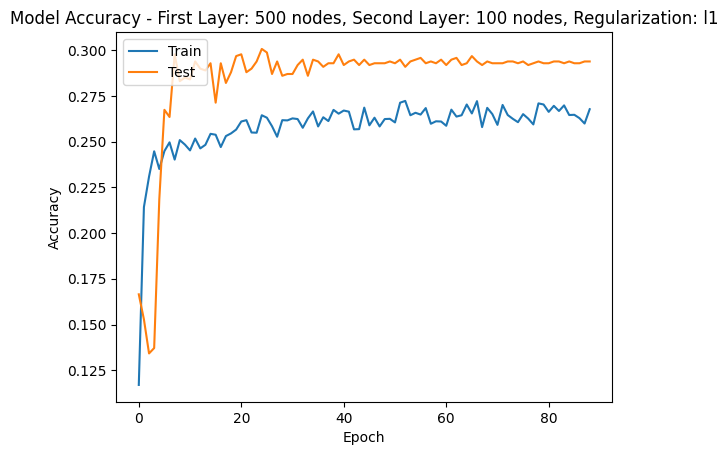

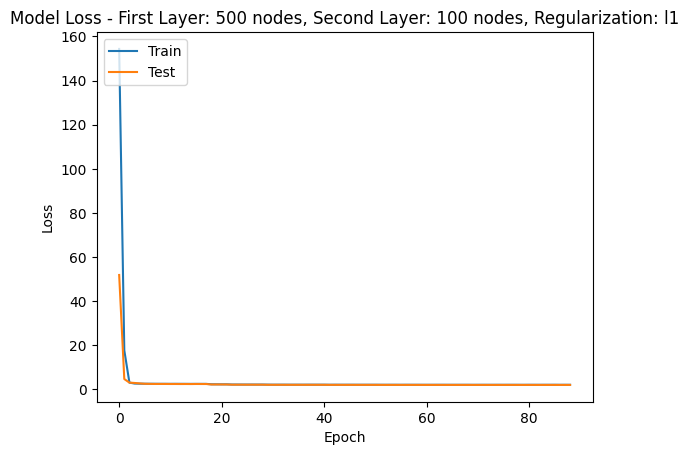

Testing model with first layer: 500 nodes, second layer: 100 nodes, regularization: l2 = 0.1...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1281 - loss: 18.7971 - val_accuracy: 0.1616 - val_loss: 9.8612 - learning_rate: 5.0000e-04
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2471 - loss: 8.3154 - val_accuracy: 0.1606 - val_loss: 5.3396 - learning_rate: 5.0000e-04
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2563 - loss: 4.6446 - val_accuracy: 0.1704 - val_loss: 3.6323 - learning_rate: 5.0000e-04
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2565 - loss: 3.3088 - val_accuracy: 0.2057 - val_loss: 2.8883 - learning_rate: 5.0000e-04
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   accuracy: 0.2805 - loss: 2.7396 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Train Accuracy = 0.2794, Train Precision = 0.3484, Train Recall = 0.2639, Train MSE = 6.4105, Train R² = 0.5649, Val Accuracy = 0.2400, Val Precision = 0.3321, Val Recall = 0.2400, Val MSE = 7.1322, Val R² = 0.5160
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s

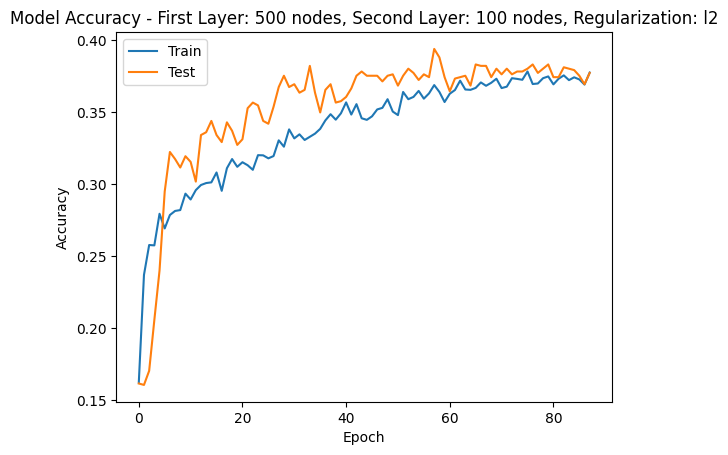

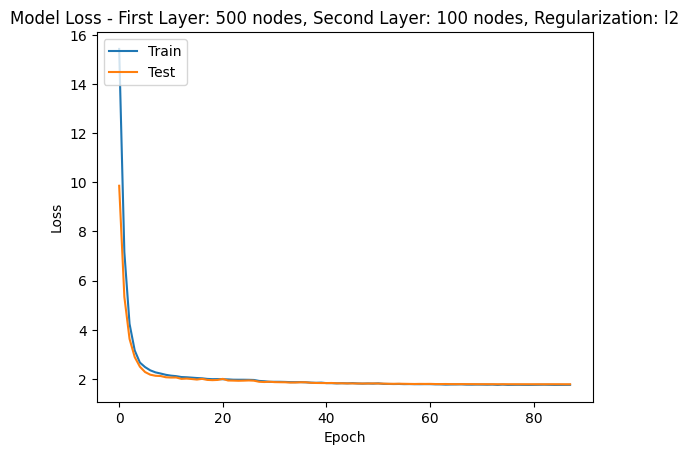


Best model found with first layer: 200 nodes, second layer: 100 nodes, regularization: l2 = 0.01
Best Test Accuracy: 0.4133
      Epoch  First Layer Nodes  Second Layer Nodes Regularization Type  \
0         5                 50                  50                  l1   
1        10                 50                  50                  l1   
2        15                 50                  50                  l1   
3        20                 50                  50                  l1   
4        25                 50                  50                  l1   
...     ...                ...                 ...                 ...   
1276     65                500                 100                  l2   
1277     70                500                 100                  l2   
1278     75                500                 100                  l2   
1279     80                500                 100                  l2   
1280     85                500                 100           

In [28]:
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

first_layer_nodes = [50, 200, 500]
second_layer_nodes = [50, 100]
regularization_values = [0.001, 0.005, 0.008, 0.01, 0.05, 0.1]
best_accuracy = 0
best_params = None
results = []

model_results = []

class PrintEpochs(Callback):
    def __init__(self, interval=5):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            y_train_pred = np.argmax(self.model.predict(X_train_scaled), axis=1)
            y_val_pred = np.argmax(self.model.predict(X_test_scaled), axis=1)

            train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
            train_recall = recall_score(y_train, y_train_pred, average='weighted')
            val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
            val_recall = recall_score(y_test, y_val_pred, average='weighted')

            train_mse = mean_squared_error(y_train, y_train_pred)
            val_mse = mean_squared_error(y_test, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_test, y_val_pred)

            print(f"Epoch {epoch+1}: "
                  f"Train Accuracy = {logs['accuracy']:.4f}, "
                  f"Train Precision = {train_precision:.4f}, "
                  f"Train Recall = {train_recall:.4f}, "
                  f"Train MSE = {train_mse:.4f}, "
                  f"Train R² = {train_r2:.4f}, "
                  f"Val Accuracy = {logs['val_accuracy']:.4f}, "
                  f"Val Precision = {val_precision:.4f}, "
                  f"Val Recall = {val_recall:.4f}, "
                  f"Val MSE = {val_mse:.4f}, "
                  f"Val R² = {val_r2:.4f}")

            model_results.append({
                'Epoch': epoch + 1,
                'First Layer Nodes': first_layer,
                'Second Layer Nodes': second_layer,
                'Regularization Type': regularization_type,
                'Regularization Value': regularization_value,
                'Train Accuracy': logs['accuracy'],
                'Train Precision': train_precision,
                'Train Recall': train_recall,
                'Train MSE': train_mse,
                'Train R²': train_r2,
                'Val Accuracy': logs['val_accuracy'],
                'Val Precision': val_precision,
                'Val Recall': val_recall,
                'Val MSE': val_mse,
                'Val R²': val_r2
            })

for first_layer in first_layer_nodes:
    for second_layer in second_layer_nodes:
        for regularization_value in regularization_values:
            for regularization_type in ['l1', 'l2']:
                print(f"Testing model with first layer: {first_layer} nodes, second layer: {second_layer} nodes, "
                      f"regularization: {regularization_type} = {regularization_value}...")

                if regularization_type == 'l1':
                    regularizer = regularizers.l1(regularization_value)
                elif regularization_type == 'l2':
                    regularizer = regularizers.l2(regularization_value)

                model = models.Sequential([
                    layers.Dense(first_layer, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train_scaled.shape[1],)),
                    layers.BatchNormalization(),
                    layers.Dropout(0.4),
                    layers.Dense(second_layer, activation='relu', kernel_regularizer=regularizer),
                    layers.BatchNormalization(),
                    layers.Dropout(0.4),
                    layers.Dense(17, activation='softmax')
                ])

                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
                print_epochs = PrintEpochs(interval=5)

                history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), 
                                    callbacks=[early_stopping, reduce_lr, print_epochs])

                test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
                print(f"Test Accuracy: {test_accuracy:.4f}")
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = (first_layer, second_layer, regularization_type, regularization_value)

                y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1)
                y_val_pred = np.argmax(model.predict(X_test_scaled), axis=1)

                train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
                train_recall = recall_score(y_train, y_train_pred, average='weighted')
                val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
                val_recall = recall_score(y_test, y_val_pred, average='weighted')

                train_mse = mean_squared_error(y_train, y_train_pred)
                val_mse = mean_squared_error(y_test, y_val_pred)
                train_r2 = r2_score(y_train, y_train_pred)
                val_r2 = r2_score(y_test, y_val_pred)

                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title(f'Model Accuracy - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.legend(['Train', 'Test'], loc='upper left')
                plt.show()

                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title(f'Model Loss - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend(['Train', 'Test'], loc='upper left')
                plt.show()

print(f"\nBest model found with first layer: {best_params[0]} nodes, second layer: {best_params[1]} nodes, "
      f"regularization: {best_params[2]} = {best_params[3]}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

model_results_df = pd.DataFrame(model_results)
print(model_results_df)
model_results_df.to_csv("model_performance_report.csv", index=False)



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.metrics import precision_score, recall_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Apply degree 2 polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

first_layer_nodes = [50, 200, 500]
second_layer_nodes = [50, 100]
regularization_values = [0.001, 0.005, 0.008, 0.01, 0.05, 0.1]
best_accuracy = 0
best_params = None
results = []

model_results = []

class PrintEpochs(Callback):
    def __init__(self, interval=5):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            y_train_pred = np.argmax(self.model.predict(X_train_scaled), axis=1)
            y_val_pred = np.argmax(self.model.predict(X_test_scaled), axis=1)

            train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
            train_recall = recall_score(y_train, y_train_pred, average='weighted')
            val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
            val_recall = recall_score(y_test, y_val_pred, average='weighted')

            train_mse = mean_squared_error(y_train, y_train_pred)
            val_mse = mean_squared_error(y_test, y_val_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_test, y_val_pred)

            print(f"Epoch {epoch+1}: "
                  f"Train Accuracy = {logs['accuracy']:.4f}, "
                  f"Train Precision = {train_precision:.4f}, "
                  f"Train Recall = {train_recall:.4f}, "
                  f"Train MSE = {train_mse:.4f}, "
                  f"Train R² = {train_r2:.4f}, "
                  f"Val Accuracy = {logs['val_accuracy']:.4f}, "
                  f"Val Precision = {val_precision:.4f}, "
                  f"Val Recall = {val_recall:.4f}, "
                  f"Val MSE = {val_mse:.4f}, "
                  f"Val R² = {val_r2:.4f}")

            model_results.append({
                'Epoch': epoch + 1,
                'First Layer Nodes': first_layer,
                'Second Layer Nodes': second_layer,
                'Regularization Type': regularization_type,
                'Regularization Value': regularization_value,
                'Train Accuracy': logs['accuracy'],
                'Train Precision': train_precision,
                'Train Recall': train_recall,
                'Train MSE': train_mse,
                'Train R²': train_r2,
                'Val Accuracy': logs['val_accuracy'],
                'Val Precision': val_precision,
                'Val Recall': val_recall,
                'Val MSE': val_mse,
                'Val R²': val_r2
            })

for first_layer in first_layer_nodes:
    for second_layer in second_layer_nodes:
        for regularization_value in regularization_values:
            for regularization_type in ['l1', 'l2']:
                print(f"Testing model with first layer: {first_layer} nodes, second layer: {second_layer} nodes, "
                      f"regularization: {regularization_type} = {regularization_value}...")

                if regularization_type == 'l1':
                    regularizer = regularizers.l1(regularization_value)
                elif regularization_type == 'l2':
                    regularizer = regularizers.l2(regularization_value)

                model = models.Sequential([
                    layers.Dense(first_layer, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train_scaled.shape[1],)),
                    layers.BatchNormalization(),
                    layers.Dropout(0.4),
                    layers.Dense(second_layer, activation='relu', kernel_regularizer=regularizer),
                    layers.BatchNormalization(),
                    layers.Dropout(0.4),
                    layers.Dense(17, activation='softmax')
                ])

                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
                print_epochs = PrintEpochs(interval=5)

                history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), 
                                    callbacks=[early_stopping, reduce_lr, print_epochs])

                test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
                print(f"Test Accuracy: {test_accuracy:.4f}")
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = (first_layer, second_layer, regularization_type, regularization_value)

                y_train_pred = np.argmax(model.predict(X_train_scaled), axis=1)
                y_val_pred = np.argmax(model.predict(X_test_scaled), axis=1)

                train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
                train_recall = recall_score(y_train, y_train_pred, average='weighted')
                val_precision = precision_score(y_test, y_val_pred, average='weighted', zero_division=1)
                val_recall = recall_score(y_test, y_val_pred, average='weighted')

                train_mse = mean_squared_error(y_train, y_train_pred)
                val_mse = mean_squared_error(y_test, y_val_pred)
                train_r2 = r2_score(y_train, y_train_pred)
                val_r2 = r2_score(y_test, y_val_pred)

                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title(f'Model Accuracy - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
                plt.xlabel('Epoch')
                plt.ylabel('Accuracy')
                plt.legend(['Train', 'Test'], loc='upper left')
                plt.show()

                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title(f'Model Loss - First Layer: {first_layer} nodes, Second Layer: {second_layer} nodes, Regularization: {regularization_type}')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend(['Train', 'Test'], loc='upper left')
                plt.show()

print(f"\nBest model found with first layer: {best_params[0]} nodes, second layer: {best_params[1]} nodes, "
      f"regularization: {best_params[2]} = {best_params[3]}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

model_results_df = pd.DataFrame(model_results)
print(model_results_df)
model_results_df.to_csv("model_performance_report2.csv", index=False)